<a href="https://colab.research.google.com/github/Masakinka/Python/blob/main/HW_1_Credit_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

В цьому ноутбуці ми проведемо дослідницький аналіз даних про історичні платежі по кредитам клієнтами.

[Опис колонок в даних тут.](https://drive.google.com/file/d/1Yp2aOdC33QFAVfTyxav_gKGwi4M9VN1Z/view?usp=sharing)

Цільова змінна TARGET тут має наступне значення: 1 – клієнт із труднощами з оплатою: він/вона прострочив платіж понад X днів принаймні одного з перших Y платежів кредиту в нашій вибірці, 0 – усі інші випадки

Задача - виявити, яким клієнтам видавати кредит, а яким - не варто, бо вони з високою імовірністю його не повернуть.

Дані взяті з [Kaggle](https://www.kaggle.com/datasets/gauravduttakiit/loan-defaulter). Прошу використовувати саме ті, які надані в нашому курсі, аби нам бути впевненими, що ми точно працюємо з одними і тими ж даними.

# Імпорт необхідних бібліотек

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max.rows',130)
pd.set_option('display.max.columns',130)
pd.set_option('float_format', '{:.2f}'.format)

In [ ]:
pd.set_option('display.max_columns', None)
pd.set_option('display.expand_frame_repr', False)

# Імпорт даних

Вмонтуємо наш диск, якщо Ви працюєте в Google Colab. Якщо працюєте локально, пропустіть наступну клітинку.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Знайдемо, де лежать наші файли з даними. В мене вони знаходяться тут:

In [ ]:
!ls 'drive/MyDrive/Colab Notebooks/data/'

application_data.csv.zip	columns_description.csv			    supermarket_sales.csv
application_data_processed.zip	health_insurance_cross_sell_prediction.csv


Якщо треба зчитати опис, то робимо це аналогічно.

In [ ]:
descr = pd.read_csv("drive/MyDrive/Colab Notebooks/data/columns_description.csv")

In [ ]:
descr.loc[1].Description

'Target variable (1 - client with payment difficulties: he/she had late payment more than X days on at least one of the first Y installments of the loan in our sample, 0 - all other cases)'

Зчитуємо дані.

In [ ]:
df = pd.read_csv("drive/MyDrive/Colab Notebooks/data/application_data.csv.zip")

In [ ]:
# Огляд декількох записів з датафрейму
df.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE            NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH  OWN_CAR_AGE  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  LIVE_REGION_NOT_WORK_REGION  REG_CITY_NOT_LIVE_CITY  REG_CITY_NOT_WORK_CITY  LIVE_CITY_NOT_WORK_CITY       ORGANIZATION_TYPE  EXT_SOURCE_1  EXT_SOURCE_2  EXT_SOURCE_3  APARTMENTS_AVG  BASEMENTAREA_AVG  YEARS_BEGINEXPLUATATION_AVG  YEARS_BUILD_AVG  COMMONAREA_AVG  ELEVATORS_AVG  ENTRANCES_AVG  FLOORSMAX_AVG  FLOORSMIN_AVG  LANDAREA_AVG  LIVINGAPARTMENTS_AVG  LIVINGAREA_AVG  NONLIVINGAPARTMENTS_AVG  NONLIVINGAREA_AVG  APARTMENTS_MODE  BASEMENTAREA_MODE  YEARS_BEGINEXPLUATATION_MODE  YEARS_BUILD_MODE  COMMONAREA_MODE  ELEVATORS_MODE  ENTRANCES_MODE  FLOORSMAX_MODE  FLOORSMIN_MODE  LANDAREA_MODE  LIVINGAPARTMENTS_MODE  LIVINGAREA_MODE  NONLIVINGAPARTMENTS_MODE  NONLIVINGAREA_MODE  APARTMENTS_MEDI  BASEMENTAREA_MEDI  YEARS_BEGINEXPLUATATION_MEDI  YEARS_BUILD_MEDI  COMMONAREA_MEDI  ELEVATORS_MEDI  ENTRANCES_MEDI  FLOORSMAX_MEDI  FLOORSMIN_MEDI  LANDAREA_MEDI  LIVINGAPARTMENTS_MEDI  LIVINGAREA_MEDI  NONLIVINGAPARTMENTS_MEDI  NONLIVINGAREA_MEDI FONDKAPREMONT_MODE  HOUSETYPE_MODE  TOTALAREA_MODE WALLSMATERIAL_MODE EMERGENCYSTATE_MODE  OBS_30_CNT_SOCIAL_CIRCLE  DEF_30_CNT_SOCIAL_CIRCLE  OBS_60_CNT_SOCIAL_CIRCLE  DEF_60_CNT_SOCIAL_CIRCLE  DAYS_LAST_PHONE_CHANGE  FLAG_DOCUMENT_2  FLAG_DOCUMENT_3  FLAG_DOCUMENT_4  FLAG_DOCUMENT_5  FLAG_DOCUMENT_6  FLAG_DOCUMENT_7  FLAG_DOCUMENT_8  FLAG_DOCUMENT_9  FLAG_DOCUMENT_10  FLAG_DOCUMENT_11  FLAG_DOCUMENT_12  FLAG_DOCUMENT_13  FLAG_DOCUMENT_14  FLAG_DOCUMENT_15  FLAG_DOCUMENT_16  FLAG_DOCUMENT_17  FLAG_DOCUMENT_18  FLAG_DOCUMENT_19  FLAG_DOCUMENT_20  FLAG_DOCUMENT_21  AMT_REQ_CREDIT_BUREAU_HOUR  AMT_REQ_CREDIT_BUREAU_DAY  AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR
0      100002       1         Cash loans           M            N               Y             0         202500.00   406597.50     24700.50        351000.00   Unaccompanied          Working  Secondary / secondary special  Single / not married  House / apartment                        0.02       -9461           -637           -3648.00            -2120          NaN           1               1                0                 1           1           0        Laborers             1.00                     2                            2                  WEDNESDAY                       10                           0                           0                            0                       0                       0                        0  Business Entity Type 3          0.08          0.26          0.14            0.02              0.04                         0.97             0.62            0.01           0.00           0.07           0.08           0.12          0.04                  0.02            0.02                     0.00               0.00             0.03               0.04                          0.97              0.63             0.01            0.00            0.07            0.08            0.12           0.04                   0.02             0.02                      0.00                0.00             0.03               0.04                          0.97              0.62             0.01            0.00            0.07            0.08            0.12           0.04                   0.02             0.02                      0.00                0.00   reg oper account  block of flats            0.01       Stone, brick       

# Перевірка структури даних

In [ ]:
df.info(verbose = True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
 #    Column                        Non-Null Count   Dtype  
---   ------                        --------------   -----  
 0    SK_ID_CURR                    307511 non-null  int64  
 1    TARGET                        307511 non-null  int64  
 2    NAME_CONTRACT_TYPE            307511 non-null  object 
 3    CODE_GENDER                   307511 non-null  object 
 4    FLAG_OWN_CAR                  307511 non-null  object 
 5    FLAG_OWN_REALTY               307511 non-null  object 
 6    CNT_CHILDREN                  307511 non-null  int64  
 7    AMT_INCOME_TOTAL              307511 non-null  float64
 8    AMT_CREDIT                    307511 non-null  float64
 9    AMT_ANNUITY                   307499 non-null  float64
 10   AMT_GOODS_PRICE               307233 non-null  float64
 11   NAME_TYPE_SUITE               306219 non-null  object 
 12   NAME_INCOME_TYPE            

In [ ]:
df.shape

(307511, 122)

Маємо ~307k рядків та 122 колонки.

## Статистичний звіт для числових змінних

In [ ]:
df.describe()

SK_ID_CURR    TARGET  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE  REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH  OWN_CAR_AGE  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  HOUR_APPR_PROCESS_START  REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  LIVE_REGION_NOT_WORK_REGION  REG_CITY_NOT_LIVE_CITY  REG_CITY_NOT_WORK_CITY  LIVE_CITY_NOT_WORK_CITY  EXT_SOURCE_1  EXT_SOURCE_2  EXT_SOURCE_3  APARTMENTS_AVG  BASEMENTAREA_AVG  YEARS_BEGINEXPLUATATION_AVG  YEARS_BUILD_AVG  COMMONAREA_AVG  ELEVATORS_AVG  ENTRANCES_AVG  FLOORSMAX_AVG  FLOORSMIN_AVG  LANDAREA_AVG  LIVINGAPARTMENTS_AVG  LIVINGAREA_AVG  NONLIVINGAPARTMENTS_AVG  NONLIVINGAREA_AVG  APARTMENTS_MODE  BASEMENTAREA_MODE  YEARS_BEGINEXPLUATATION_MODE  YEARS_BUILD_MODE  COMMONAREA_MODE  ELEVATORS_MODE  ENTRANCES_MODE  FLOORSMAX_MODE  FLOORSMIN_MODE  LANDAREA_MODE  LIVINGAPARTMENTS_MODE  LIVINGAREA_MODE  NONLIVINGAPARTMENTS_MODE  NONLIVINGAREA_MODE  APARTMENTS_MEDI  BASEMENTAREA_MEDI  YEARS_BEGINEXPLUATATION_MEDI  YEARS_BUILD_MEDI  COMMONAREA_MEDI  ELEVATORS_MEDI  ENTRANCES_MEDI  FLOORSMAX_MEDI  FLOORSMIN_MEDI  LANDAREA_MEDI  LIVINGAPARTMENTS_MEDI  LIVINGAREA_MEDI  NONLIVINGAPARTMENTS_MEDI  NONLIVINGAREA_MEDI  TOTALAREA_MODE  OBS_30_CNT_SOCIAL_CIRCLE  DEF_30_CNT_SOCIAL_CIRCLE  OBS_60_CNT_SOCIAL_CIRCLE  DEF_60_CNT_SOCIAL_CIRCLE  DAYS_LAST_PHONE_CHANGE  FLAG_DOCUMENT_2  FLAG_DOCUMENT_3  FLAG_DOCUMENT_4  FLAG_DOCUMENT_5  FLAG_DOCUMENT_6  FLAG_DOCUMENT_7  FLAG_DOCUMENT_8  FLAG_DOCUMENT_9  FLAG_DOCUMENT_10  FLAG_DOCUMENT_11  FLAG_DOCUMENT_12  FLAG_DOCUMENT_13  FLAG_DOCUMENT_14  FLAG_DOCUMENT_15  FLAG_DOCUMENT_16  FLAG_DOCUMENT_17  FLAG_DOCUMENT_18  FLAG_DOCUMENT_19  FLAG_DOCUMENT_20  FLAG_DOCUMENT_21  AMT_REQ_CREDIT_BUREAU_HOUR  AMT_REQ_CREDIT_BUREAU_DAY  AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR
count   307511.00 307511.00     307511.00         307511.00   307511.00    307499.00        307233.00                   307511.00   307511.00      307511.00          307511.00        307511.00    104582.00   307511.00       307511.00        307511.00         307511.00   307511.00   307511.00        307509.00             307511.00                    307511.00                307511.00                   307511.00                   307511.00                    307511.00               307511.00               307511.00                307511.00     134133.00     306851.00     246546.00       151450.00         127568.00                    157504.00        103023.00        92646.00      143620.00      152683.00      154491.00       98869.00     124921.00              97312.00       153161.00                 93997.00          137829.00        151450.00          127568.00                     157504.00         103023.00         92646.00       143620.00       152683.00       154491.00        98869.00      124921.00               97312.00        153161.00                  93997.00           137829.00        151450.00          127568.00                     157504.00         103023.00         92646.00       143620.00       152683.00       154491.00        98869.00      124921.00               97312.00        153161.00                  93997.00           137829.00       159080.00                 306490.00                 306490.00                 306490.00                 306490.00               307510.00        307511.00        307511.00        307511.00        307511.00        307511.00        307511.00        307511.00        307511.00         307511.00         307511.00         307511.00         307511.00         307511.00         307511.00         307511.00         307511.00         307511.00         307511.00         307511.00         307511.00                   265992.00                  265992.00                   265992.00                  265992.00 

# Аналіз категоріальних змінних

In [ ]:
df.select_dtypes(include = "object").columns

Index(['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY',
       'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE',
       'WEEKDAY_APPR_PROCESS_START', 'ORGANIZATION_TYPE', 'FONDKAPREMONT_MODE',
       'HOUSETYPE_MODE', 'WALLSMATERIAL_MODE', 'EMERGENCYSTATE_MODE'],
      dtype='object')

In [ ]:
# Перевірка кількості категоріальних змінних
len(df.select_dtypes(include = "object").columns)

16

Дані містять 16 `categorical` змінних

# Аналіз числових змінних

In [ ]:
number_df = df.select_dtypes(include="number")

In [ ]:
number_df.columns

Index(['SK_ID_CURR', 'TARGET', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE',
       'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
       ...
       'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20',
       'FLAG_DOCUMENT_21', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object', length=106)

In [ ]:
# Перевірка кількості числових змінних
len(number_df.columns)

106

Дані міятять 106 `numerical` змінних

In [ ]:
number_df.head()

SK_ID_CURR  TARGET  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE  REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH  OWN_CAR_AGE  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  HOUR_APPR_PROCESS_START  REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  LIVE_REGION_NOT_WORK_REGION  REG_CITY_NOT_LIVE_CITY  REG_CITY_NOT_WORK_CITY  LIVE_CITY_NOT_WORK_CITY  EXT_SOURCE_1  EXT_SOURCE_2  EXT_SOURCE_3  APARTMENTS_AVG  BASEMENTAREA_AVG  YEARS_BEGINEXPLUATATION_AVG  YEARS_BUILD_AVG  COMMONAREA_AVG  ELEVATORS_AVG  ENTRANCES_AVG  FLOORSMAX_AVG  FLOORSMIN_AVG  LANDAREA_AVG  LIVINGAPARTMENTS_AVG  LIVINGAREA_AVG  NONLIVINGAPARTMENTS_AVG  NONLIVINGAREA_AVG  APARTMENTS_MODE  BASEMENTAREA_MODE  YEARS_BEGINEXPLUATATION_MODE  YEARS_BUILD_MODE  COMMONAREA_MODE  ELEVATORS_MODE  ENTRANCES_MODE  FLOORSMAX_MODE  FLOORSMIN_MODE  LANDAREA_MODE  LIVINGAPARTMENTS_MODE  LIVINGAREA_MODE  NONLIVINGAPARTMENTS_MODE  NONLIVINGAREA_MODE  APARTMENTS_MEDI  BASEMENTAREA_MEDI  YEARS_BEGINEXPLUATATION_MEDI  YEARS_BUILD_MEDI  COMMONAREA_MEDI  ELEVATORS_MEDI  ENTRANCES_MEDI  FLOORSMAX_MEDI  FLOORSMIN_MEDI  LANDAREA_MEDI  LIVINGAPARTMENTS_MEDI  LIVINGAREA_MEDI  NONLIVINGAPARTMENTS_MEDI  NONLIVINGAREA_MEDI  TOTALAREA_MODE  OBS_30_CNT_SOCIAL_CIRCLE  DEF_30_CNT_SOCIAL_CIRCLE  OBS_60_CNT_SOCIAL_CIRCLE  DEF_60_CNT_SOCIAL_CIRCLE  DAYS_LAST_PHONE_CHANGE  FLAG_DOCUMENT_2  FLAG_DOCUMENT_3  FLAG_DOCUMENT_4  FLAG_DOCUMENT_5  FLAG_DOCUMENT_6  FLAG_DOCUMENT_7  FLAG_DOCUMENT_8  FLAG_DOCUMENT_9  FLAG_DOCUMENT_10  FLAG_DOCUMENT_11  FLAG_DOCUMENT_12  FLAG_DOCUMENT_13  FLAG_DOCUMENT_14  FLAG_DOCUMENT_15  FLAG_DOCUMENT_16  FLAG_DOCUMENT_17  FLAG_DOCUMENT_18  FLAG_DOCUMENT_19  FLAG_DOCUMENT_20  FLAG_DOCUMENT_21  AMT_REQ_CREDIT_BUREAU_HOUR  AMT_REQ_CREDIT_BUREAU_DAY  AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR
0      100002       1             0         202500.00   406597.50     24700.50        351000.00                        0.02       -9461           -637           -3648.00            -2120          NaN           1               1                0                 1           1           0             1.00                     2                            2                       10                           0                           0                            0                       0                       0                        0          0.08          0.26          0.14            0.02              0.04                         0.97             0.62            0.01           0.00           0.07           0.08           0.12          0.04                  0.02            0.02                     0.00               0.00             0.03               0.04                          0.97              0.63             0.01            0.00            0.07            0.08            0.12           0.04                   0.02             0.02                      0.00                0.00             0.03               0.04                          0.97              0.62             0.01            0.00            0.07            0.08            0.12           0.04                   0.02             0.02                      0.00                0.00            0.01                      2.00                      2.00                      2.00                      2.00                -1134.00                0                1                0                0                0                0                0                0                 0                 0                 0                 0                 0                 0                 0                 0                 0                 0                 0                 0                        0.00                       0.00                        0.00                       0.00         

# Робота з некоректними типами даних

Перевірка, чи немає у нас стовпця з неправильним типом даних

In [ ]:
df.dtypes

SK_ID_CURR                        int64
TARGET                            int64
NAME_CONTRACT_TYPE               object
CODE_GENDER                      object
FLAG_OWN_CAR                     object
FLAG_OWN_REALTY                  object
CNT_CHILDREN                      int64
AMT_INCOME_TOTAL                float64
AMT_CREDIT                      float64
AMT_ANNUITY                     float64
AMT_GOODS_PRICE                 float64
NAME_TYPE_SUITE                  object
NAME_INCOME_TYPE                 object
NAME_EDUCATION_TYPE              object
NAME_FAMILY_STATUS               object
NAME_HOUSING_TYPE                object
REGION_POPULATION_RELATIVE      float64
DAYS_BIRTH                        int64
DAYS_EMPLOYED                     int64
DAYS_REGISTRATION               float64
DAYS_ID_PUBLISH                   int64
OWN_CAR_AGE                     float64
FLAG_MOBIL                        int64
FLAG_EMP_PHONE                    int64
FLAG_WORK_PHONE                   int64


Дивлячись на дані та відповідні їм типи даних, можна змінити тип стовпчика SKU.

In [ ]:
df['SK_ID_CURR'] = df['SK_ID_CURR'].astype("str")

Також ми можемо змінити всі стовпці `flag` на тип даних, який є більш економний для зберігання.

Ось скільки пам'яті в Мб займають наші дані зараз.

In [ ]:
df.memory_usage().sum()/1024/1024

286.2270965576172

In [ ]:
'flag' in 'SK_ID_CURR'.lower()

False

In [ ]:
flag_cols = ['flag' in col.lower() for col in df.columns]

In [ ]:
df[df.columns[flag_cols]].head()

FLAG_OWN_CAR FLAG_OWN_REALTY  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL  FLAG_DOCUMENT_2  FLAG_DOCUMENT_3  FLAG_DOCUMENT_4  FLAG_DOCUMENT_5  FLAG_DOCUMENT_6  FLAG_DOCUMENT_7  FLAG_DOCUMENT_8  FLAG_DOCUMENT_9  FLAG_DOCUMENT_10  FLAG_DOCUMENT_11  FLAG_DOCUMENT_12  FLAG_DOCUMENT_13  FLAG_DOCUMENT_14  FLAG_DOCUMENT_15  FLAG_DOCUMENT_16  FLAG_DOCUMENT_17  FLAG_DOCUMENT_18  FLAG_DOCUMENT_19  FLAG_DOCUMENT_20  FLAG_DOCUMENT_21
0            N               Y           1               1                0                 1           1           0                0                1                0                0                0                0                0                0                 0                 0                 0                 0                 0                 0                 0                 0                 0                 0                 0                 0
1            N               N           1               1                0                 1           1           0                0                1                0                0                0                0                0                0                 0                 0                 0                 0                 0                 0                 0                 0                 0                 0                 0                 0
2            Y               Y           1               1                1                 1           1           0                0                0                0                0                0                0                0                0                 0                 0                 0                 0                 0                 0                 0                 0                 0                 0                 0                 0
3            N               Y           1               1                0                 1           0           0                0                1                0                0                0                0                0                0                 0                 0                 0                 0                 0                 0                 0                 0                 0                 0                 0                 0
4            N               Y           1               1                0                 1           0           0                0                0                0                0                0                0                1                0                 0                 0                 0                 0                 0                 0                 0                 0                 0                 0                 0                 0

In [ ]:
df[df.columns[flag_cols]].nunique()

FLAG_OWN_CAR        2
FLAG_OWN_REALTY     2
FLAG_MOBIL          2
FLAG_EMP_PHONE      2
FLAG_WORK_PHONE     2
FLAG_CONT_MOBILE    2
FLAG_PHONE          2
FLAG_EMAIL          2
FLAG_DOCUMENT_2     2
FLAG_DOCUMENT_3     2
FLAG_DOCUMENT_4     2
FLAG_DOCUMENT_5     2
FLAG_DOCUMENT_6     2
FLAG_DOCUMENT_7     2
FLAG_DOCUMENT_8     2
FLAG_DOCUMENT_9     2
FLAG_DOCUMENT_10    2
FLAG_DOCUMENT_11    2
FLAG_DOCUMENT_12    2
FLAG_DOCUMENT_13    2
FLAG_DOCUMENT_14    2
FLAG_DOCUMENT_15    2
FLAG_DOCUMENT_16    2
FLAG_DOCUMENT_17    2
FLAG_DOCUMENT_18    2
FLAG_DOCUMENT_19    2
FLAG_DOCUMENT_20    2
FLAG_DOCUMENT_21    2
dtype: int64

Типи даних в pandas взяті з numpy, і ось тут список всіх типів даних в numpy:

https://numpy.org/doc/stable/user/basics.types.html

Кожен тип даних займає певну кількість байт у пам'яті. Давайте з'ясуємо, скільки займає 1 тип int8 та 1 тип int64 і скільки пам'яті ми заощадимо, якщо змінимо тип.

In [ ]:
import numpy as np
from sys import getsizeof

In [ ]:
getsizeof(np.int64(1))

32

In [ ]:
getsizeof(np.int8(1))

25

In [ ]:
7 * df.shape[0] * sum(flag_cols) / 1024 / 1024

57.48000717163086

Отже, ми можемо потенційно заощадити 57 Мб пам'яті! І трансформувати наш фрейм даних буде простіше. Давайте змінимо тип.


In [ ]:
str_flag_cols = ['FLAG_OWN_CAR', 'FLAG_OWN_REALTY']

In [ ]:
for col in str_flag_cols:
  df[col] = np.where(df[col]=='Y', 1, 0)

In [ ]:
df[str_flag_cols].nunique()

FLAG_OWN_CAR       2
FLAG_OWN_REALTY    2
dtype: int64

In [ ]:
df.columns[flag_cols]

Index(['FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'FLAG_MOBIL', 'FLAG_EMP_PHONE',
       'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL',
       'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3', 'FLAG_DOCUMENT_4',
       'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6', 'FLAG_DOCUMENT_7',
       'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9', 'FLAG_DOCUMENT_10',
       'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12', 'FLAG_DOCUMENT_13',
       'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15', 'FLAG_DOCUMENT_16',
       'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19',
       'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21'],
      dtype='object')

In [ ]:
df[df.columns[flag_cols]] = df[df.columns[flag_cols]].astype('int8')

In [ ]:
df.memory_usage().sum()/1024/1024

228.74708938598633

# Робота з пропущеними значеннями

Найпростіше емпіричне правило для опрацювання пропущених значень: якщо пропущених значень більше за 40% - видаляємо колонку, якщо менше за 40% - аналізуємо, як можна заповнити і чи треба.

Зазвичай, якщо відсоток пропущених даних більший за 10 і немає чіткої (яка значно виділяється) моди (найчастішого) значення в даних, то лишаємо дані як є до використання методів машинного навчання. Далі якщо метод вимагає заповення пропущених значень, можемо експериментувати із заповеннями. Також хорошою практикою є створити окрему колонку-флаг (0/1), яка вказує, де були пропущені значення - це буде додаткова ознака для моделі.


Перевіримо, чи немає null-значень в нашому наборі даних

In [ ]:
df.isnull().values.any()

True

Порахуємо загальну кількість null-значень в наборі даних

In [ ]:
df.isnull().values.sum()

9152465

Сформуємо список із стовпців з null-значеннями

In [ ]:
df.columns[df.isnull().any()]

Index(['AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE', 'OWN_CAR_AGE',
       'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS', 'EXT_SOURCE_1', 'EXT_SOURCE_2',
       'EXT_SOURCE_3', 'APARTMENTS_AVG', 'BASEMENTAREA_AVG',
       'YEARS_BEGINEXPLUATATION_AVG', 'YEARS_BUILD_AVG', 'COMMONAREA_AVG',
       'ELEVATORS_AVG', 'ENTRANCES_AVG', 'FLOORSMAX_AVG', 'FLOORSMIN_AVG',
       'LANDAREA_AVG', 'LIVINGAPARTMENTS_AVG', 'LIVINGAREA_AVG',
       'NONLIVINGAPARTMENTS_AVG', 'NONLIVINGAREA_AVG', 'APARTMENTS_MODE',
       'BASEMENTAREA_MODE', 'YEARS_BEGINEXPLUATATION_MODE', 'YEARS_BUILD_MODE',
       'COMMONAREA_MODE', 'ELEVATORS_MODE', 'ENTRANCES_MODE', 'FLOORSMAX_MODE',
       'FLOORSMIN_MODE', 'LANDAREA_MODE', 'LIVINGAPARTMENTS_MODE',
       'LIVINGAREA_MODE', 'NONLIVINGAPARTMENTS_MODE', 'NONLIVINGAREA_MODE',
       'APARTMENTS_MEDI', 'BASEMENTAREA_MEDI', 'YEARS_BEGINEXPLUATATION_MEDI',
       'YEARS_BUILD_MEDI', 'COMMONAREA_MEDI', 'ELEVATORS_MEDI',
       'ENTRANCES_MEDI', 'FLOORSMAX_MEDI', 'FLOORSMI

In [ ]:
len(df.columns[df.isnull().any()])

67

Усього `67` стовпців мають одне або більше NULL-значень в даних

## Кількість та відсоток пропущених значень у стовпцях

In [ ]:
null_count = df.isnull().sum()
null_percentage = round((df.isnull().sum()/df.shape[0])*100, 2)

In [ ]:
df.shape[0]

307511

In [ ]:
null_df = pd.DataFrame({'column_name' : df.columns,'null_count' : null_count,'null_percentage': null_percentage})
null_df.reset_index(drop = True, inplace = True)

In [ ]:
null_df.sort_values(by = 'null_percentage', ascending = False)

column_name  null_count  null_percentage
76                COMMONAREA_MEDI      214865            69.87
48                 COMMONAREA_AVG      214865            69.87
62                COMMONAREA_MODE      214865            69.87
70       NONLIVINGAPARTMENTS_MODE      213514            69.43
56        NONLIVINGAPARTMENTS_AVG      213514            69.43
84       NONLIVINGAPARTMENTS_MEDI      213514            69.43
86             FONDKAPREMONT_MODE      210295            68.39
68          LIVINGAPARTMENTS_MODE      210199            68.35
54           LIVINGAPARTMENTS_AVG      210199            68.35
82          LIVINGAPARTMENTS_MEDI      210199            68.35
52                  FLOORSMIN_AVG      208642            67.85
66                 FLOORSMIN_MODE      208642            67.85
80                 FLOORSMIN_MEDI      208642            67.85
75               YEARS_BUILD_MEDI      204488            66.50
61               YEARS_BUILD_MODE      204488            66.50
47                YEARS_BUILD_AVG      204488            66.50
21                    OWN_CAR_AGE      202929            65.99
81                  LANDAREA_MEDI      182590            59.38
67                  LANDAREA_MODE      182590            59.38
53                   LANDAREA_AVG      182590            59.38
73              BASEMENTAREA_MEDI      179943            58.52
45               BASEMENTAREA_AVG      179943            58.52
59              BASEMENTAREA_MODE      179943            58.52
41                   EXT_SOURCE_1      173378            56.38
71             NONLIVINGAREA_MODE      169682            55.18
57              NONLIVINGAREA_AVG      169682            55.18
85             NONLIVINGAREA_MEDI      169682            55.18
77                 ELEVATORS_MEDI      163891            53.30
49                  ELEVATORS_AVG      163891            53.30
63                 ELEVATORS_MODE      163891            53.30
89             WALLSMATERIAL_MODE      156341            50.84
72                APARTMENTS_MEDI      156061            50.75
44                 APARTMENTS_AVG      156061            50.75
58                APARTMENTS_MODE      156061            50.75
78                 ENTRANCES_MEDI      154828            50.35
50                  ENTRANCES_AVG      154828            50.35
64                 ENTRANCES_MODE      154828            50.35
55                 LIVINGAREA_AVG      154350            50.19
69                LIVINGAREA_MODE      154350            50.19
83                LIVINGAREA_MEDI      154350            50.19
87                 HOUSETYPE_MODE      154297            50.18
65                 FLOORSMAX_MODE      153020            49.76
79                 FLOORSMAX_MEDI      153020            49.76
51                  FLOORSMAX_AVG      153020            49.76
60   YEARS_BEGINEXPLUATATION_MODE      150007            48.78
74   YEARS_BEGINEXPLUATATION_MEDI      150007            48.78
46    YEARS_BEGINEXPLUATATION_AVG      150007            48.78
88                 TOTALAREA_MODE      148431            48.27
90            EMERGENCYSTATE_MODE      145755            47.40
28                OCCUPATION_TYPE       96391            31.35
43                   EXT_SOURCE_3       60965            19.83
116    AMT_REQ_CREDIT_BUREAU_HOUR       41519            13.50
117     AMT_REQ_CREDIT_BUREAU_DAY       41519            13.50
118    AMT_REQ_CREDIT_BUREAU_WEEK       41519            13.50
119     AMT_REQ_CREDIT_BUREAU_MON       41519            13.50
120     AMT_REQ_CREDIT_BUREAU_QRT       41519            13.50
121    AMT_REQ_CREDIT_BUREAU_YEAR       41519            13.50
11                NAME_TYPE_SUITE        1292             0.42
92       DEF_30_CNT_SOCIAL_CIRCLE        1021             0.33
91       OBS_30_CNT_SOCIAL_CIRCLE        1021             0.33
93       OBS_60_CNT_SOCIAL_CIRCLE        1021             0.33
94       DEF_60_CNT_SOCIAL_CIRCLE        1021             0.33
42                   EXT_SOURCE_2         660        

## Видалення стовпців з NULL значеннями > 40%

Сформуємо список стовпців з NULL значеннями > 40% у список. Ми видалимо ці стовпці з датафрейму, оскільки в них занадто багато пропущених значень.

In [ ]:
columns_to_be_deleted = null_df[null_df['null_percentage'] > 40].column_name.to_list()

In [ ]:
len(columns_to_be_deleted)

49

Всього потрібно видалити `49` стовпців. Видалення їх з основного датафрейму **`df`**

In [ ]:
df.drop(columns = columns_to_be_deleted, inplace = True)

Перевірка підрахунку стовпців після видалення. Мало б залишитись лише `73` стовпці

In [ ]:
df.shape

(307511, 73)

## Перевірка стовпців з NULL значеннями < 40%

Створення датафрейму `null_df_under40` зі стовпцями, де відсоток пропущених значеннь менше 40%

In [ ]:
null_df_under40 = null_df[null_df['null_percentage'] < 40]

In [ ]:
null_df_under40.sort_values(by = 'null_percentage', ascending = False)

column_name  null_count  null_percentage
28               OCCUPATION_TYPE       96391            31.35
43                  EXT_SOURCE_3       60965            19.83
121   AMT_REQ_CREDIT_BUREAU_YEAR       41519            13.50
120    AMT_REQ_CREDIT_BUREAU_QRT       41519            13.50
119    AMT_REQ_CREDIT_BUREAU_MON       41519            13.50
118   AMT_REQ_CREDIT_BUREAU_WEEK       41519            13.50
117    AMT_REQ_CREDIT_BUREAU_DAY       41519            13.50
116   AMT_REQ_CREDIT_BUREAU_HOUR       41519            13.50
11               NAME_TYPE_SUITE        1292             0.42
91      OBS_30_CNT_SOCIAL_CIRCLE        1021             0.33
92      DEF_30_CNT_SOCIAL_CIRCLE        1021             0.33
93      OBS_60_CNT_SOCIAL_CIRCLE        1021             0.33
94      DEF_60_CNT_SOCIAL_CIRCLE        1021             0.33
42                  EXT_SOURCE_2         660             0.21
10               AMT_GOODS_PRICE         278             0.09
101              FLAG_DOCUMENT_7           0             0.00
95        DAYS_LAST_PHONE_CHANGE           1             0.00
96               FLAG_DOCUMENT_2           0             0.00
97               FLAG_DOCUMENT_3           0             0.00
98               FLAG_DOCUMENT_4           0             0.00
99               FLAG_DOCUMENT_5           0             0.00
100              FLAG_DOCUMENT_6           0             0.00
105             FLAG_DOCUMENT_11           0             0.00
102              FLAG_DOCUMENT_8           0             0.00
103              FLAG_DOCUMENT_9           0             0.00
104             FLAG_DOCUMENT_10           0             0.00
39       LIVE_CITY_NOT_WORK_CITY           0             0.00
106             FLAG_DOCUMENT_12           0             0.00
107             FLAG_DOCUMENT_13           0             0.00
108             FLAG_DOCUMENT_14           0             0.00
109             FLAG_DOCUMENT_15           0             0.00
110             FLAG_DOCUMENT_16           0             0.00
111             FLAG_DOCUMENT_17           0             0.00
112             FLAG_DOCUMENT_18           0             0.00
113             FLAG_DOCUMENT_19           0             0.00
114             FLAG_DOCUMENT_20           0             0.00
115             FLAG_DOCUMENT_21           0             0.00
40             ORGANIZATION_TYPE           0             0.00
0                     SK_ID_CURR           0             0.00
38        REG_CITY_NOT_WORK_CITY           0             0.00
9                    AMT_ANNUITY          12             0.00
17                    DAYS_BIRTH           0             0.00
16    REGION_POPULATION_RELATIVE           0             0.00
15             NAME_HOUSING_TYPE           0             0.00
14            NAME_FAMILY_STATUS           0             0.00
13           NAME_EDUCATION_TYPE           0             0.00
12              NAME_INCOME_TYPE           0             0.00
8                     AMT_CREDIT           0             0.00
1                         TARGET           0             0.00
7               AMT_INCOME_TOTAL           0             0.00
6                   CNT_CHILDREN           0             0.00
5                FLAG_OWN_REALTY           0             0.00
4                   FLAG_OWN_CAR           0             0.00
3                    CODE_GENDER           0             0.00
2             NAME_CONTRACT_TYPE           0             0.00
18                 DAYS_EMPLOYED           0             0.00
19             DAYS_REGISTRATION           0             0.00
20               DAYS_ID_PUBLISH           0             0.00
22                    FLAG_MOBIL           0             0.00
23                FLAG_EMP_PHONE           0             0.00
24               FLAG_WORK_PHONE           0             0.00
25              FLAG_CONT_MOBILE           0             0.00
26                    FLAG_PHONE           0             0.00
27                    FLAG_EMAIL           0         

Опрацюємо кожну з колонок.

### Аналіз стовпця `OCCUPATION_TYPE`

- нульові значення = 31.35%

In [ ]:
df['OCCUPATION_TYPE'].value_counts()

OCCUPATION_TYPE
Laborers                 55186
Sales staff              32102
Core staff               27570
Managers                 21371
Drivers                  18603
High skill tech staff    11380
Accountants               9813
Medicine staff            8537
Security staff            6721
Cooking staff             5946
Cleaning staff            4653
Private service staff     2652
Low-skill Laborers        2093
Waiters/barmen staff      1348
Secretaries               1305
Realty agents              751
HR staff                   563
IT staff                   526
Name: count, dtype: int64

Заміна NULL-значень на категорією `Unknown`

In [ ]:
df['OCCUPATION_TYPE'].fillna(value = 'Unknown', inplace = True)

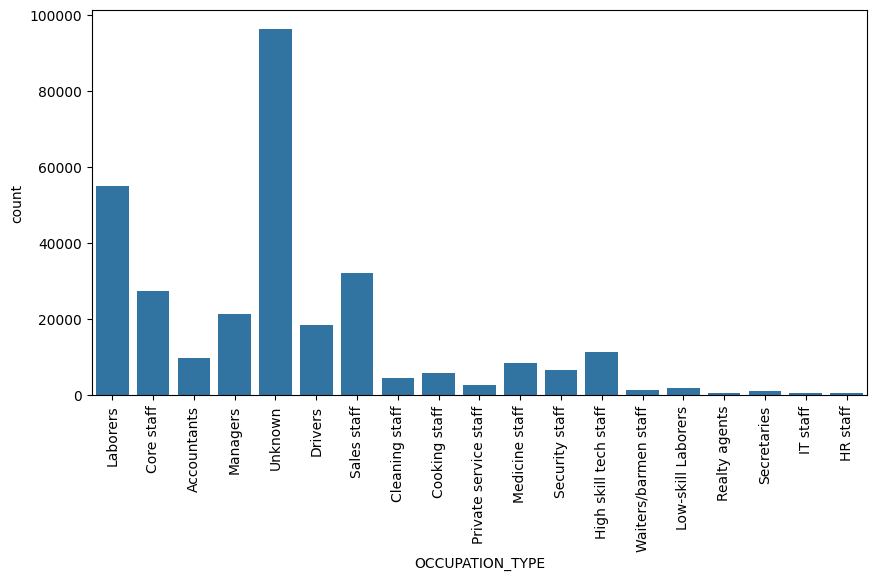

In [ ]:
plt.figure(figsize = (10,5))
sns.countplot(data = df, x = "OCCUPATION_TYPE")
plt.xticks(rotation = 90)
plt.show()

**Спостереження**
- Якщо поглянути на графік, то найбільшу кількість заявників на кредит мають `Laborers`
- Для імпутації краще залишити дані як є (пропущені значення становлять 31,35%) і не проводити імпутацію за якоюсь константою, як-от мода або мін/макс медіана, якщо це числовий стовпчик, оскільки це може викривити дані в подальших розрахунках.

Існує також можливість імпутації за допомогою більш "розумних" методів, але ми вивчимо їх пізніше, а зараз ми робимо те, що можемо, за допомогою деяких найпростіших перетворень.

### Аналіз стовпця `EXT_SOURCE_3`

- пропущені значення = 19.83%

In [ ]:
df.EXT_SOURCE_3.value_counts().head()

EXT_SOURCE_3
0.75    1460
0.71    1315
0.69    1276
0.67    1191
0.65    1154
Name: count, dtype: int64

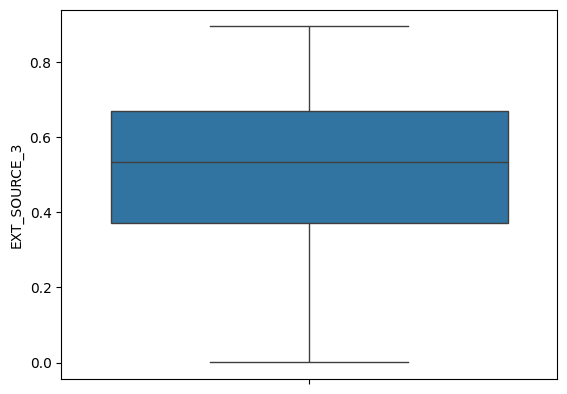

In [ ]:
sns.boxplot(df.EXT_SOURCE_3)
plt.show()

Отримання процентильних значень для `EXT_SOURCE_3`

In [ ]:
df.EXT_SOURCE_3.quantile(q = [0.25,0.5,0.75,1])

0.25   0.37
0.50   0.54
0.75   0.67
1.00   0.90
Name: EXT_SOURCE_3, dtype: float64

Найбільш повторюване значення в `EXT_SOURCE_3

In [ ]:
df.EXT_SOURCE_3.mode()[0]

0.746300213050371

Перевірка середнього значення `EXT_SOURCE_3`

In [ ]:
df.EXT_SOURCE_3.mean()

0.5108529061799658

**Спостереження**
-  Дивлячись на діагараму розмаху, медіана становить 0,535276
-  Найчастіше повторюване значення - 0,74630
-  Середнє значення - 0,51085
-  Хоча середнє та медіана є ближчими і можуть бути використані для імплікації, оскільки відсутнє відсоткове значення є більшим (19,83%), краще залишити дані як є і не проводити імплікації. Якщо метод вимагає імплікації, ми можемо імплікувати дані за допомогою медіани і створити ще один стовпчик, в якому буде позначено, які значення були імпліковані.

# ДЗ 1. Аналіз стовпців `AMT_REQ_CREDIT_BUREAU` з пропущеними значеннями

Виведіть середнє, моду, медіану та відсоток відсутніх даних для настуних колонок:

-  `AMT_REQ_CREDIT_BUREAU_YEAR`
-	`AMT_REQ_CREDIT_BUREAU_QRT`
-	`AMT_REQ_CREDIT_BUREAU_MON`
-	`AMT_REQ_CREDIT_BUREAU_WEEK`
-	`AMT_REQ_CREDIT_BUREAU_DAY`
-	`AMT_REQ_CREDIT_BUREAU_HOUR`

На основі виведених даних напишіть висновок про те, чи варто заповнювати пусті значення і якщо так, то яким чином?

In [ ]:
# Список колонок для аналізу
columns = [
    'AMT_REQ_CREDIT_BUREAU_YEAR',
    'AMT_REQ_CREDIT_BUREAU_QRT',
    'AMT_REQ_CREDIT_BUREAU_MON',
    'AMT_REQ_CREDIT_BUREAU_WEEK',
    'AMT_REQ_CREDIT_BUREAU_DAY',
    'AMT_REQ_CREDIT_BUREAU_HOUR'
]

# Функція для обчислення статистик
def calculate_statistics(df, columns):
    results = []
    for col in columns:
        quantiles = df[col].quantile(q=[0.25, 0.5, 0.75, 0.99, 1.0])
        stats = {
            'Column': col,
            'Mean': df[col].mean(),
            'Median': df[col].median(),
            'Mode': df[col].mode()[0] if not df[col].mode().empty else None, # Перевірка чи існує мода
          #'Missing Percentage': df[col].isna().mean() * 100
            "Missing Count":   df[col].isnull().sum(),
            'Missing Percentage': round((df[col].isnull().sum()/df.shape[0])*100, 2),
            '25th Percentile': quantiles[0.25],
            '50th Percentile (Median)': quantiles[0.5],
            '75th Percentile': quantiles[0.75],
            '99th Percentile': quantiles[0.99],
            'Maximum': quantiles[1.0]
        }
        results.append(stats)
    return pd.DataFrame(results)

# Виконання функції і запис результатів у DataFrame
statistics_df = calculate_statistics(df, columns)
statistics_df

Column  Mean  Median  Mode  Missing Count  Missing Percentage  25th Percentile  50th Percentile (Median)  75th Percentile  99th Percentile  Maximum
0  AMT_REQ_CREDIT_BUREAU_YEAR  1.90    1.00  0.00          41519               13.50             0.00                      1.00             3.00             8.00    25.00
1   AMT_REQ_CREDIT_BUREAU_QRT  0.27    0.00  0.00          41519               13.50             0.00                      0.00             0.00             2.00   261.00
2   AMT_REQ_CREDIT_BUREAU_MON  0.27    0.00  0.00          41519               13.50             0.00                      0.00             0.00             4.00    27.00
3  AMT_REQ_CREDIT_BUREAU_WEEK  0.03    0.00  0.00          41519               13.50             0.00                      0.00             0.00             1.00     8.00
4   AMT_REQ_CREDIT_BUREAU_DAY  0.01    0.00  0.00          41519               13.50             0.00                      0.00             0.00             0.00     9.00
5  AMT_REQ_CREDIT_BUREAU_HOUR  0.01    0.00  0.00          41519               13.50             0.00                      0.00             0.00             0.00     4.00

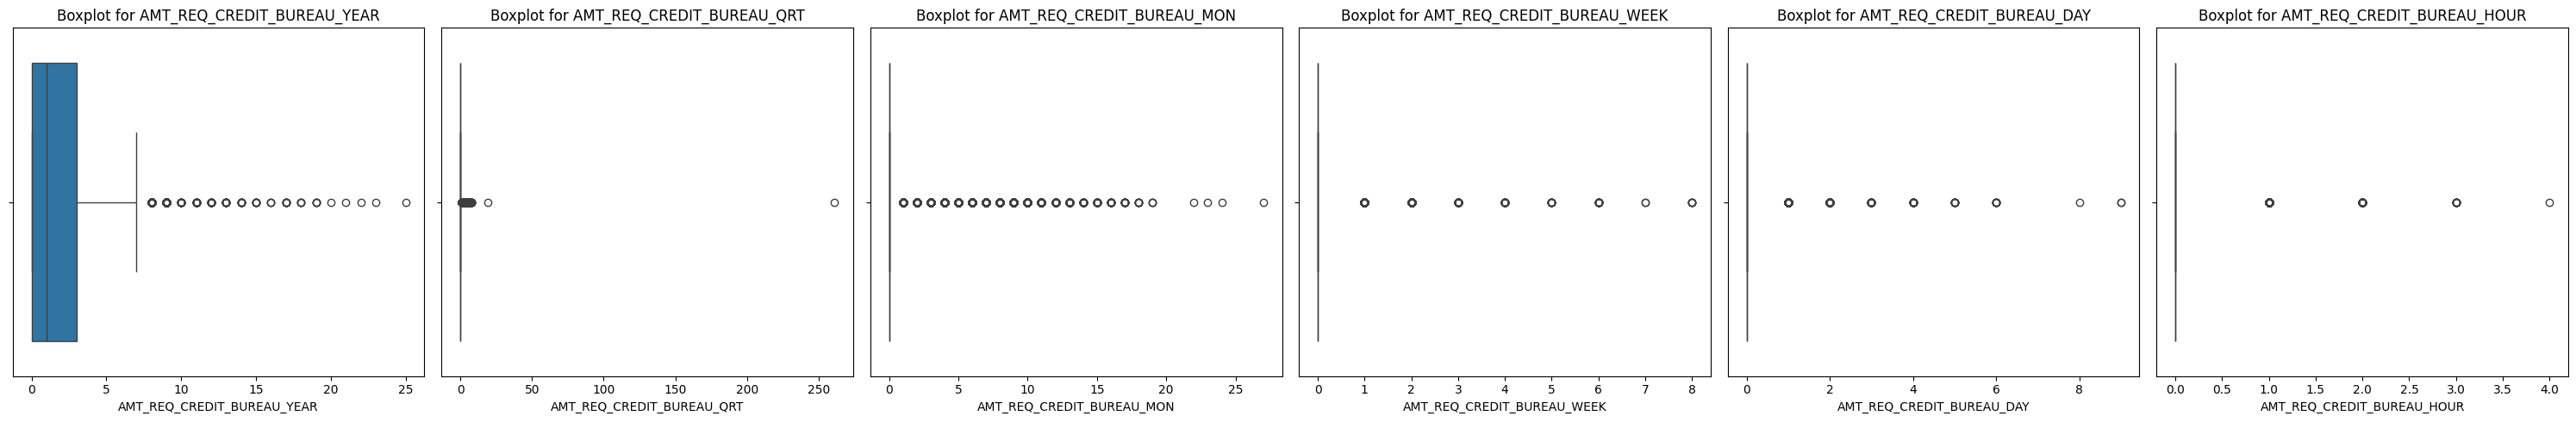

In [ ]:
def plot_boxplots(df, columns):
    """
    Plots boxplots for specified columns of a dataframe.

    Args:
    df (DataFrame): A pandas DataFrame containing the data.
    columns (list): A list of column names to plot boxplots for.
    """
    # Set the size of the figure (width, height in inches)
    plt.figure(figsize=(30, 5))

    # Loop to create a boxplot for each column
    for i, col in enumerate(columns):
        plt.subplot(1, len(columns), i + 1)  # 1 row, len(columns) columns, i+1 - current position
        sns.boxplot(x=df[col])
        plt.title(f'Boxplot for {col}')

    plt.tight_layout() # Adjusts the layout of the plots so they do not overlap each other
    plt.show()

plot_boxplots(df, columns)

In [ ]:
df['AMT_REQ_CREDIT_BUREAU_YEAR'].value_counts()

AMT_REQ_CREDIT_BUREAU_YEAR
0.00     71801
1.00     63405
2.00     50192
3.00     33628
4.00     20714
5.00     12052
6.00      6967
7.00      3869
8.00      2127
9.00      1096
11.00       31
12.00       30
10.00       22
13.00       19
14.00       10
17.00        7
15.00        6
19.00        4
18.00        4
16.00        3
25.00        1
23.00        1
22.00        1
21.00        1
20.00        1
Name: count, dtype: int64

In [ ]:
df['AMT_REQ_CREDIT_BUREAU_QRT'].value_counts()

AMT_REQ_CREDIT_BUREAU_QRT
0.00      215417
1.00       33862
2.00       14412
3.00        1717
4.00         476
5.00          64
6.00          28
8.00           7
7.00           7
261.00         1
19.00          1
Name: count, dtype: int64

In [ ]:
df['AMT_REQ_CREDIT_BUREAU_MON'].value_counts()

AMT_REQ_CREDIT_BUREAU_MON
0.00     222233
1.00      33147
2.00       5386
3.00       1991
4.00       1076
5.00        602
6.00        343
7.00        298
9.00        206
8.00        185
10.00       132
11.00       119
12.00        77
13.00        72
14.00        40
15.00        35
16.00        23
17.00        14
18.00         6
19.00         3
24.00         1
23.00         1
27.00         1
22.00         1
Name: count, dtype: int64

In [ ]:
df['AMT_REQ_CREDIT_BUREAU_WEEK'].value_counts()

AMT_REQ_CREDIT_BUREAU_WEEK
0.00    257456
1.00      8208
2.00       199
3.00        58
4.00        34
6.00        20
5.00        10
8.00         5
7.00         2
Name: count, dtype: int64

In [ ]:
df['AMT_REQ_CREDIT_BUREAU_DAY'].value_counts()

AMT_REQ_CREDIT_BUREAU_DAY
0.00    264503
1.00      1292
2.00       106
3.00        45
4.00        26
5.00         9
6.00         8
9.00         2
8.00         1
Name: count, dtype: int64

In [ ]:
df['AMT_REQ_CREDIT_BUREAU_HOUR'].value_counts()

AMT_REQ_CREDIT_BUREAU_HOUR
0.00    264366
1.00      1560
2.00        56
3.00         9
4.00         1
Name: count, dtype: int64

`AMT_REQ_CREDIT_BUREAU_YEAR`:

- Середнє: 1.90
- Медіана: 1.00
- Мода: 0.00
- Відсутні дані: 13.50%
- Максимум: 25.00

Спостереження: Середнє та медіана досить близькі, але висока різниця між 99-м перцентилем (8) та максимальним значенням (25) може вказувати на наявність викидів. Заповнення пропущених значень медіаною може бути прийнятним, оскільки це не дуже вплине на загальний розподіл даних, враховуючи велику частоту нулів (мода).

`AMT_REQ_CREDIT_BUREAU_QRT`:

- Середнє: 0.27
- Медіана: 0.00
- Мода: 0.00
- Відсутні дані: 13.50%
- Максимум: 261.00

Спостереження: Незважаючи на те, що середнє значення більше медіани, присутність дуже великого максимального значення (261) вказує на наявність викидів, які можуть спотворювати середнє. Також висока частота нульових значень. Заповнення пропущених значень медіаною може бути безпечним варіантом.

`AMT_REQ_CREDIT_BUREAU_MON`,`AMT_REQ_CREDIT_BUREAU_WEEK` , `AMT_REQ_CREDIT_BUREAU_DAY`, `AMT_REQ_CREDIT_BUREAU_HOUR`:

Середнє та медіана низькі, мода дорівнює 0.
Високий відсоток відсутності даних (13.50%).
Високі максимальні значення, особливо в порівнянні з 99-м перцентилем, що вказує на викиди.

Спостереження: Оскільки медіана та мода для цих стовпців дорівнюють 0, заповнення пропущених значень нулями не внесе суттєвих змін у загальний розподіл даних. Однак потрібно врахувати контекст цих даних. Якщо значення "0" має певний сенс (наприклад, відсутність запитів за певний період), то імпутація нулями може бути коректною.

Додатково відобразили данні на діаграмі розмаху, тому ми можемо зробити декілька спостережень, які допоможуть нам вирішити, чи слід імпутувати відсутні значення:
- `AMT_REQ_CREDIT_BUREAU_YEAR`: Є викиди, що перевищують значення 8, але основна маса даних зосереджена в діапазоні від 0 до 3. Це підтверджує рішення заповнювати пропущені значення медіаною.
- `AMT_REQ_CREDIT_BUREAU_QRT`: Викиди здаються значними, з максимальним значенням у 261, яке є далеко за межами інших даних. Оскільки більшість значень сконцентровані навколо 0, імпутація медіаною, яка дорівнює 0, є розумним вибором.
- `AMT_REQ_CREDIT_BUREAU_MON`, `AMT_REQ_CREDIT_BUREAU_WEEK`, `AMT_REQ_CREDIT_BUREAU_DAY`, `AMT_REQ_CREDIT_BUREAU_HOUR`: Всі ці змінні показують велику кількість викидів порівняно з основною масою даних, яка скупчена близько 0. Це вказує на те, що для більшості спостережень ці запити або не були зроблені, або були дуже рідкісні. Тому імпутація медіаною (0) також видається підходящим варіантом.

Загальний висновок: Можна дійти висновку, що імпутація медіаною з додаванням окремого стовпчика, який вказує на імпутовані значення, є обґрунтованим підходом. Однак слід також розглянути можливість імпутації за допомогою більш складних методів, які враховують структуру даних, особливо якщо медіана та мода не надають повної картини.

## Перевірка стовпців зі значеннями NULL > 0% та < 1%

Створення датафрейму `null_df_under1` з відсотком пропущених значень > 0% та < 1% у кожному стовпці

In [ ]:
null_df_under1 = null_df[(null_df['null_percentage'] > 0) & (null_df['null_percentage'] < 1)]

In [ ]:
null_df_under1.sort_values(by = 'null_percentage', ascending = False)

column_name  null_count  null_percentage
11           NAME_TYPE_SUITE        1292             0.42
91  OBS_30_CNT_SOCIAL_CIRCLE        1021             0.33
92  DEF_30_CNT_SOCIAL_CIRCLE        1021             0.33
93  OBS_60_CNT_SOCIAL_CIRCLE        1021             0.33
94  DEF_60_CNT_SOCIAL_CIRCLE        1021             0.33
42              EXT_SOURCE_2         660             0.21
10           AMT_GOODS_PRICE         278             0.09

### Аналіз стовпця `NAME_TYPE_SUITE`

In [ ]:
null_df_under1[null_df_under1.column_name == 'NAME_TYPE_SUITE']

column_name  null_count  null_percentage
11  NAME_TYPE_SUITE        1292             0.42

In [ ]:
df['NAME_TYPE_SUITE'].value_counts()

NAME_TYPE_SUITE
Unaccompanied      248526
Family              40149
Spouse, partner     11370
Children             3267
Other_B              1770
Other_A               866
Group of people       271
Name: count, dtype: int64

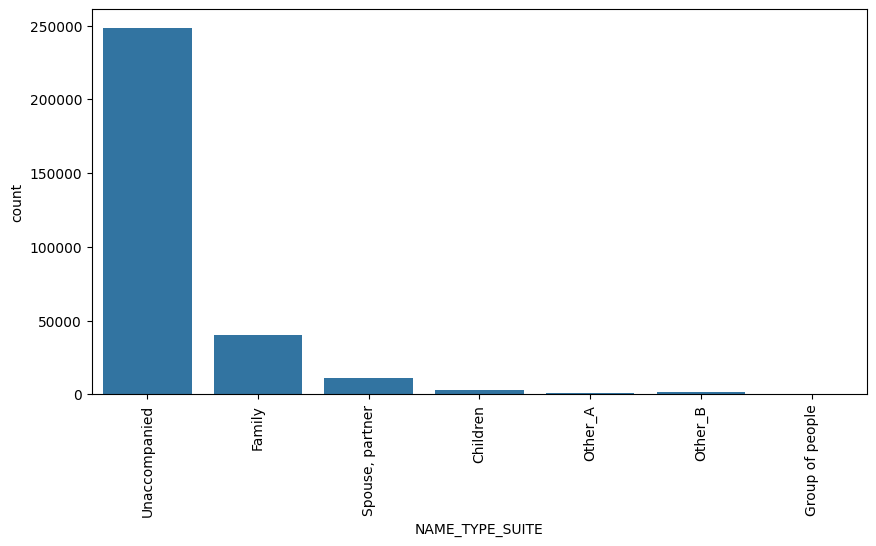

In [ ]:
plt.figure(figsize = (10,5))
sns.countplot(data = df, x = "NAME_TYPE_SUITE")
plt.xticks(rotation = 90)
plt.show()

**Спостереження**
-   Дивлячись на графік, категорія `Unaccompanied` має найбільшу кількість заявників на отримання кредиту. Отже, більшість позичальників наважуються звертатися за кредитом без супроводу.
- Ми можемо продовжити і вказати `Unaccompanied` у датафреймі, але я б віддала перевагу другому варіанту.
- Ми також могли заповнити дані зі значенням "NA", оскільки цей стовпець є категоріальним.
- Так само, якщо в стовпці відсутні менше 1% даних, ми можемо видалити відсутні значення. Але якщо ми видалимо всі дані в усіх стовпцях, які мають <=1% відсутніх даних, ми можемо видалити забагато даних. Тому я переважно зберігаю дані, наскільки можу.

In [ ]:
df['NAME_TYPE_SUITE'].fillna('NA', inplace=True)

### Analysis of `OBS_30_CNT_SOCIAL_CIRCLE` column

In [ ]:
null_df_under1[null_df_under1.column_name == 'OBS_30_CNT_SOCIAL_CIRCLE']

column_name  null_count  null_percentage
91  OBS_30_CNT_SOCIAL_CIRCLE        1021             0.33

In [ ]:
df.OBS_30_CNT_SOCIAL_CIRCLE.value_counts().head(10)

OBS_30_CNT_SOCIAL_CIRCLE
0.00    163910
1.00     48783
2.00     29808
3.00     20322
4.00     14143
5.00      9553
6.00      6453
7.00      4390
8.00      2967
9.00      2003
Name: count, dtype: int64

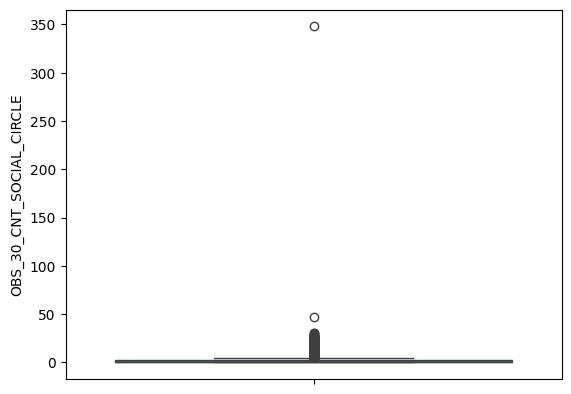

In [ ]:
sns.boxplot(df.OBS_30_CNT_SOCIAL_CIRCLE)
plt.show()

Getting percentile values for `OBS_30_CNT_SOCIAL_CIRCLE`

In [ ]:
df.OBS_30_CNT_SOCIAL_CIRCLE.quantile(q = [0.25,0.5,0.75,1])

0.25     0.00
0.50     0.00
0.75     2.00
1.00   348.00
Name: OBS_30_CNT_SOCIAL_CIRCLE, dtype: float64

Most recurring value in `OBS_30_CNT_SOCIAL_CIRCLE`

In [ ]:
df.OBS_30_CNT_SOCIAL_CIRCLE.mode()[0]

0.0

Checking the average value of `OBS_30_CNT_SOCIAL_CIRCLE`

In [ ]:
df.OBS_30_CNT_SOCIAL_CIRCLE.mean()

1.4222454239942575

**Спостереження**
- Дивлячись на боксплот, медіана становить 0,0
- Найчастіше повторюване значення становить 0,0
- Середнє значення 1,4222
- Є два виброси: 50 і 350.
- Середнє значення та мода близькі (відносно рангу даних у цьому стовпці) і можуть бути використані для імпутації. Це не призведе до зміщення, оскільки відсоток відсутнього значення невеликий (0,33%)

In [ ]:
df['OBS_30_CNT_SOCIAL_CIRCLE'].fillna(df['OBS_30_CNT_SOCIAL_CIRCLE'].median(), inplace=True)

# ДЗ 2. Аналіз і заповнення пустих значень у колонках з малим відсотком пропущених

За прикладом вище проведіть аналіз пропущених значень в колонках
- DEF_30_CNT_SOCIAL_CIRCLE
- EXT_SOURCE_2
- OBS_60_CNT_SOCIAL_CIRCLE
- DEF_60_CNT_SOCIAL_CIRCLE
- AMT_GOODS_PRICE

Для швидшого аналізу рекомендую написати фукнцію, яку Ви зможете викликати для кожної з колонок.

Зробіть висновок, що робити з пропущеними значеннями в кожному випадку і виконанайте ту дію, яку зазначили.

In [ ]:
# Список колонок для аналізу
columns_min = [
    'DEF_30_CNT_SOCIAL_CIRCLE',
    'EXT_SOURCE_2',
    'OBS_60_CNT_SOCIAL_CIRCLE',
    'DEF_60_CNT_SOCIAL_CIRCLE',
    'AMT_GOODS_PRICE'
]

# Виконання функції і запис результатів у DataFrame
statistics_df_min = calculate_statistics(df, columns_min)
statistics_df_min

Column      Mean    Median      Mode  Missing Count  Missing Percentage  25th Percentile  50th Percentile (Median)  75th Percentile  99th Percentile    Maximum
0  DEF_30_CNT_SOCIAL_CIRCLE      0.14      0.00      0.00           1021                0.33             0.00                      0.00             0.00             2.00      34.00
1              EXT_SOURCE_2      0.51      0.57      0.29            660                0.21             0.39                      0.57             0.66             0.78       0.85
2  OBS_60_CNT_SOCIAL_CIRCLE      1.41      0.00      0.00           1021                0.33             0.00                      0.00             2.00            10.00     344.00
3  DEF_60_CNT_SOCIAL_CIRCLE      0.10      0.00      0.00           1021                0.33             0.00                      0.00             0.00             2.00      24.00
4           AMT_GOODS_PRICE 538396.21 450000.00 450000.00            278                0.09        238500.00                 450000.00        679500.00       1800000.00 4050000.00

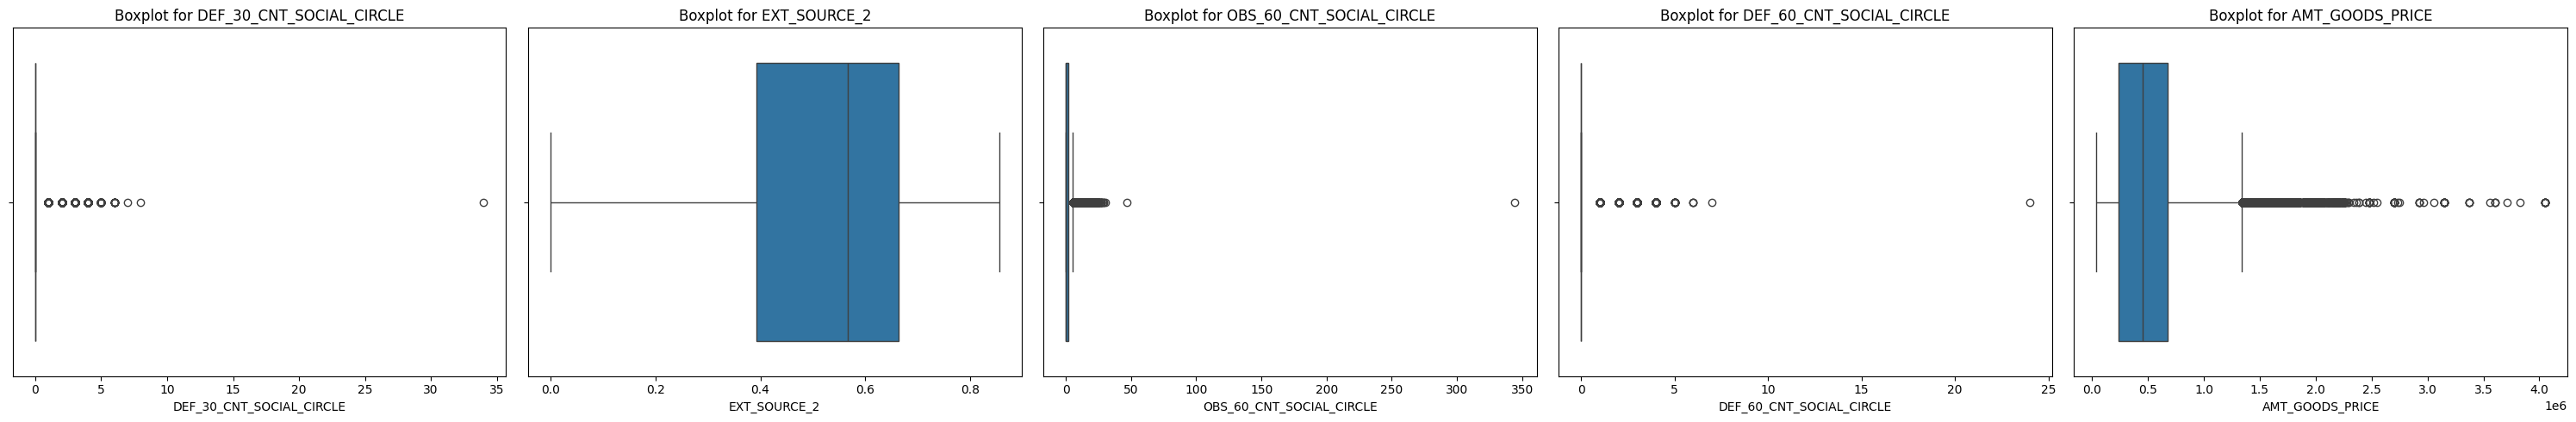

In [ ]:
plot_boxplots(df,columns_min)

In [ ]:
df['DEF_30_CNT_SOCIAL_CIRCLE'].value_counts()
#df['EXT_SOURCE_2'].value_counts()
#df['OBS_60_CNT_SOCIAL_CIRCLE'].value_counts()
#df['DEF_60_CNT_SOCIAL_CIRCLE'].value_counts()
#df['AMT_GOODS_PRICE'].value_counts()

DEF_30_CNT_SOCIAL_CIRCLE
0.00     271324
1.00      28328
2.00       5323
3.00       1192
4.00        253
5.00         56
6.00         11
7.00          1
34.00         1
8.00          1
Name: count, dtype: int64

Для кожної з колонок, на основі наданих даних і діаграм розмаху, зробимо аналіз пропущених значень та вирішимо, чи варто їх заповнювати.

`DEF_30_CNT_SOCIAL_CIRCLE`
- **Пропущені дані**: 0.33%
- **Медіана та мода**: 0.00
- **Викиди**: значення до 34

**Аналіз**: Більшість значень скупчені близько нуля, але є викиди до 34. З урахуванням малого відсотка пропущених значень імпутація медіаною (0) здається розумним варіантом, оскільки це найчастіше повторюване значення.

`EXT_SOURCE_2`
- **Пропущені дані**: 0.21%
- **Медіана**: 0.57,
- **Мода**: 0.29
- **Розмах**: 0.39 до 0.66, з викидами до 0.85

**Аналіз**: Значення сильно варіюються, але розподіл виглядає більш-менш симетричним близько медіани. З огляду на невелику кількість відсутніх даних, заповнення медіаною (0.57) є відповідним, що допоможе зберегти розподіл змінної.

`OBS_60_CNT_SOCIAL_CIRCLE`
- **Пропущені дані**: 0.33%
- **Медіана та мода**: 0.00
- **Викиди**: до 344

**Аналіз**: Ситуація схожа на DEF_30_CNT_SOCIAL_CIRCLE з масивом значень біля нуля і значними викидами. Імпутація медіаною (0) також є розумним вибором.

`DEF_60_CNT_SOCIAL_CIRCLE`
- **Пропущені дані**: 0.33%
- **Медіана та мода**: 0.00
- **Викиди**: до 24

**Аналіз**: Аналогічно до інших "соціальних кіл" стовпців, велика частина даних сконцентрована на нулі. Імпутація медіаною (0) є підходящою.

`AMT_GOODS_PRICE`
- **Пропущені дані**: 0.09%
- **Медіана та мода**: 450,000
- **Розмах**: 238,500 до 679,500, з викидами до 4,050,000

**Аналіз**: Оскільки ціни товарів мають більш різний діапазон, імпутація медіаною (450,000) може допомогти зберегти загальний розподіл, зокрема з такою низькою часткою відсутніх даних.

### Загальний висновок
Для всіх зазначених колонок, імпутація медіаною є обґрунтованою стратегією, оскільки відсоток відсутності даних є досить низьким, і це допоможе зберегти загальну структуру даних. Можна розглянути можливість додавання індикаторних змінних для позначення імпутованих значень, щоб зберегти інформацію про первісну наявність даних.

In [ ]:
#columns_min = [
#    'DEF_30_CNT_SOCIAL_CIRCLE',
 #   'EXT_SOURCE_2',
  #  'OBS_60_CNT_SOCIAL_CIRCLE',
   # 'DEF_60_CNT_SOCIAL_CIRCLE',
    #'AMT_GOODS_PRICE'
#]
missing_def_30 = df[df['DEF_30_CNT_SOCIAL_CIRCLE'].isnull()]
missing_def_30

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER  FLAG_OWN_CAR  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE NAME_TYPE_SUITE      NAME_INCOME_TYPE            NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL        OCCUPATION_TYPE  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  LIVE_REGION_NOT_WORK_REGION  REG_CITY_NOT_LIVE_CITY  REG_CITY_NOT_WORK_CITY  LIVE_CITY_NOT_WORK_CITY       ORGANIZATION_TYPE  EXT_SOURCE_2  EXT_SOURCE_3  OBS_30_CNT_SOCIAL_CIRCLE  DEF_30_CNT_SOCIAL_CIRCLE  OBS_60_CNT_SOCIAL_CIRCLE  DEF_60_CNT_SOCIAL_CIRCLE  DAYS_LAST_PHONE_CHANGE  FLAG_DOCUMENT_2  FLAG_DOCUMENT_3  FLAG_DOCUMENT_4  FLAG_DOCUMENT_5  FLAG_DOCUMENT_6  FLAG_DOCUMENT_7  FLAG_DOCUMENT_8  FLAG_DOCUMENT_9  FLAG_DOCUMENT_10  FLAG_DOCUMENT_11  FLAG_DOCUMENT_12  FLAG_DOCUMENT_13  FLAG_DOCUMENT_14  FLAG_DOCUMENT_15  FLAG_DOCUMENT_16  FLAG_DOCUMENT_17  FLAG_DOCUMENT_18  FLAG_DOCUMENT_19  FLAG_DOCUMENT_20  FLAG_DOCUMENT_21  AMT_REQ_CREDIT_BUREAU_HOUR  AMT_REQ_CREDIT_BUREAU_DAY  AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR
68         100080       0    Revolving loans           F             0                0             1         157500.00   450000.00     22500.00        450000.00   Unaccompanied  Commercial associate  Secondary / secondary special        Civil marriage  House / apartment                        0.01      -11956          -3154           -8118.00            -4143           1               1                0                 1           0           0            Sales staff             3.00                     2                            2                     SUNDAY                       10                           0                           0                            0                       0                       0                        0            Kindergarten          0.12          0.83                      0.00                       NaN                       NaN                       NaN                -1711.00                0                0                0                0                0                0                0                0                 0                 0                 0                 0                 0                 0                 0                 0                 0                 0                 0                 0                        0.00                       0.00                        0.00                       0.00                       0.00                        5.00
394        100457       0    Revolving loans           F             1                1             0         211500.00   270000.00     13500.00        270000.00   Unaccompanied               Working               Higher education  Single / not married  House / apartment                        0.01       -8922           -728           -8882.00              -66           1               1                0                 1           1           0             Core staff             1.00                     2                            2                     MONDAY                       12                           0                           0                            0                       1                       1                        0           Trade: type 2          0.66           NaN                      0.00                       NaN                       NaN                       NaN                 -638.00                0                0                0                0                0                0                0                0                 0                 0         

In [ ]:
def fill_missing_with_median(df, columns_list):
    """
    Fill missing values with the median for specified columns of a dataframe.

    Args:
    df (DataFrame): A pandas DataFrame containing the data.
    columns_list (list): A list of column names for which to fill missing values with the median.
    """
    # Process each column in the provided list
    for column_name in columns_list:
        # Create a new column to identify imputed values
        # 1 indicates that the value was imputed, 0 indicates the value was originally present
        df[column_name + '_imputed'] = df[column_name].isnull().astype(int)

        # Replace missing values with the median
        median_value = df[column_name].median()
        df[column_name].fillna(median_value, inplace=True)

    return df

In [ ]:
df = fill_missing_with_median(df, columns_min)


In [ ]:
# Створення списку з оригінальних та нових імпутованих колонок
columns_to_display = columns_min + [col + '_imputed' for col in columns_min]

# Виведення перших 10 рядків цих колонок
#df[columns_to_display].head(10)

# testing
rows_with_imputation = df[df['DEF_30_CNT_SOCIAL_CIRCLE_imputed'] == 1]
rows_with_imputation

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER  FLAG_OWN_CAR  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE NAME_TYPE_SUITE      NAME_INCOME_TYPE            NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL        OCCUPATION_TYPE  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  LIVE_REGION_NOT_WORK_REGION  REG_CITY_NOT_LIVE_CITY  REG_CITY_NOT_WORK_CITY  LIVE_CITY_NOT_WORK_CITY       ORGANIZATION_TYPE  EXT_SOURCE_2  EXT_SOURCE_3  OBS_30_CNT_SOCIAL_CIRCLE  DEF_30_CNT_SOCIAL_CIRCLE  OBS_60_CNT_SOCIAL_CIRCLE  DEF_60_CNT_SOCIAL_CIRCLE  DAYS_LAST_PHONE_CHANGE  FLAG_DOCUMENT_2  FLAG_DOCUMENT_3  FLAG_DOCUMENT_4  FLAG_DOCUMENT_5  FLAG_DOCUMENT_6  FLAG_DOCUMENT_7  FLAG_DOCUMENT_8  FLAG_DOCUMENT_9  FLAG_DOCUMENT_10  FLAG_DOCUMENT_11  FLAG_DOCUMENT_12  FLAG_DOCUMENT_13  FLAG_DOCUMENT_14  FLAG_DOCUMENT_15  FLAG_DOCUMENT_16  FLAG_DOCUMENT_17  FLAG_DOCUMENT_18  FLAG_DOCUMENT_19  FLAG_DOCUMENT_20  FLAG_DOCUMENT_21  AMT_REQ_CREDIT_BUREAU_HOUR  AMT_REQ_CREDIT_BUREAU_DAY  AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  DEF_30_CNT_SOCIAL_CIRCLE_imputed  EXT_SOURCE_2_imputed  OBS_60_CNT_SOCIAL_CIRCLE_imputed  DEF_60_CNT_SOCIAL_CIRCLE_imputed  AMT_GOODS_PRICE_imputed
68         100080       0    Revolving loans           F             0                0             1         157500.00   450000.00     22500.00        450000.00   Unaccompanied  Commercial associate  Secondary / secondary special        Civil marriage  House / apartment                        0.01      -11956          -3154           -8118.00            -4143           1               1                0                 1           0           0            Sales staff             3.00                     2                            2                     SUNDAY                       10                           0                           0                            0                       0                       0                        0            Kindergarten          0.12          0.83                      0.00                      0.00                      0.00                      0.00                -1711.00                0                0                0                0                0                0                0                0                 0                 0                 0                 0                 0                 0                 0                 0                 0                 0                 0                 0                        0.00                       0.00                        0.00                       0.00                       0.00                        5.00                                 1                     0                                 1                                 1                        0
394        100457       0    Revolving loans           F             1                1             0         211500.00   270000.00     13500.00        270000.00   Unaccompanied               Working               Higher education  Single / not married  House / apartment                        0.01       -8922           -728           -8882.00              -66           1               1                0                 1           1           0             Core staff             1.00                     2                            2                     MONDAY                       12                           0                           0                            0                       1                       1                        0           Trade: type 2          0.66           NaN           

# Робота з неправильними/невідомими значеннями даних

### Аналіз стовпця `CODE_GENDER`

Перевірка діапазону значень

In [ ]:
df['CODE_GENDER'].value_counts()

CODE_GENDER
F      202448
M      105059
XNA         4
Name: count, dtype: int64

Стать має бути тільки чоловіча або жіноча. Значення `XNA` може вказувати на те, що значення не було надано заявником або пропущено кредитним спеціалістом, який перевіряє заявку

In [ ]:
df[df['CODE_GENDER'] == 'XNA']

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER  FLAG_OWN_CAR  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE NAME_TYPE_SUITE      NAME_INCOME_TYPE            NAME_EDUCATION_TYPE NAME_FAMILY_STATUS    NAME_HOUSING_TYPE  REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL     OCCUPATION_TYPE  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  LIVE_REGION_NOT_WORK_REGION  REG_CITY_NOT_LIVE_CITY  REG_CITY_NOT_WORK_CITY  LIVE_CITY_NOT_WORK_CITY       ORGANIZATION_TYPE  EXT_SOURCE_2  EXT_SOURCE_3  OBS_30_CNT_SOCIAL_CIRCLE  DEF_30_CNT_SOCIAL_CIRCLE  OBS_60_CNT_SOCIAL_CIRCLE  DEF_60_CNT_SOCIAL_CIRCLE  DAYS_LAST_PHONE_CHANGE  FLAG_DOCUMENT_2  FLAG_DOCUMENT_3  FLAG_DOCUMENT_4  FLAG_DOCUMENT_5  FLAG_DOCUMENT_6  FLAG_DOCUMENT_7  FLAG_DOCUMENT_8  FLAG_DOCUMENT_9  FLAG_DOCUMENT_10  FLAG_DOCUMENT_11  FLAG_DOCUMENT_12  FLAG_DOCUMENT_13  FLAG_DOCUMENT_14  FLAG_DOCUMENT_15  FLAG_DOCUMENT_16  FLAG_DOCUMENT_17  FLAG_DOCUMENT_18  FLAG_DOCUMENT_19  FLAG_DOCUMENT_20  FLAG_DOCUMENT_21  AMT_REQ_CREDIT_BUREAU_HOUR  AMT_REQ_CREDIT_BUREAU_DAY  AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  DEF_30_CNT_SOCIAL_CIRCLE_imputed  EXT_SOURCE_2_imputed  OBS_60_CNT_SOCIAL_CIRCLE_imputed  DEF_60_CNT_SOCIAL_CIRCLE_imputed  AMT_GOODS_PRICE_imputed
35657      141289       0    Revolving loans         XNA             1                1             0         207000.00   382500.00     19125.00        337500.00   Unaccompanied               Working  Secondary / secondary special            Married  Municipal apartment                        0.02      -20232         -10044          -10024.00            -3537           1               1                1                 1           1           0             Unknown             2.00                     3                            3                    TUESDAY                       10                           0                           0                            0                       0                       0                        0  Business Entity Type 1          0.30          0.46                      0.00                      0.00                      0.00                      0.00                 -286.00                0                0                0                0                0                0                0                0                 0                 0                 0                 0                 0                 0                 0                 0                 0                 0                 0                 0                        0.00                       0.00                        0.00                       0.00                       0.00                        1.00                                 0                     0                                 0                                 0                        0
38566      144669       0    Revolving loans         XNA             0                1             2         157500.00   270000.00     13500.00        225000.00          Family               Working  Secondary / secondary special            Married    House / apartment                        0.03      -13717          -2797           -2241.00            -4659           1               1                1                 1           1           0  Low-skill Laborers             4.00                     2                            2                     FRIDAY                       16                           0                           0                            0                       0                       0                        0        Industry: type 3          0.71          0.31                      0

Оскільки дані виглядають достовірними, ми перевіримо можливість застосування методу імпутації.
- Заявників-жінок удвічі більше, ніж заявників-чоловіків
- Отже, ми прирівняємо `CODE_GENDER` до 'F'

In [ ]:
df['CODE_GENDER_CHANGED'] = df['CODE_GENDER'].apply(lambda x: 1 if x == 'XNA' else 0)

In [ ]:
df['CODE_GENDER'] = df['CODE_GENDER'].apply(lambda x: 'F' if x == 'XNA' else x)

Перевірка, чи вилучено `XNA

In [ ]:
df['CODE_GENDER'].value_counts()

CODE_GENDER
F    202452
M    105059
Name: count, dtype: int64

### Аналіз стовпця `DAYS_BIRTH`

In [ ]:
df['DAYS_BIRTH'].value_counts().head()

DAYS_BIRTH
-13749    43
-13481    42
-18248    41
-10020    41
-15771    40
Name: count, dtype: int64

Існує ~17K+ унікальних записів, всі з яких, схоже, мають від'ємні значення

In [ ]:
df['DAYS_BIRTH'].unique()

array([ -9461, -16765, -19046, ...,  -7951,  -7857, -25061])

In [ ]:
df['DAYS_BIRTH'].nunique()

17460

In [ ]:
df['DAYS_BIRTH'].describe()

count   307511.00
mean    -16037.00
std       4363.99
min     -25229.00
25%     -19682.00
50%     -15750.00
75%     -12413.00
max      -7489.00
Name: DAYS_BIRTH, dtype: float64

Перетворення `Days Birth` на додатні дні

In [ ]:
df['DAYS_BIRTH'] = df['DAYS_BIRTH'].apply(lambda x: -x if x < 0 else x)

In [ ]:
df['DAYS_BIRTH'].describe()

count   307511.00
mean     16037.00
std       4363.99
min       7489.00
25%      12413.00
50%      15750.00
75%      19682.00
max      25229.00
Name: DAYS_BIRTH, dtype: float64

Всі дні в `DAYS_BIRTH` мають додатні значення - це може бути зручніше для аналізу.

#### Створимо нову колонку `YEARS_BIRTH` для зручності аналізу

In [ ]:
df['YEARS_BIRTH'] = df['DAYS_BIRTH'].apply(lambda x: round(x/365))

### Аналіз стовпця `NAME_FAMILY_STATUS`

Перевірка діапазону значень

In [ ]:
df['NAME_FAMILY_STATUS'].value_counts()

NAME_FAMILY_STATUS
Married                 196432
Single / not married     45444
Civil marriage           29775
Separated                19770
Widow                    16088
Unknown                      2
Name: count, dtype: int64

Стать має бути тільки чоловіча або жіноча. Значення `Unknown` може означати, що значення не було вказане заявником або пропущене кредитним спеціалістом, який перевіряє заявку

In [ ]:
df[df['NAME_FAMILY_STATUS'] == 'Unknown']

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER  FLAG_OWN_CAR  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE NAME_TYPE_SUITE      NAME_INCOME_TYPE NAME_EDUCATION_TYPE NAME_FAMILY_STATUS    NAME_HOUSING_TYPE  REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  LIVE_REGION_NOT_WORK_REGION  REG_CITY_NOT_LIVE_CITY  REG_CITY_NOT_WORK_CITY  LIVE_CITY_NOT_WORK_CITY       ORGANIZATION_TYPE  EXT_SOURCE_2  EXT_SOURCE_3  OBS_30_CNT_SOCIAL_CIRCLE  DEF_30_CNT_SOCIAL_CIRCLE  OBS_60_CNT_SOCIAL_CIRCLE  DEF_60_CNT_SOCIAL_CIRCLE  DAYS_LAST_PHONE_CHANGE  FLAG_DOCUMENT_2  FLAG_DOCUMENT_3  FLAG_DOCUMENT_4  FLAG_DOCUMENT_5  FLAG_DOCUMENT_6  FLAG_DOCUMENT_7  FLAG_DOCUMENT_8  FLAG_DOCUMENT_9  FLAG_DOCUMENT_10  FLAG_DOCUMENT_11  FLAG_DOCUMENT_12  FLAG_DOCUMENT_13  FLAG_DOCUMENT_14  FLAG_DOCUMENT_15  FLAG_DOCUMENT_16  FLAG_DOCUMENT_17  FLAG_DOCUMENT_18  FLAG_DOCUMENT_19  FLAG_DOCUMENT_20  FLAG_DOCUMENT_21  AMT_REQ_CREDIT_BUREAU_HOUR  AMT_REQ_CREDIT_BUREAU_DAY  AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  DEF_30_CNT_SOCIAL_CIRCLE_imputed  EXT_SOURCE_2_imputed  OBS_60_CNT_SOCIAL_CIRCLE_imputed  DEF_60_CNT_SOCIAL_CIRCLE_imputed  AMT_GOODS_PRICE_imputed  CODE_GENDER_CHANGED  YEARS_BIRTH
41982      148605       0    Revolving loans           M             0                1             0         450000.00   675000.00     33750.00        450000.00              NA  Commercial associate     Lower secondary            Unknown  Municipal apartment                        0.02       12396          -1161           -3265.00            -4489           1               1                1                 1           1           0        Managers              NaN                     2                            2                   THURSDAY                       15                           0                           1                            1                       0                       1                        1               Insurance          0.70           NaN                      3.00                      0.00                      3.00                      0.00                 -876.00                0                0                0                1                0                0                0                0                 0                 0                 0                 0                 0                 0                 0                 0                 0                 0                 0                 0                         NaN                        NaN                         NaN                        NaN                        NaN                         NaN                                 0                     0                                 0                                 0                        1                    0           34
187348     317181       0    Revolving loans           F             0                1             0         202500.00   585000.00     29250.00        450000.00              NA  Commercial associate    Higher education            Unknown    House / apartment                        0.03       12844           -232           -1597.00            -1571           1               1                0                 1           0           0     Accountants              NaN                     2                            2                     FRIDAY                       14                           0                           0                            0                       0                       0                        0  Business Entity Type 2          0.65          0.67

In [ ]:
df['NAME_FAMILY_STATUS'].value_counts(normalize = True) * 100

NAME_FAMILY_STATUS
Married                63.88
Single / not married   14.78
Civil marriage          9.68
Separated               6.43
Widow                   5.23
Unknown                 0.00
Name: proportion, dtype: float64

Оскільки дані виглядають достовірними, ми продовжимо перевірку методу імплікації.
- Одружені заявники складають понад 63% заявників.
- Отже, ми прирівняємо `NAME_FAMILY_STATUS` до `Married`.

In [ ]:
df['NAME_FAMILY_STATUS'] = df['NAME_FAMILY_STATUS'].apply(lambda x: 'Married' if x == 'Unknown' else x)

Перевірка чи вилучено `Unknown`

In [ ]:
df['NAME_FAMILY_STATUS'].value_counts()

NAME_FAMILY_STATUS
Married                 196434
Single / not married     45444
Civil marriage           29775
Separated                19770
Widow                    16088
Name: count, dtype: int64

### Аналіз стовпця`DAYS_EMPLOYED`

In [ ]:
df['DAYS_EMPLOYED'].value_counts().head()

DAYS_EMPLOYED
 365243    55374
-200         156
-224         152
-230         151
-199         151
Name: count, dtype: int64

In [ ]:
df['DAYS_EMPLOYED'].value_counts(normalize = True) * 100

DAYS_EMPLOYED
 365243   18.01
-200       0.05
-224       0.05
-230       0.05
-199       0.05
           ... 
-13961     0.00
-11827     0.00
-10176     0.00
-9459      0.00
-8694      0.00
Name: proportion, Length: 12574, dtype: float64

In [ ]:
len(df[df['DAYS_EMPLOYED'] < 365243])

252137

In [ ]:
df[df['DAYS_EMPLOYED'] < 365243].DAYS_EMPLOYED.value_counts()

DAYS_EMPLOYED
-200      156
-224      152
-199      151
-230      151
-212      150
         ... 
-13961      1
-11827      1
-10176      1
-9459       1
-8694       1
Name: count, Length: 12573, dtype: int64

In [ ]:
df['DAYS_EMPLOYED'].unique()

array([  -637,  -1188,   -225, ..., -12971, -11084,  -8694])

In [ ]:
df['DAYS_EMPLOYED'].nunique()

12574

**Спостереження**
- Існує ~55K+ записів, для яких `DAYS_EMPLOYED` дорівнює 365243 дням
- Решта 252K+ записів мають від'ємне значення днів
- Існує 12 574 унікальних значень для `DAYS_EMPLOYED

 - Колонка `DAYS_EMPLOYED` вказує на те, за скільки днів до подачі заявки особа почала поточну роботу, заявник/кредитний спеціаліст повинен ввести від'ємні значення, щоб вказати дні, що передують даті подачі заявки.<br>
 - Ми конвертуємо від'ємні значення в `DAYS_EMPLOYED` в додатні дні, щоб стандартизувати дні під час використання в розрахунках

In [ ]:
df['DAYS_EMPLOYED'] = df['DAYS_EMPLOYED'].apply(lambda x: -x if x < 0 else x)

In [ ]:
df['DAYS_EMPLOYED'].value_counts().head()

DAYS_EMPLOYED
365243    55374
200         156
224         152
230         151
199         151
Name: count, dtype: int64

Ми бачимо, що всі дні в `DAYS_EMPLOYED` мають додатні значення.

**Для ~55K+ записів, для яких `DAYS_EMPLOYED` становить 365243 дні**
- Конвертуючи це в роки, ми отримуємо 1000 років, які фізично неможливо використати для працевлаштування заявника
- Це відповідає 18% даних і не може бути аномалією
- Вони можуть бути або "пенсіонерами", або "безробітними", і, дивлячись на дані, наш висновок є правильним

> Є два способи впоратися з цим
>> 1) Ми залишаємо дані такими, якими вони є, і враховуємо це під час аналізу АБО  <br>
>> 2) Ми розраховуємо середню кількість днів зайнятості без урахування цієї категорії та вписуємо її замість 365243 днів для пенсіонерів. <br>
>> Для безробітних кількість днів зайнятості може дорівнювати 0

*Примітка*
 - Під час розрахунків у цьому стовпчику ми повинні враховувати цей сценарій, оскільки інакше він спотворює наші результати

In [ ]:
days_median = df[df['DAYS_EMPLOYED'] != 365243].DAYS_EMPLOYED.median()

In [ ]:
df_days_employed = df['DAYS_EMPLOYED'].apply(lambda x: days_median if x==365243 else x)

<Axes: >

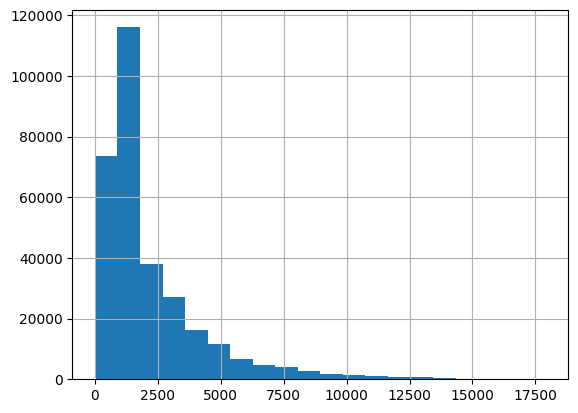

In [ ]:
df_days_employed.hist(bins=20)

<Axes: >

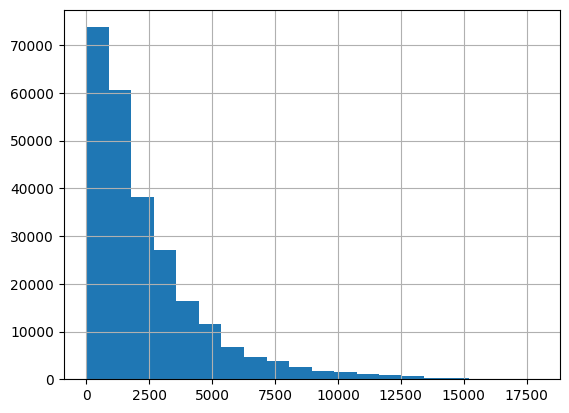

In [ ]:
df[df['DAYS_EMPLOYED'] != 365243].DAYS_EMPLOYED.hist(bins=20)

In [ ]:
df[df['DAYS_EMPLOYED'] == 365243].NAME_INCOME_TYPE.value_counts()

NAME_INCOME_TYPE
Pensioner     55352
Unemployed       22
Name: count, dtype: int64

#### Створимо нову колонку `YEARS_EMPLOYED` для зручності аналізу

In [ ]:
df['YEARS_EMPLOYED'] = df['DAYS_EMPLOYED'].apply(lambda x: round(x/365))

### Аналіз стовпця `DAYS_REGISTRATION`

In [ ]:
df['DAYS_REGISTRATION'].value_counts().head()

DAYS_REGISTRATION
-1.00    113
-7.00     98
-6.00     96
-4.00     92
-2.00     92
Name: count, dtype: int64

In [ ]:
df['DAYS_REGISTRATION'].value_counts(normalize = True).head()

DAYS_REGISTRATION
-1.00   0.00
-7.00   0.00
-6.00   0.00
-4.00   0.00
-2.00   0.00
Name: proportion, dtype: float64

In [ ]:
df['DAYS_REGISTRATION'].unique()

array([ -3648.,  -1186.,  -4260., ..., -16396., -14558., -14798.])

In [ ]:
df['DAYS_REGISTRATION'].nunique()

15688

Перетворення `DAYS_REGISTRATION` в додатні дні

In [ ]:
df['DAYS_REGISTRATION'] = df['DAYS_REGISTRATION'].apply(lambda x: -x if x < 0 else x)

In [ ]:
df['DAYS_REGISTRATION'].value_counts().head()

DAYS_REGISTRATION
1.00    113
7.00     98
6.00     96
4.00     92
2.00     92
Name: count, dtype: int64

Всі дні в `DAYS_REGISTRATION` мають додатні значення

#### Створимо нову колонку `YEARS_REGISTRATION` для зручності аналізу

In [ ]:
df['YEARS_REGISTRATION'] = df['DAYS_REGISTRATION'].apply(lambda x: round(x/365))

### Аналіз стовпця `DAYS_ID_PUBLISH`

In [ ]:
df['DAYS_ID_PUBLISH'].value_counts().head()

DAYS_ID_PUBLISH
-4053    169
-4095    162
-4046    161
-4417    159
-4256    158
Name: count, dtype: int64

In [ ]:
df['DAYS_ID_PUBLISH'].value_counts(normalize = True).head()

DAYS_ID_PUBLISH
-4053   0.00
-4095   0.00
-4046   0.00
-4417   0.00
-4256   0.00
Name: proportion, dtype: float64

In [ ]:
df['DAYS_ID_PUBLISH'].unique()

array([-2120,  -291, -2531, ..., -6194, -5854, -6211])

In [ ]:
df['DAYS_ID_PUBLISH'].nunique()

6168

Перетворення `DAYS_ID_PUBLISH` в додатні дні

In [ ]:
df['DAYS_ID_PUBLISH'] = df['DAYS_ID_PUBLISH'].apply(lambda x: -x if x < 0 else x)

In [ ]:
df['DAYS_ID_PUBLISH'].value_counts().head()

DAYS_ID_PUBLISH
4053    169
4095    162
4046    161
4417    159
4256    158
Name: count, dtype: int64

Всі дні в `DAYS_ID_PUBLISH` мають додатні значення

#### Створимо нову колонку `YEARS_ID_PUBLISH` для зручності аналізу

In [ ]:
df['YEARS_ID_PUBLISH'] = df['DAYS_ID_PUBLISH'].apply(lambda x: round(x/365))

### Аналіз стовпця `DAYS_LAST_PHONE_CHANGE`

In [ ]:
df['DAYS_LAST_PHONE_CHANGE'].value_counts().head()

DAYS_LAST_PHONE_CHANGE
0.00     37672
-1.00     2812
-2.00     2318
-3.00     1763
-4.00     1285
Name: count, dtype: int64

In [ ]:
df['DAYS_LAST_PHONE_CHANGE'].value_counts(normalize = True).head()

DAYS_LAST_PHONE_CHANGE
0.00    0.12
-1.00   0.01
-2.00   0.01
-3.00   0.01
-4.00   0.00
Name: proportion, dtype: float64

In [ ]:
df['DAYS_LAST_PHONE_CHANGE'].unique()

array([-1134.,  -828.,  -815., ..., -3988., -3899., -3538.])

In [ ]:
df['DAYS_LAST_PHONE_CHANGE'].nunique()

3773

Перетворення `DAYS_LAST_PHONE_CHANGE` в додатні дні

In [ ]:
df['DAYS_LAST_PHONE_CHANGE'] = df['DAYS_LAST_PHONE_CHANGE'].apply(lambda x: -x if x < 0 else x)

In [ ]:
df['DAYS_LAST_PHONE_CHANGE'].value_counts().head()

DAYS_LAST_PHONE_CHANGE
0.00    37672
1.00     2812
2.00     2318
3.00     1763
4.00     1285
Name: count, dtype: int64

Всі дні в `DAYS_LAST_PHONE_CHANGE` мають додатні значення

#### Створення нової колонки `YEARS_LAST_PHONE_CHANGE` для зручності аналізу

In [ ]:
df['YEARS_LAST_PHONE_CHANGE'] = df['DAYS_LAST_PHONE_CHANGE'].apply(lambda x: round(x/365,0))

# Функції для автоматизації

### Створення функції `age_cat` для категоризації даних, що містять інформацію про роки

In [ ]:
def age_cat(years):
    if years <= 20:
        return '0-20'
    elif years > 20 and years <= 30:
        return '20-30'
    elif years > 30 and years <= 40:
        return '30-40'
    elif years > 40 and years <= 50:
        return '40-50'
    elif years > 50 and years <= 60:
        return '50-60'
    elif years > 60 and years <= 70:
        return '60-70'
    elif years > 70:
        return '70+'

### Одномірний (категоріальний vs цільовий) та двомірний (категоріальний vs категоріальний) аналіз (гістограма) - категоріальні стовпчики

In [ ]:
import matplotlib.pyplot as plt


def bi_cat_countplot(df, column, hue_column):
    unique_hue_values = df[hue_column].unique()
    fig, axes = plt.subplots(nrows=1, ncols=2)
    fig.set_size_inches(14,6)

    pltname = f'Нормалізований розподіл значень за категорією: {column}'
    proportions = df.groupby(hue_column)[column].value_counts(normalize=True)
    proportions = (proportions*100).round(2)
    ax = proportions.unstack(hue_column).sort_values(
        by=unique_hue_values[0], ascending=False
        ).plot.bar(ax=axes[0], title=pltname)

    # анотація значень в барплоті
    for container in ax.containers:
        ax.bar_label(container, fmt='{:,.1f}%')

    pltname = f'Кількість даних за категорією: {column}'
    counts = df.groupby(hue_column)[column].value_counts()
    ax = counts.unstack(hue_column).sort_values(
        by=unique_hue_values[0], ascending=False
        ).plot.bar(ax=axes[1], title=pltname)

    for container in ax.containers:
      ax.bar_label(container)


def uni_cat_target_compare(df, column):
    bi_cat_countplot(df, column, hue_column='TARGET')


### Обчислення мінімального та максимального діапазону відхилень для числових стовпців

In [ ]:
def outlier_range(dataset,column):
    Q1 = dataset[column].quantile(0.25)
    Q3 = dataset[column].quantile(0.75)
    IQR = Q3 - Q1
    Min_value = (Q1 - 1.5 * IQR)
    Max_value = (Q3 + 1.5 * IQR)
    return Max_value

### Робота з викидами для числових стовпців

In [ ]:
import warnings

def dist_box(dataset, column):
    with warnings.catch_warnings():
      warnings.simplefilter("ignore")

      plt.figure(figsize=(16,6))

      plt.subplot(1,2,1)
      sns.distplot(dataset[column], color = 'purple')
      pltname = 'Графік розподілу для ' + column
      plt.ticklabel_format(style='plain', axis='x')
      plt.title(pltname)

      plt.subplot(1,2,2)
      red_diamond = dict(markerfacecolor='r', marker='D')
      sns.boxplot(y = column, data = dataset, flierprops = red_diamond)
      pltname = 'Боксплот для ' + column
      plt.title(pltname)

      plt.show()

### Аналіз стовпця`CNT_CHILDREN`

In [ ]:
df['CNT_CHILDREN'].value_counts().sort_values(ascending = False);

In [ ]:
(df['CNT_CHILDREN'].value_counts(normalize = True).sort_values(ascending = False) * 100).head()

CNT_CHILDREN
0   70.04
1   19.88
2    8.70
3    1.21
4    0.14
Name: proportion, dtype: float64

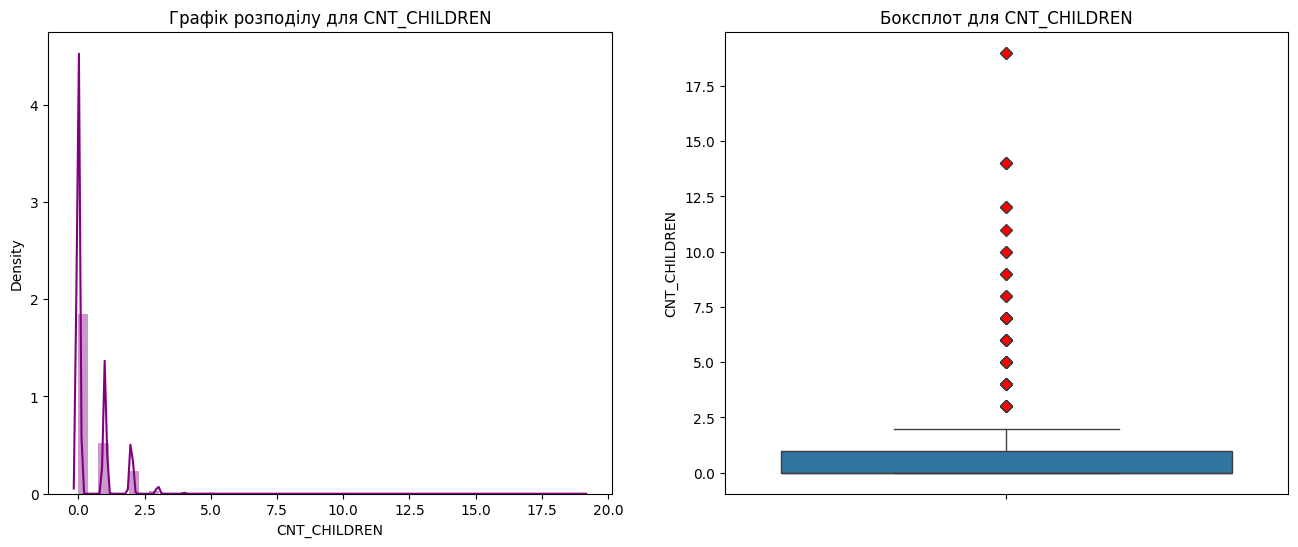

In [ ]:
dist_box(df,'CNT_CHILDREN')

Розрахуємо IQR (Inter Quartile range)

In [ ]:
Q1 = df['CNT_CHILDREN'].quantile(0.25)
Q3 = df['CNT_CHILDREN'].quantile(0.75)
IQR = Q3 - Q1
print(IQR)

1.0


In [ ]:
Q1, Q3

(0.0, 1.0)

Значення *до* (Q1 - 1,5 * IQR) та *після* (Q3 + 1,5 * IQR) є викидами

In [ ]:
Min_value = (Q1 - 1.5 * IQR)
Max_value = (Q3 + 1.5 * IQR)
print("Мінімальне значення, до якого існують викиди: {}".format(Min_value))
print("Максимальне значення, після якого існують викиди: {}".format(Max_value))

Мінімальне значення, до якого існують викиди: -1.5
Максимальне значення, після якого існують викиди: 2.5


In [ ]:
df[df['CNT_CHILDREN'].isin(range(10,20))].YEARS_BIRTH

34545     47
80948     39
132585    31
155369    30
171125    38
176011    49
183878    56
186820    41
265784    28
267998    42
Name: YEARS_BIRTH, dtype: int64

In [ ]:
df[df['CNT_CHILDREN'].isin([10])][['SK_ID_CURR', 'CNT_CHILDREN', 'YEARS_BIRTH']]

SK_ID_CURR  CNT_CHILDREN  YEARS_BIRTH
132585     253779            10           31
186820     316580            10           41

**Спостереження**
- Дивлячись на дані, ми бачимо, що кількість заявників, які мають більше 7 дітей, є дуже мінімальною (2 або 3 в кожній категорії)
- Крім того, дивлячись на дані для заявників з 10 дітьми, заявники мають лише 31 й 41 рік відповідно. Це виглядає як одиничний випадок й може розглядатися як відхилення від норми
- Як дистрибутивні, так і діаграми розмаху чітко показують, що значення, які перевищують значення 2.5, є відхиленнями від норми.

**Висновок**
- Заявники, які мають 3 або більше дітей, є випадками, що відхиляються від норми. Ми можемо надати спеціальний аналіз для цих випадків.

### Аналіз стовпця `AMT_INCOME_TOTAL`

In [ ]:
df['AMT_INCOME_TOTAL'].value_counts().sort_values(ascending = False).head()

AMT_INCOME_TOTAL
135000.00    35750
112500.00    31019
157500.00    26556
180000.00    24719
90000.00     22483
Name: count, dtype: int64

In [ ]:
(df['AMT_INCOME_TOTAL'].value_counts(normalize = True).sort_values(ascending = False) * 100).head()

AMT_INCOME_TOTAL
135000.00   11.63
112500.00   10.09
157500.00    8.64
180000.00    8.04
90000.00     7.31
Name: proportion, dtype: float64

In [ ]:
df['AMT_INCOME_TOTAL'].describe(percentiles = [0.75,0.99,0.999])

count      307511.00
mean       168797.92
std        237123.15
min         25650.00
50%        147150.00
75%        202500.00
99%        472500.00
99.9%      900000.00
max     117000000.00
Name: AMT_INCOME_TOTAL, dtype: float64

Побудуємо графік для `AMT_INCOME_TOTAL`

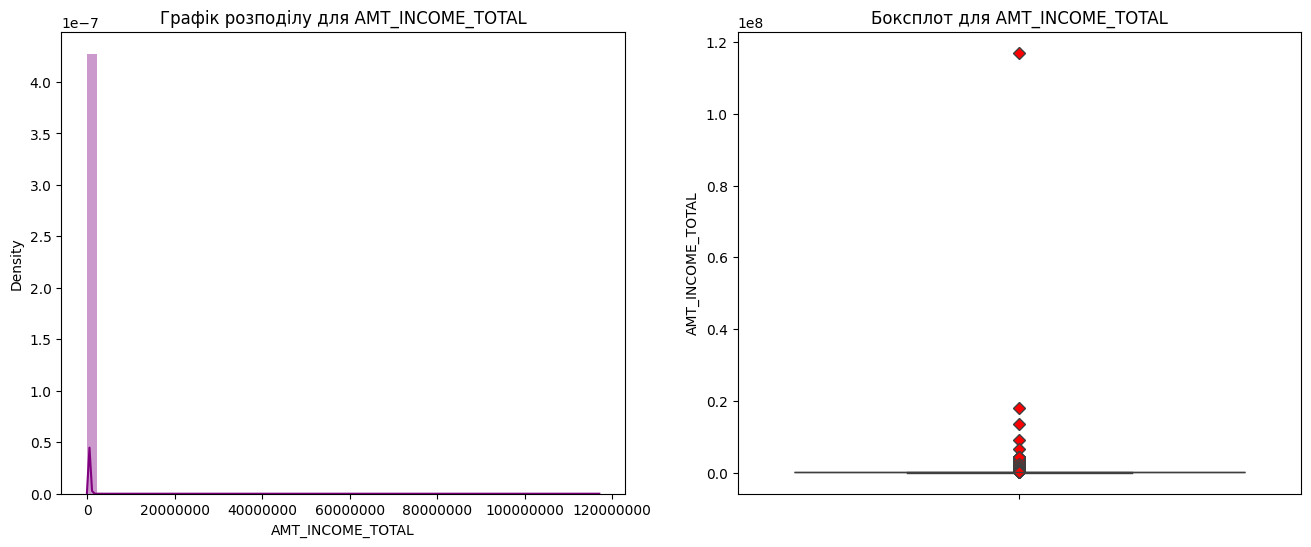

In [ ]:
dist_box(df,'AMT_INCOME_TOTAL')

- Графіки кінцевого результату дуже тонкі, й ми можемо спостерігати викид близько ~120 мільйонів.
- Давайте побудуємо графік, розглядаючи лише дохід нижче 99,9% значення, тобто 900 тисяч.

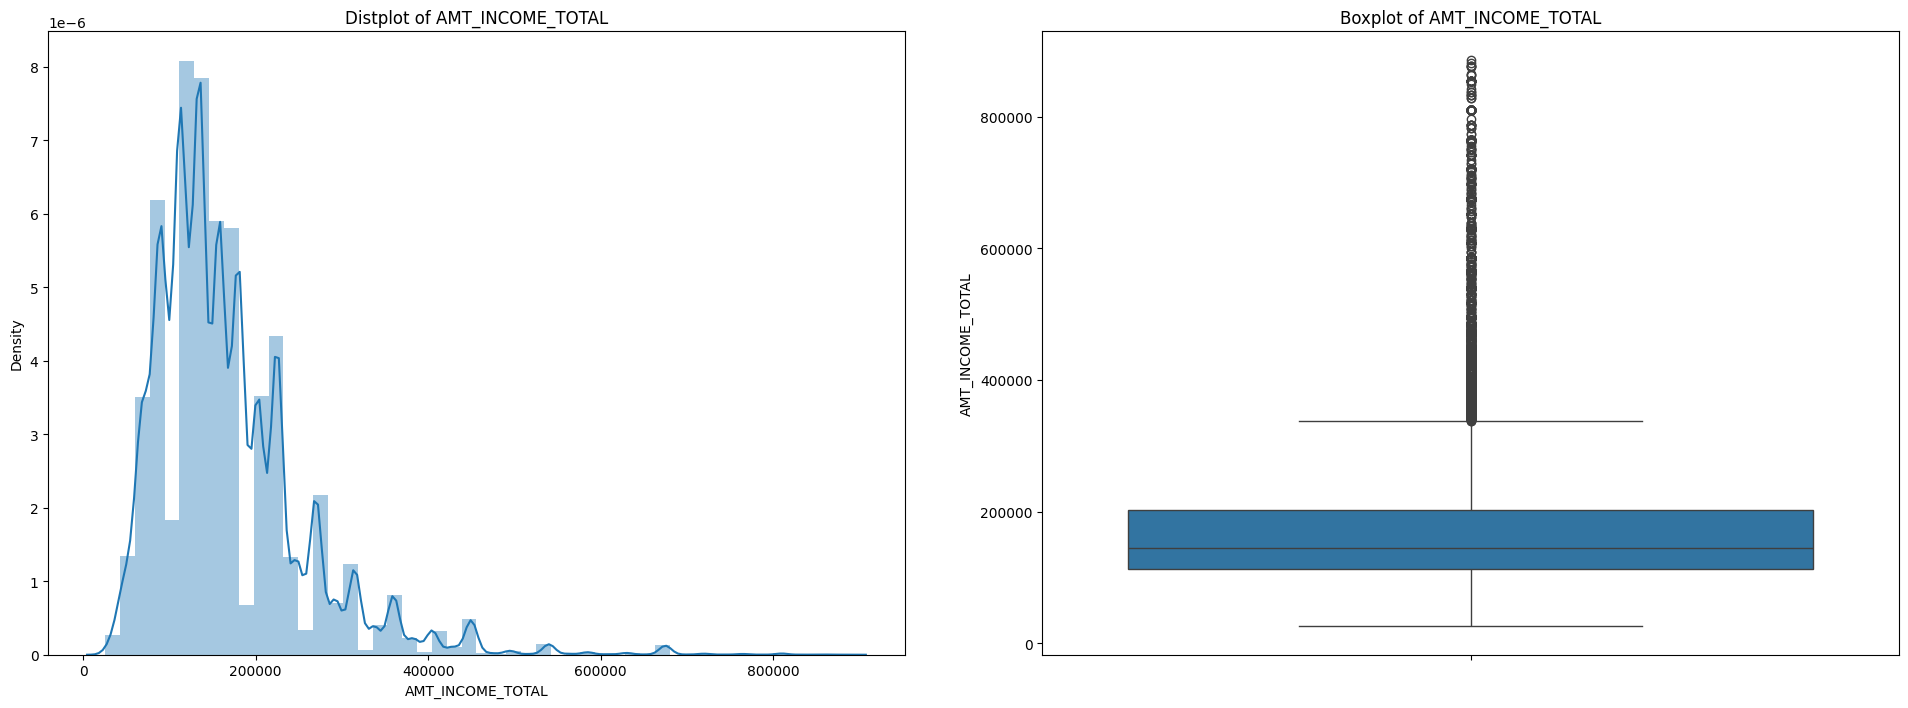

In [ ]:
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    plt.subplots(1,2 ,figsize = (20,8))

    plt.subplot(121)
    sns.distplot(df[df['AMT_INCOME_TOTAL'] < 900000].AMT_INCOME_TOTAL)
    pltname = 'Distplot of ' + 'AMT_INCOME_TOTAL'
    plt.title(pltname)

    plt.subplot(122)
    sns.boxplot(df[df['AMT_INCOME_TOTAL'] < 900000].AMT_INCOME_TOTAL)
    pltname = 'Boxplot of ' + 'AMT_INCOME_TOTAL'
    plt.title(pltname)

    plt.tight_layout(pad = 4)
    plt.show()

Тепер ми можемо чітко побачити розподіл і діапазон даних на обох графіках.
 - Це означає, що значення понад 900 тис. грн доходу явно є викидами

In [ ]:
df[df['AMT_INCOME_TOTAL'] > 900000].head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER  FLAG_OWN_CAR  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE NAME_TYPE_SUITE      NAME_INCOME_TYPE            NAME_EDUCATION_TYPE NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  LIVE_REGION_NOT_WORK_REGION  REG_CITY_NOT_LIVE_CITY  REG_CITY_NOT_WORK_CITY  LIVE_CITY_NOT_WORK_CITY       ORGANIZATION_TYPE  EXT_SOURCE_2  EXT_SOURCE_3  OBS_30_CNT_SOCIAL_CIRCLE  DEF_30_CNT_SOCIAL_CIRCLE  OBS_60_CNT_SOCIAL_CIRCLE  DEF_60_CNT_SOCIAL_CIRCLE  DAYS_LAST_PHONE_CHANGE  FLAG_DOCUMENT_2  FLAG_DOCUMENT_3  FLAG_DOCUMENT_4  FLAG_DOCUMENT_5  FLAG_DOCUMENT_6  FLAG_DOCUMENT_7  FLAG_DOCUMENT_8  FLAG_DOCUMENT_9  FLAG_DOCUMENT_10  FLAG_DOCUMENT_11  FLAG_DOCUMENT_12  FLAG_DOCUMENT_13  FLAG_DOCUMENT_14  FLAG_DOCUMENT_15  FLAG_DOCUMENT_16  FLAG_DOCUMENT_17  FLAG_DOCUMENT_18  FLAG_DOCUMENT_19  FLAG_DOCUMENT_20  FLAG_DOCUMENT_21  AMT_REQ_CREDIT_BUREAU_HOUR  AMT_REQ_CREDIT_BUREAU_DAY  AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  DEF_30_CNT_SOCIAL_CIRCLE_imputed  EXT_SOURCE_2_imputed  OBS_60_CNT_SOCIAL_CIRCLE_imputed  DEF_60_CNT_SOCIAL_CIRCLE_imputed  AMT_GOODS_PRICE_imputed  CODE_GENDER_CHANGED  YEARS_BIRTH  YEARS_EMPLOYED  YEARS_REGISTRATION  YEARS_ID_PUBLISH  YEARS_LAST_PHONE_CHANGE
1504     101769       0    Revolving loans           M             1                1             0        1080000.00   180000.00      9000.00        180000.00   Unaccompanied  Commercial associate               Higher education            Married  House / apartment                        0.07       13633           5536               3.00             4971           1               1                0                 1           0           0         Unknown             2.00                     1                            1                     FRIDAY                       13                           0                           1                            1                       0                       0                        0  Business Entity Type 3          0.65          0.46                      0.00                      0.00                      0.00                      0.00                  491.00                0                0                0                0                0                0                0                0                 0                 0                 0                 0                 0                 0                 0                 0                 0                 0                 0                 0                        0.00                       0.00                        0.00                       0.00                       0.00                        0.00                                 0                     0                                 0                                 0                        0                    0           37              15                   0                14                     1.00
1723     102015       0         Cash loans           F             0                1             0        1935000.00   269550.00     10534.50        225000.00   Unaccompanied             Pensioner  Secondary / secondary special            Married  House / apartment                        0.01       18636         365243            3401.00             2168           1               0                0                 1           1           0         Unknown             2.00                     2                            2                     MONDAY                       11                           0 

**Спостереження**
- Дивлячись на дані, ми бачимо, що дохід понад 900 тис. грн (99,9% значення) є викидом
- Як діаграма розподілу, так і діаграма розмаху чітко показують нам ту саму тенденцію

**Висновок**
- Апліканти з доходом понад 900 тис. грн (99,9% значення) є викидами

# ДЗ 3. Аналіз викидів

Подібно до прикладу, проаналізуйте на викиди колонок
- `CNT_FAM_MEMBERS`
- `AMT_ANNUITY`

Зазначте, які значення в них можна вважати викидами.

In [ ]:
outliers_column = ['CNT_FAM_MEMBERS', 'AMT_ANNUITY']
statistics_df_Outliers = calculate_statistics(df, outliers_column)
statistics_df_Outliers

Column     Mean   Median    Mode  Missing Count  Missing Percentage  25th Percentile  50th Percentile (Median)  75th Percentile  99th Percentile   Maximum
0  CNT_FAM_MEMBERS     2.15     2.00    2.00              2                0.00             2.00                      2.00             3.00             5.00     20.00
1      AMT_ANNUITY 27108.57 24903.00 9000.00             12                0.00         16524.00                  24903.00         34596.00         70006.50 258025.50

In [ ]:
# Function to calculate and plot outliers
def analyze_outliers(df, column):
    with warnings.catch_warnings():
        warnings.simplefilter("ignore")
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        print(f"Outliers for {column} are values below {lower_bound} and above {upper_bound}.")

        plt.figure(figsize=(16, 6))
        plt.subplot(121)
        sns.distplot(df[column].dropna(), color='blue')
        plt.title(f'Distribution of {column}')

        plt.subplot(122)
        sns.boxplot(x=df[column])
        plt.title(f'Boxplot of {column}')
        plt.show()

Outliers for CNT_FAM_MEMBERS are values below 0.5 and above 4.5.


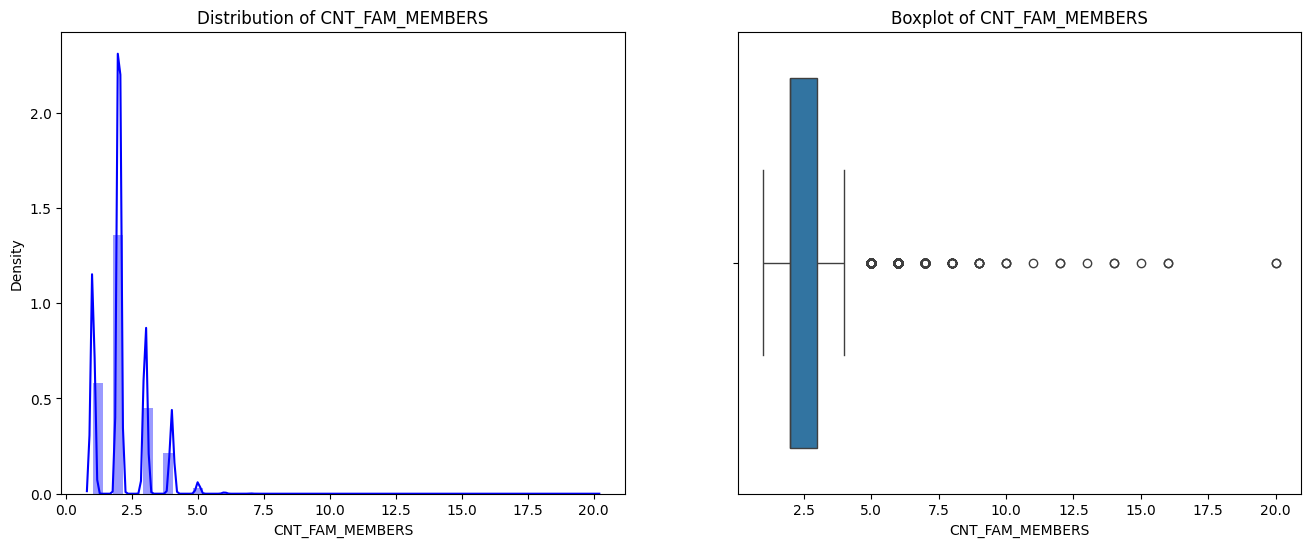

In [ ]:
# Analyze CNT_FAM_MEMBERS
analyze_outliers(df, 'CNT_FAM_MEMBERS')

Outliers for AMT_ANNUITY are values below -10584.0 and above 61704.0.


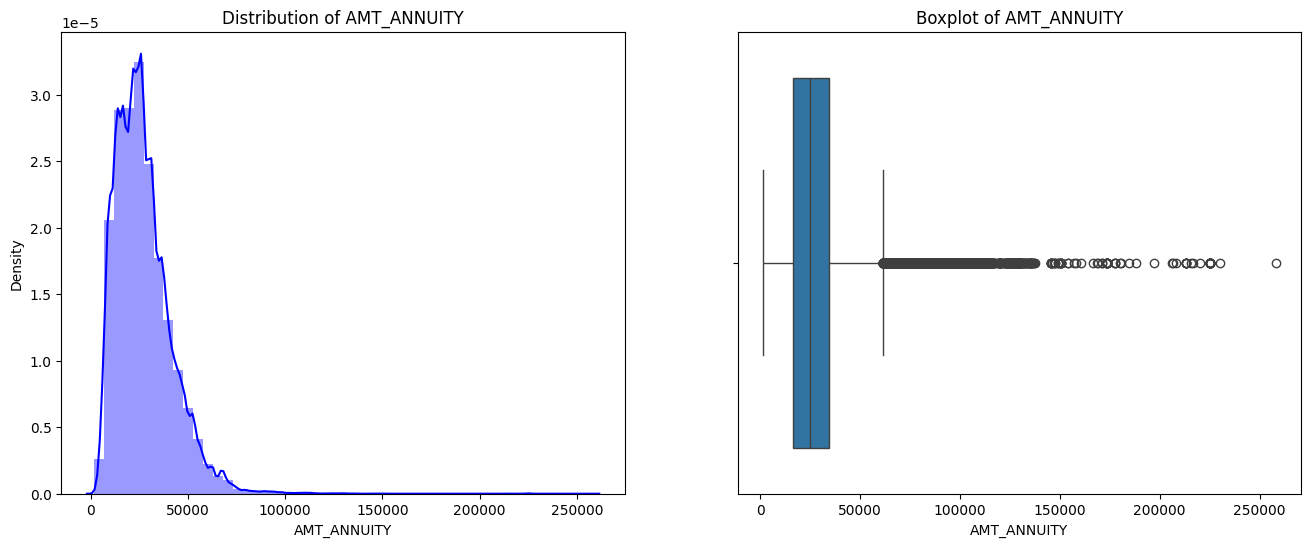

In [ ]:
# Analyze AMT_ANNUITY
analyze_outliers(df, 'AMT_ANNUITY')

`CNT_FAM_MEMBERS`
- розподіл кількості членів сім'ї сильно сконцентрований навколо менших розмірів сімей з більшістю значень між 2 та 3, що є типовими розмірами сім'ї.
- викиди в цьому стовпці визначені як значення нижче 0.5 та вище 4.5. Це вказує на те, що сім'ї розміром більше 4,5 членів(~5) є відносно рідкісними в наборі даних.
- максимальне значення в наборі даних - 20, що значно вище за типові розміри сім'ї і може розглядатися як екстремальний викид.
- медіана та мода обидві рівні 2, що вказує на сильну тенденцію до типових родин.
- 75-й процентиль дорівнює 3, що говорить про те, що 75% даних мають 3 або менше членів сім'ї.
- Проблема з пропущеними даними у цьому стовпці є незначною 2 значенния(0.00%), які можна видалити.

`AMT_ANNUITY`
- суми ануїтетів показують правосторонній розподіл, де більшість заявників мають нижчі платежі за ануїтетом, але є значні викиди з дуже високими ануїтетами.
- викиди для цього стовпця визначені як значення нижче -10584.0 та вище 61704.0.Негативна нижня межа не реалістична з практичної точки зору, оскільки платежі за ануїтетом не можуть бути негативними; це передбачає наявність вкрай низьких значень або артефакт методу розрахунку викидів.
- Боксплот показує безліч викидів вище за верхній рівень, що вказує на значну кількість позик з незвичайно високими платежами по ануїтету.
- медіанний платіж ануїтету становить 24903.0, тоді як середнє значення вище — 27108.57, що знову підтверджує праву асиметрію даних.
- максимальний платіж ануїтету є екстремальним значенням у 258025.50, що значно вище за 99-й перцентиль (70006.50), що підкреслює наявність екстремальних випадків у платежах ануїтету.
- Проблема з пропущеними даними у цьому стовпці є незначною 12 значенния(0.00%), які можна видалити.




Закальний висновок
1. У `CNT_FAM_MEMBERS` дані свідчать про типовий розмір сім'ї у 2-3 члени, з рідкісними великими сім'ями, що вважаються викидами. В цілом ми повинні фокусуватися на типових менших сім'ях, але можемо також враховувати особливі випадки для неординарно великих сімей.
2. `AMT_ANNUITY` існує широкий діапазон ануїтетних платежів, з значною кількістю високих викидів, які можуть потребувати подальшого аналізу для розуміння, чи відповідають вони специфічним типам позик або особливим демографічним групам. Значна розбіжність між медіаною та екстремальними максимальними значеннями свідчить про те, що умови позик сильно варіюються, що може відображати різноманітність фінансових продуктів або профілів позичальників.
3. На базі цього аналізу може бути порекомендований подальший аналіз, наприклад, сегментацію клієнтської бази або коригування умов позик залежно від здатності підтримувати високі ануїтетні платежі. Крім того, подальше дослідження викидів, особливо в `AMT_ANNUITY`, може виявити помилки введення даних або виняткові випадки, які вимагають особливого підходу.

# Розбиття на біни безперервних колонок для аналізу

### Категоризація стовпця `AMT_GOODS_PRICE

In [ ]:
df['AMT_GOODS_PRICE'].value_counts().sort_values(ascending = False).head()

AMT_GOODS_PRICE
450000.00    26300
225000.00    25282
675000.00    24962
900000.00    15416
270000.00    11428
Name: count, dtype: int64

In [ ]:
(df['AMT_GOODS_PRICE'].value_counts(normalize = True).sort_values(ascending = False) * 100).head()

AMT_GOODS_PRICE
450000.00   8.55
225000.00   8.22
675000.00   8.12
900000.00   5.01
270000.00   3.72
Name: proportion, dtype: float64

Подивимось статистичний звіт для `AMT_GOODS_PRICE

In [ ]:
df['AMT_GOODS_PRICE'].describe(percentiles = [0.25,0.75,0.99,0.9999])

count     307511.00
mean      538316.29
std       369288.98
min        40500.00
25%       238500.00
50%       450000.00
75%       679500.00
99%      1800000.00
99.99%   2933964.00
max      4050000.00
Name: AMT_GOODS_PRICE, dtype: float64

Розподілимо значення в `AMT_GOODS_PRICE` на 5 бінів і створимо новий стовпець `AMT_GOODS_PRICE_CATEGORY`.

In [ ]:
df['AMT_GOODS_PRICE_CATEGORY'] = pd.cut(df['AMT_GOODS_PRICE'],
                                        bins = 5, labels = ['very low', 'low', 'medium', 'high', 'very high'])

Перевірка заповнення значень згідно з очікуванням

In [ ]:
df['AMT_GOODS_PRICE_CATEGORY'].value_counts()

AMT_GOODS_PRICE_CATEGORY
very low     247251
low           56087
medium         4108
high             47
very high        18
Name: count, dtype: int64

### Категоризація стовпця `YEARS_BIRTH`

Ми будемо класифікувати `YEARS_BIRTH` замість `DAYS_BIRTH`, оскільки роки легше інтерпретувати, ніж дні

In [ ]:
df['YEARS_BIRTH'].value_counts().sort_values(ascending = False).head()

YEARS_BIRTH
39    9023
38    8793
37    8727
40    8602
41    8495
Name: count, dtype: int64

In [ ]:
(df['YEARS_BIRTH'].value_counts(normalize = True).sort_values(ascending = False) * 100).head()

YEARS_BIRTH
39   2.93
38   2.86
37   2.84
40   2.80
41   2.76
Name: proportion, dtype: float64

Подивимось статистичний звіт для  `YEARS_BIRTH`

In [ ]:
df['YEARS_BIRTH'].describe(percentiles = [0.25,0.75,0.99,0.9999])

count    307511.00
mean         43.94
std          11.96
min          21.00
25%          34.00
50%          43.00
75%          54.00
99%          67.00
99.99%       69.00
max          69.00
Name: YEARS_BIRTH, dtype: float64

Категоризуймо значення з `YEARS_BIRTH` у новий стовпець `YEARS_BIRTH_CATEGORY`.

In [ ]:
df['YEARS_BIRTH_CATEGORY'] = df['YEARS_BIRTH'].apply(age_cat)

Перевірка заповнення значень згідно з очікуванням

In [ ]:
df['YEARS_BIRTH_CATEGORY'].value_counts().sort_values(ascending = False)

YEARS_BIRTH_CATEGORY
30-40    82770
40-50    75509
50-60    67955
20-30    48869
60-70    32408
Name: count, dtype: int64

### Категоризація стовпця `YEARS_REGISTRATION`

Ми будемо класифікувати `YEARS_REGISTRATION` замість `DAYS_REGISTRATION`, оскільки роки легше інтерпретувати, ніж дні

In [ ]:
df['YEARS_REGISTRATION'].value_counts().sort_values(ascending = False).head()

YEARS_REGISTRATION
1     15661
2     15564
3     13894
13    12866
12    12697
Name: count, dtype: int64

In [ ]:
(df['YEARS_REGISTRATION'].value_counts(normalize = True).sort_values(ascending = False) * 100).head()

YEARS_REGISTRATION
1    5.09
2    5.06
3    4.52
13   4.18
12   4.13
Name: proportion, dtype: float64

Подивимось статистичний звіт для `YEARS_REGISTRATION`

In [ ]:
df['YEARS_REGISTRATION'].describe(percentiles = [0.25,0.75,0.99,0.9999])

count    307511.00
mean         13.66
std           9.66
min           0.00
25%           6.00
50%          12.00
75%          20.00
99%          38.00
99.99%       54.25
max          68.00
Name: YEARS_REGISTRATION, dtype: float64

Категоризуймо значення з `YEARS_REGISTRATION` в новий стовпець `YEARS_REGISTRATION_CATEGORY`.

In [ ]:
df['YEARS_REGISTRATION_CATEGORY'] = df['YEARS_REGISTRATION'].apply(age_cat)

Перевірка заповнення значень згідно з очікуванням

In [ ]:
df['YEARS_REGISTRATION_CATEGORY'].value_counts().sort_values(ascending = False)

YEARS_REGISTRATION_CATEGORY
0-20     230697
20-30     59288
30-40     16051
40-50      1406
50-60        60
60-70         9
Name: count, dtype: int64

# Зберігання оновлених даних зі стисненням

In [ ]:
filename = "drive/MyDrive/Colab Notebooks/data/application_data_processed"
compression_options = dict(method='zip', archive_name=f'{filename}.csv')
df.to_csv(f'{filename}.zip', compression=compression_options, index=False)

In [ ]:
# якщо Вам треба буде зчитати оновлені дані - замініть шлях на свій і можна зчитати їх тут
df_new = pd.read_csv('drive/MyDrive/Colab Notebooks/data/application_data_processed.zip')
df_new.head(5)

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER  FLAG_OWN_CAR  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE            NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  LIVE_REGION_NOT_WORK_REGION  REG_CITY_NOT_LIVE_CITY  REG_CITY_NOT_WORK_CITY  LIVE_CITY_NOT_WORK_CITY       ORGANIZATION_TYPE  EXT_SOURCE_2  EXT_SOURCE_3  OBS_30_CNT_SOCIAL_CIRCLE  DEF_30_CNT_SOCIAL_CIRCLE  OBS_60_CNT_SOCIAL_CIRCLE  DEF_60_CNT_SOCIAL_CIRCLE  DAYS_LAST_PHONE_CHANGE  FLAG_DOCUMENT_2  FLAG_DOCUMENT_3  FLAG_DOCUMENT_4  FLAG_DOCUMENT_5  FLAG_DOCUMENT_6  FLAG_DOCUMENT_7  FLAG_DOCUMENT_8  FLAG_DOCUMENT_9  FLAG_DOCUMENT_10  FLAG_DOCUMENT_11  FLAG_DOCUMENT_12  FLAG_DOCUMENT_13  FLAG_DOCUMENT_14  FLAG_DOCUMENT_15  FLAG_DOCUMENT_16  FLAG_DOCUMENT_17  FLAG_DOCUMENT_18  FLAG_DOCUMENT_19  FLAG_DOCUMENT_20  FLAG_DOCUMENT_21  AMT_REQ_CREDIT_BUREAU_HOUR  AMT_REQ_CREDIT_BUREAU_DAY  AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  DEF_30_CNT_SOCIAL_CIRCLE_imputed  EXT_SOURCE_2_imputed  OBS_60_CNT_SOCIAL_CIRCLE_imputed  DEF_60_CNT_SOCIAL_CIRCLE_imputed  AMT_GOODS_PRICE_imputed  CODE_GENDER_CHANGED  YEARS_BIRTH  YEARS_EMPLOYED  YEARS_REGISTRATION  YEARS_ID_PUBLISH  YEARS_LAST_PHONE_CHANGE AMT_GOODS_PRICE_CATEGORY YEARS_BIRTH_CATEGORY YEARS_REGISTRATION_CATEGORY
0      100002       1         Cash loans           M             0                1             0         202500.00   406597.50     24700.50        351000.00   Unaccompanied          Working  Secondary / secondary special  Single / not married  House / apartment                        0.02        9461            637            3648.00             2120           1               1                0                 1           1           0        Laborers             1.00                     2                            2                  WEDNESDAY                       10                           0                           0                            0                       0                       0                        0  Business Entity Type 3          0.26          0.14                      2.00                      2.00                      2.00                      2.00                 1134.00                0                1                0                0                0                0                0                0                 0                 0                 0                 0                 0                 0                 0                 0                 0                 0                 0                 0                        0.00                       0.00                        0.00                       0.00                       0.00                        1.00                                 0                     0                                 0                                 0                        0                    0           26               2                  10                 6                     3.00                 very low                20-30                        0-20
1      100003       0         Cash loans           F             0                0             0         270000.00  1293502.50     35698.50       1129500.00          Family    State servant               Higher education               Married  House / apartment                        0.00       16765           1188            1186.00              291           1               1                0                 1           1           0      Core staff           

# Перевірка дисбалансу для цільового стовпця `TARGET`

### Аналіз стовпця `TARGET`

In [ ]:
df['TARGET'].value_counts().sort_values(ascending = False)

TARGET
0    282686
1     24825
Name: count, dtype: int64

In [ ]:
df['TARGET'].value_counts(normalize = True).sort_values(ascending = False) * 100

TARGET
0   91.93
1    8.07
Name: proportion, dtype: float64

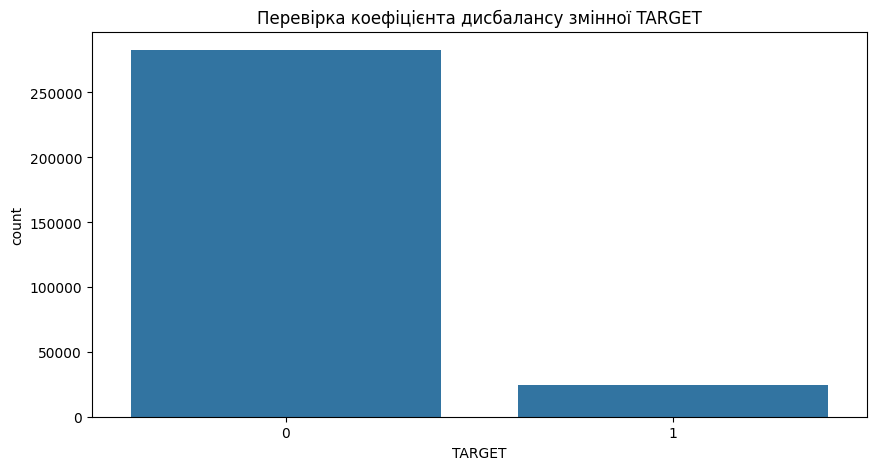

In [ ]:
plt.figure(figsize = (10,5))
sns.countplot(x = df['TARGET'], data = df)
plt.title('Перевірка коефіцієнта дисбалансу змінної TARGET')
plt.show()

**Спостереження**

- Ми маємо дисбаланс у змінній `TARGET` на основі % спостережень
 - Значення `TARGET` 1 - це клієнт, який має труднощі з оплатою (прострочення платежу більше ніж на X днів принаймні за одним з перших Y платежів за кредитом). Це лише 8,07% даних
 - Значення `TARGET` 0 - всі інші випадки, окрім 1. Це 91,93% даних

# Розподіл даних на основі `TARGET`

### Створіть новий фрейм даних зі значенням `TARGET` 1
- Значення `TARGET` 1 представляє клієнта з платіжними труднощами (він/вона прострочив платіж більш ніж на X днів принаймні по одному з перших Y платежів за кредитом). Це лише 8,07% даних

In [ ]:
df1 = df[df['TARGET'] == 1]

In [ ]:
df1.TARGET.value_counts()

TARGET
1    24825
Name: count, dtype: int64

### Створити новий фрейм даних зі значенням `TARGET` 0
- Значення `TARGET` 0 представляє всі інші випадки, крім 1. Це 91.93% даних

In [ ]:
df0 = df[df['TARGET'] == 0]

In [ ]:
df0.TARGET.value_counts()

TARGET
0    282686
Name: count, dtype: int64

# Одномірний аналіз категоріальних змінних

### Аналіз стовпця `NAME_CONTRACT_TYPE`

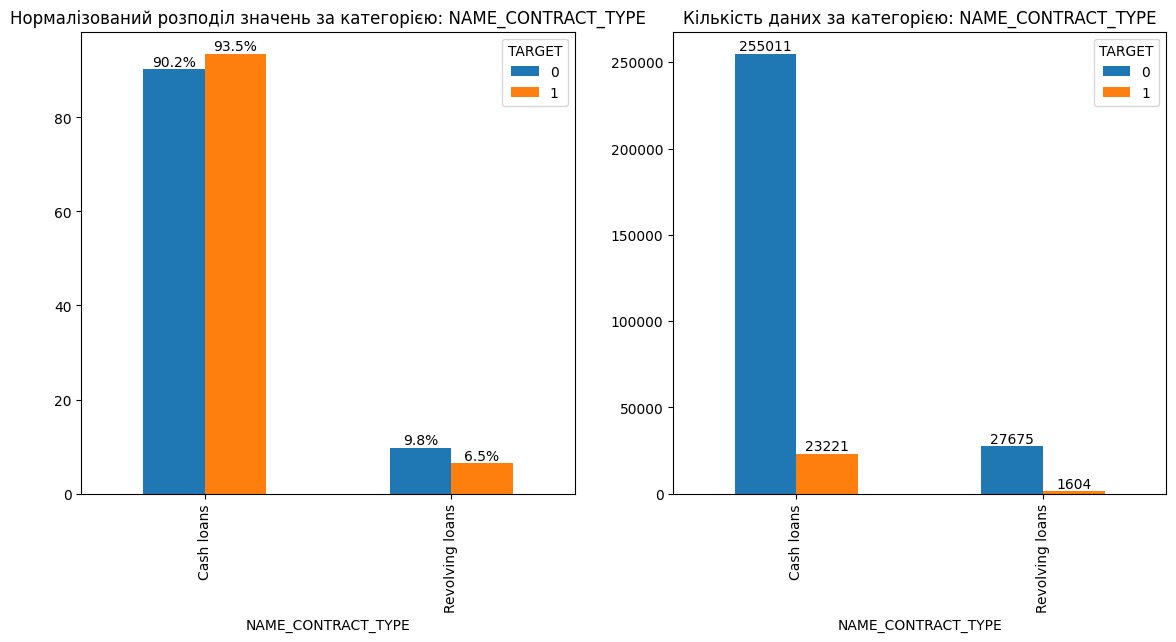

In [ ]:
uni_cat_target_compare(df, 'NAME_CONTRACT_TYPE')

**Спостереження**

- Дивлячись на гістограми, ми не бачимо суттєвих відмінностей у `NAME_CONTRACT_TYPE` між клієнтами, які мають труднощі з оплатою, та клієнтами, які платять вчасно

**Висновок**
- Колонка `NAME_CONTRACT_TYPE` не надає жодних переконливих доказів на користь клієнтів, які мають труднощі з оплатою АБО вчасно сплачують

# ДЗ 4. Одновимірний аналіз категоріальної колонки

Проведіть подібний аналіз для колонок
- CODE_GENDER
- FLAG_OWN_CAR
- NAME_INCOME_TYPE

Опціонально
- NAME_EDUCATION_TYPE
- NAME_FAMILY_STATUS


Чи є вплив цих змінних на цільову та який саме?

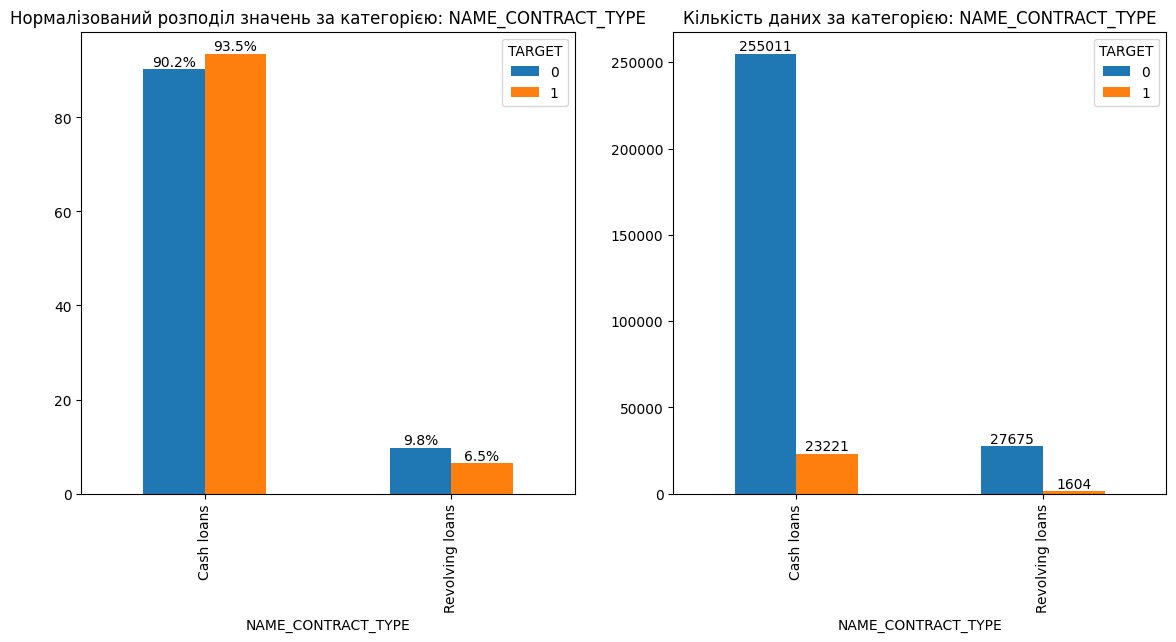

In [ ]:
uni_cat_target_compare(df, 'NAME_CONTRACT_TYPE')

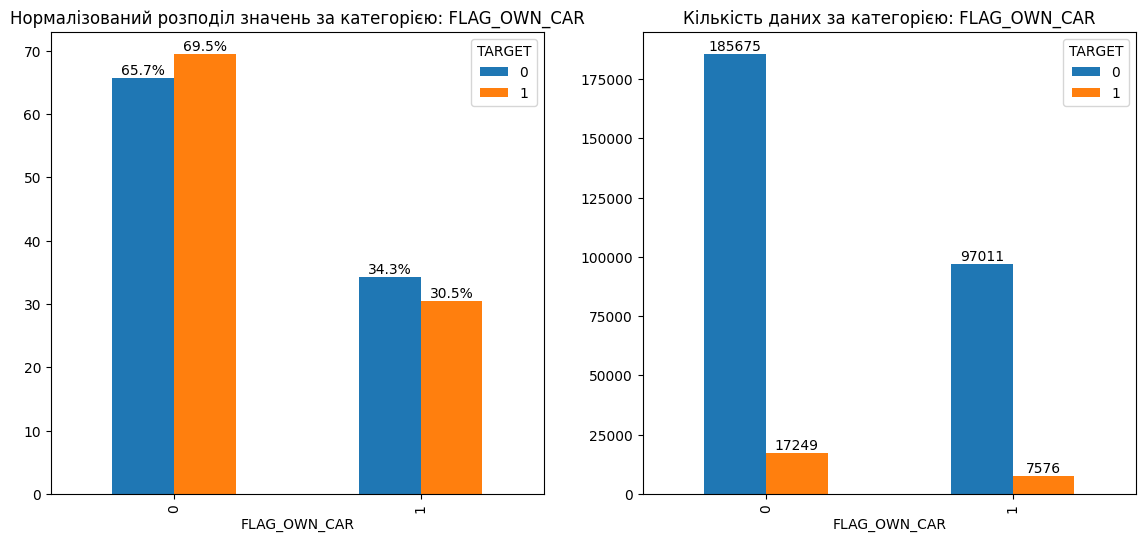

In [ ]:
uni_cat_target_compare(df, 'FLAG_OWN_CAR')

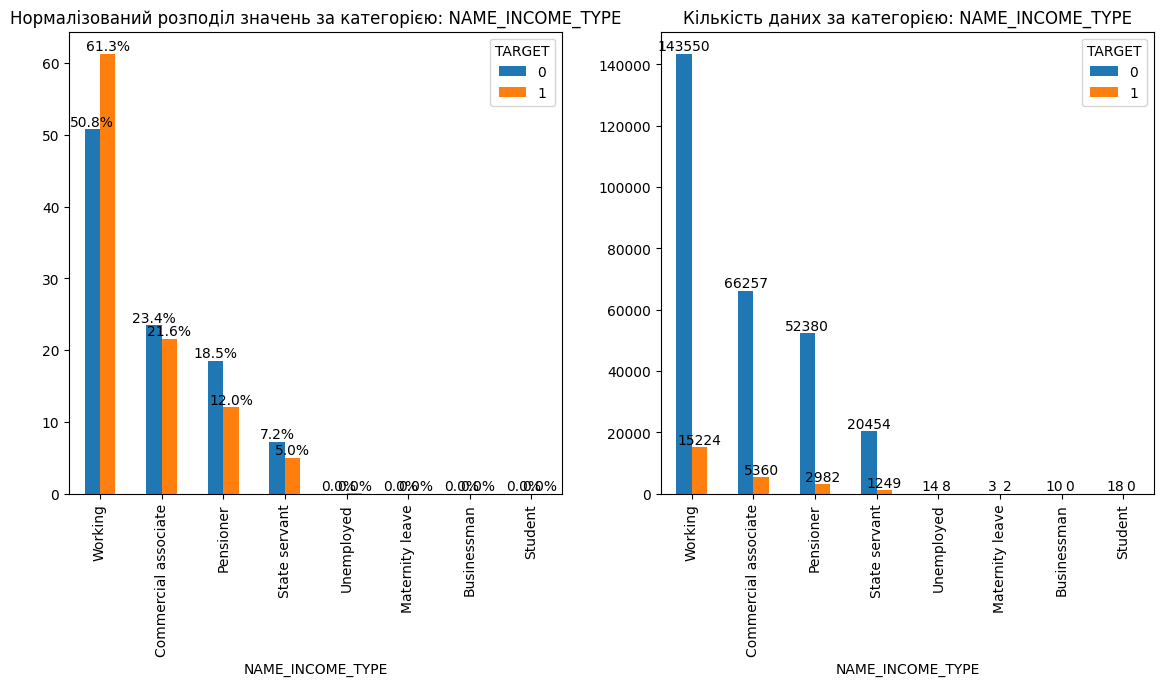

In [ ]:
uni_cat_target_compare(df, 'NAME_INCOME_TYPE')

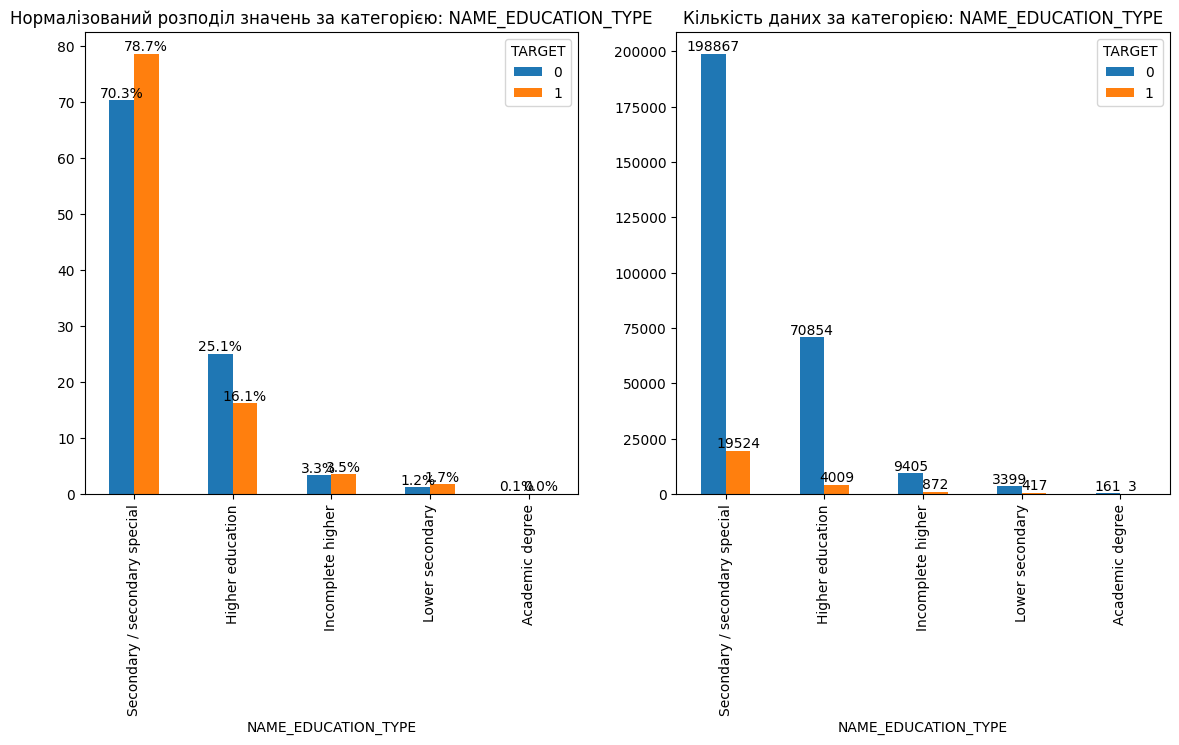

In [ ]:
uni_cat_target_compare(df, 'NAME_EDUCATION_TYPE')

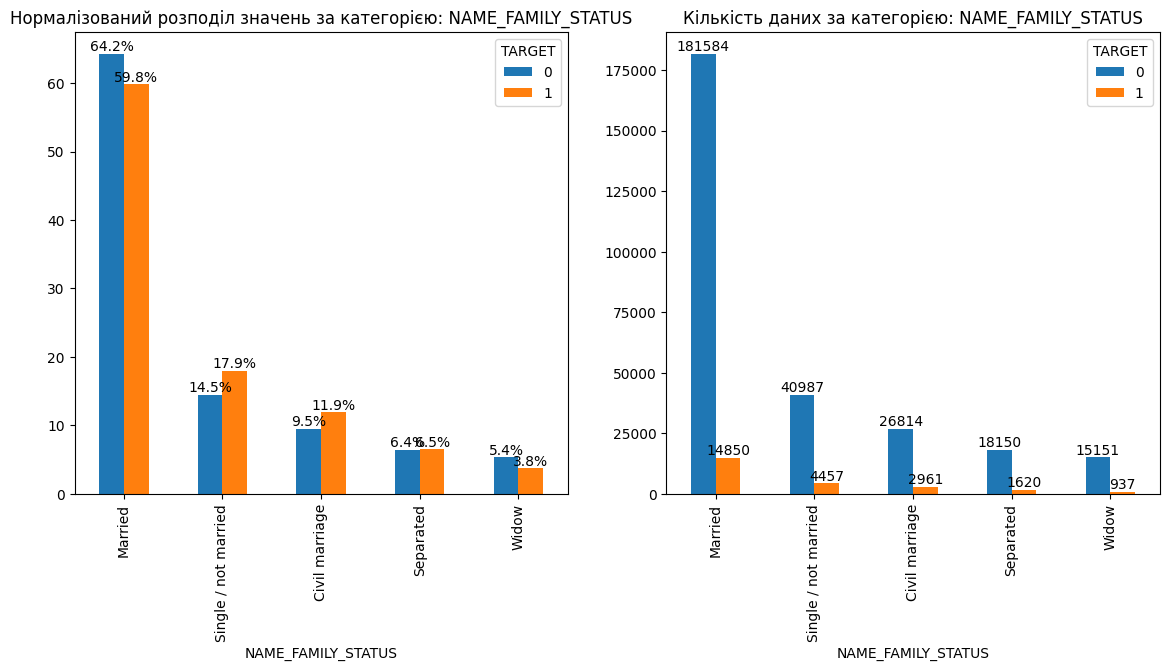

In [ ]:
uni_cat_target_compare(df, 'NAME_FAMILY_STATUS')

Висновки
1.CODE_GENDER (Стать)
- чоловіки (M) мають вищу частку прострочення платежу порівняно з жінками (F), 42.9% проти 33.4% відповідно, що свідчить про потенційно вищий ризик не сплатити вчасно серед чоловіків.
- незважаючи на певну відмінність, стать клієнта не надає переконливих доказів щодо їх здатності виконувати кредитні зобов'язання, оскільки обидві групи продемонстрували здатність до своєчасної оплати.
2.FLAG_OWN_CAR (Наявність автомобіля)
- власники автомобілів (Y) показують нижчу частку дефолтів (30.5%) порівняно з тими, хто не володіє автомобілем (34.3%), що може свідчити про кращу фінансову стабільність серед власників автомобілів.
- наявність автомобіля може бути пов'язана з кращою фінансовою стабільністю, але не є вирішальним фактором для прогнозування платоспроможності.
3. NAME_INCOME_TYPE (Тип доходу)
- відсоток дефолтів серед пенсіонерів (Pensioner) знижений (21.6%) у порівнянні з особами, які працюють (Working) – 23.4%, що може вказувати на стабільніший дохід або менший рівень фінансових ризиків серед пенсіонерів.
- найбільші ризики дефолтів спостерігаються серед категорій, які не працюють, проте кількість даних у цих категоріях може бути недостатньою для точних висновків.
4. NAME_EDUCATION_TYPE (Тип освіти)
- найнижчий відсоток дефолтів спостерігається серед осіб з вищою освітою, що може свідчити про кореляцію між рівнем освіти та фінансовою поведінкою.
- рівень освіти може впливати на фінансову поведінку, але не гарантує абсолютної фінансової надійності, оскільки дефолти відбуваються у всіх освітніх категоріях.
5. NAME_FAMILY_STATUS (Сімейний стан)
- особи, які одружені, мають нижчий відсоток дефолтів порівняно з іншими категоріями, що може свідчити про більшу фінансову стабільність у традиційно одружених пар.
- сімейний стан може впливати на фінансову стабільність, але, як і інші категорії, не може однозначно вказувати на відсутність або наявність фінансових труднощів.

 Хоча категоріальні змінні можуть вказувати на певні тенденції, вони не можуть однозначно визначити фінансову поведінку клієнта без урахування інших факторів.

# Кореляційний аналіз числових змінних

### Побудова кореляційної матриці для випадків із платіжними труднощами

In [ ]:
df1.select_dtypes(include='number').shape

(24825, 73)

Є 67 числових стовпчиків. Створимо кореляційну матрицб `corr` для кращого перегляду результатів

In [ ]:
corr_df1 = df1.select_dtypes(include='number').corr()

In [ ]:
corr_df1.head()

TARGET  FLAG_OWN_CAR  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE  REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  HOUR_APPR_PROCESS_START  REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  LIVE_REGION_NOT_WORK_REGION  REG_CITY_NOT_LIVE_CITY  REG_CITY_NOT_WORK_CITY  LIVE_CITY_NOT_WORK_CITY  EXT_SOURCE_2  EXT_SOURCE_3  OBS_30_CNT_SOCIAL_CIRCLE  DEF_30_CNT_SOCIAL_CIRCLE  OBS_60_CNT_SOCIAL_CIRCLE  DEF_60_CNT_SOCIAL_CIRCLE  DAYS_LAST_PHONE_CHANGE  FLAG_DOCUMENT_2  FLAG_DOCUMENT_3  FLAG_DOCUMENT_4  FLAG_DOCUMENT_5  FLAG_DOCUMENT_6  FLAG_DOCUMENT_7  FLAG_DOCUMENT_8  FLAG_DOCUMENT_9  FLAG_DOCUMENT_10  FLAG_DOCUMENT_11  FLAG_DOCUMENT_12  FLAG_DOCUMENT_13  FLAG_DOCUMENT_14  FLAG_DOCUMENT_15  FLAG_DOCUMENT_16  FLAG_DOCUMENT_17  FLAG_DOCUMENT_18  FLAG_DOCUMENT_19  FLAG_DOCUMENT_20  FLAG_DOCUMENT_21  AMT_REQ_CREDIT_BUREAU_HOUR  AMT_REQ_CREDIT_BUREAU_DAY  AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  DEF_30_CNT_SOCIAL_CIRCLE_imputed  EXT_SOURCE_2_imputed  OBS_60_CNT_SOCIAL_CIRCLE_imputed  DEF_60_CNT_SOCIAL_CIRCLE_imputed  AMT_GOODS_PRICE_imputed  CODE_GENDER_CHANGED  YEARS_BIRTH  YEARS_EMPLOYED  YEARS_REGISTRATION  YEARS_ID_PUBLISH  YEARS_LAST_PHONE_CHANGE
TARGET               NaN           NaN              NaN           NaN               NaN         NaN          NaN              NaN                         NaN         NaN            NaN                NaN              NaN         NaN             NaN              NaN               NaN         NaN         NaN              NaN                   NaN                          NaN                      NaN                         NaN                         NaN                          NaN                     NaN                     NaN                      NaN           NaN           NaN                       NaN                       NaN                       NaN                       NaN                     NaN              NaN              NaN              NaN              NaN              NaN              NaN              NaN              NaN               NaN               NaN               NaN               NaN               NaN               NaN               NaN               NaN               NaN               NaN               NaN               NaN                         NaN                        NaN                         NaN                        NaN                        NaN                         NaN                               NaN                   NaN                               NaN                               NaN                      NaN                  NaN          NaN             NaN                 NaN               NaN                      NaN
FLAG_OWN_CAR         NaN          1.00             0.02          0.07              0.02        0.10         0.14             0.10                        0.03       -0.07          -0.11              -0.07             0.02         NaN            0.11            -0.02              0.00       -0.00        0.03             0.11                 -0.01                        -0.01                     0.01                       -0.00                        0.02                         0.02                   -0.01                    0.04                     0.06          0.04         -0.01                      0.01                     -0.01                      0.01                     -0.01                    0.05             0.01            -0.07              NaN            -0.01            -0.07             0.00             0.20            -0.00               NaN             -0.02               NaN              0.05              0.00              0.02              0.01              0.00             -0.00             -0.01

Перегляд повної кореляційної матриці

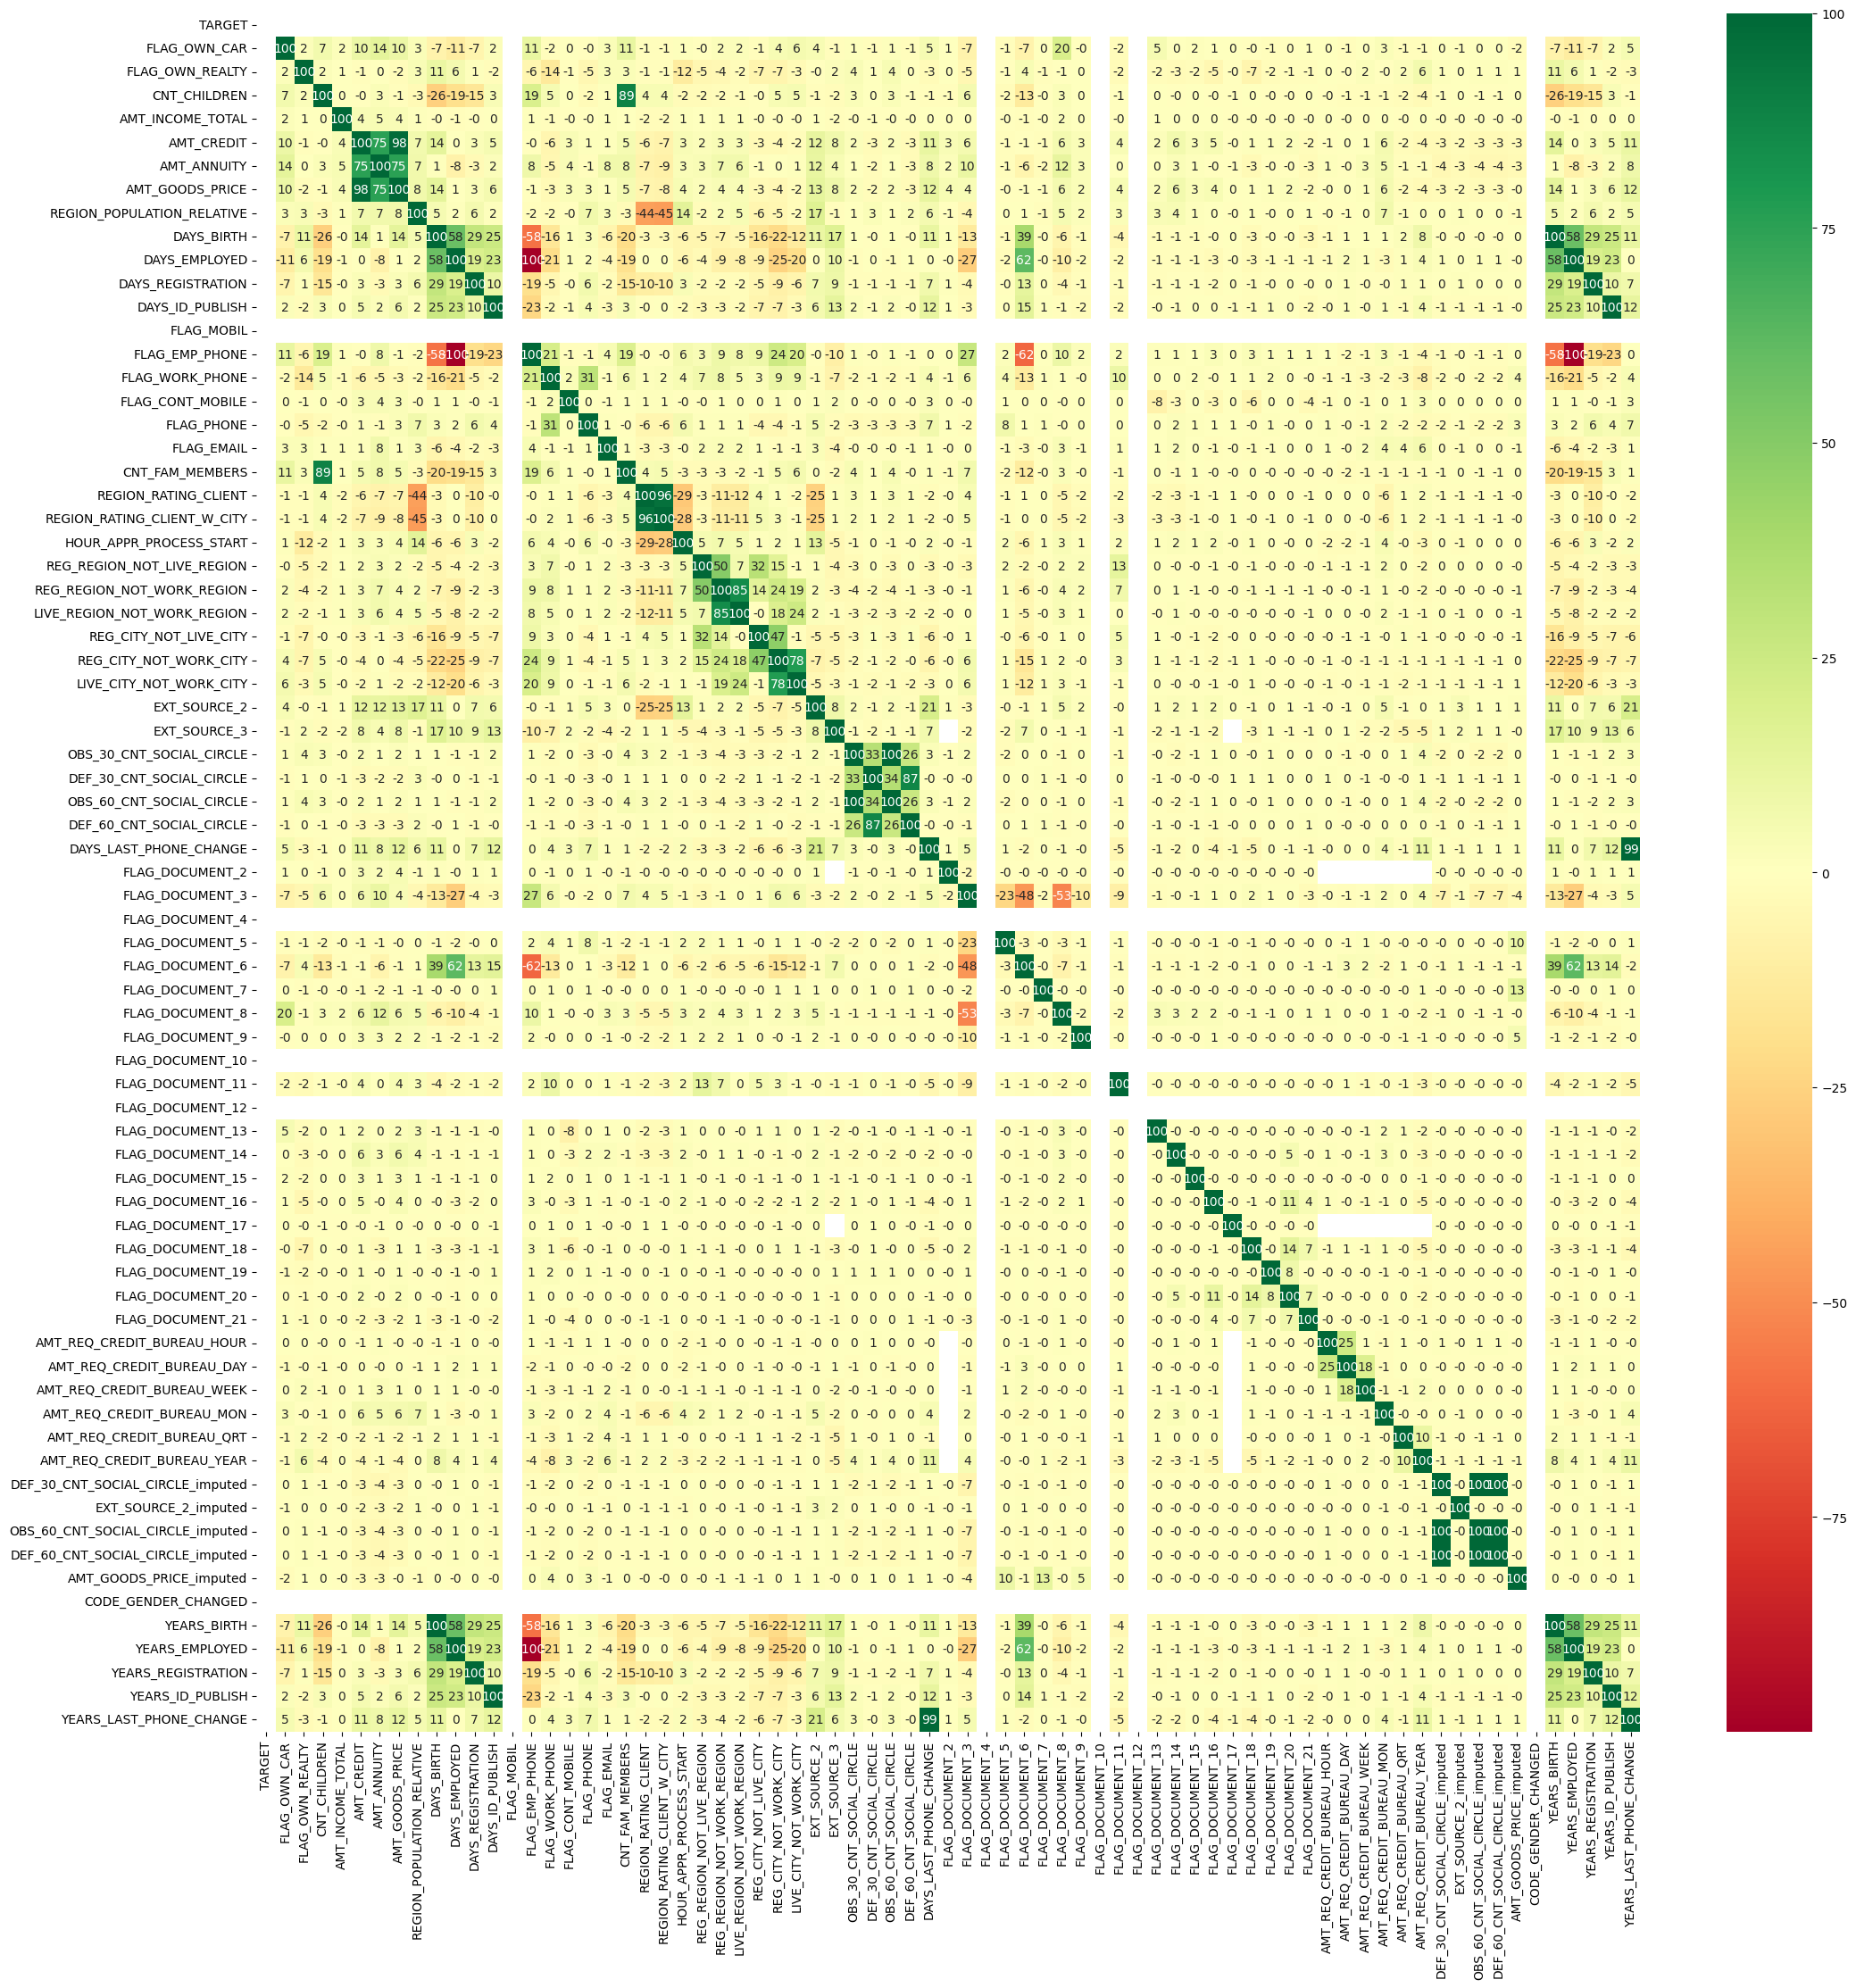

In [ ]:
plt.figure(figsize = (25,25))
sns.heatmap(data = corr_df1*100, annot = True, cmap = "RdYlGn", cbar = True, fmt='.0f')
plt.show()

Створимо теплову карту для перегляду кореляцій вище 80% і 99,99%

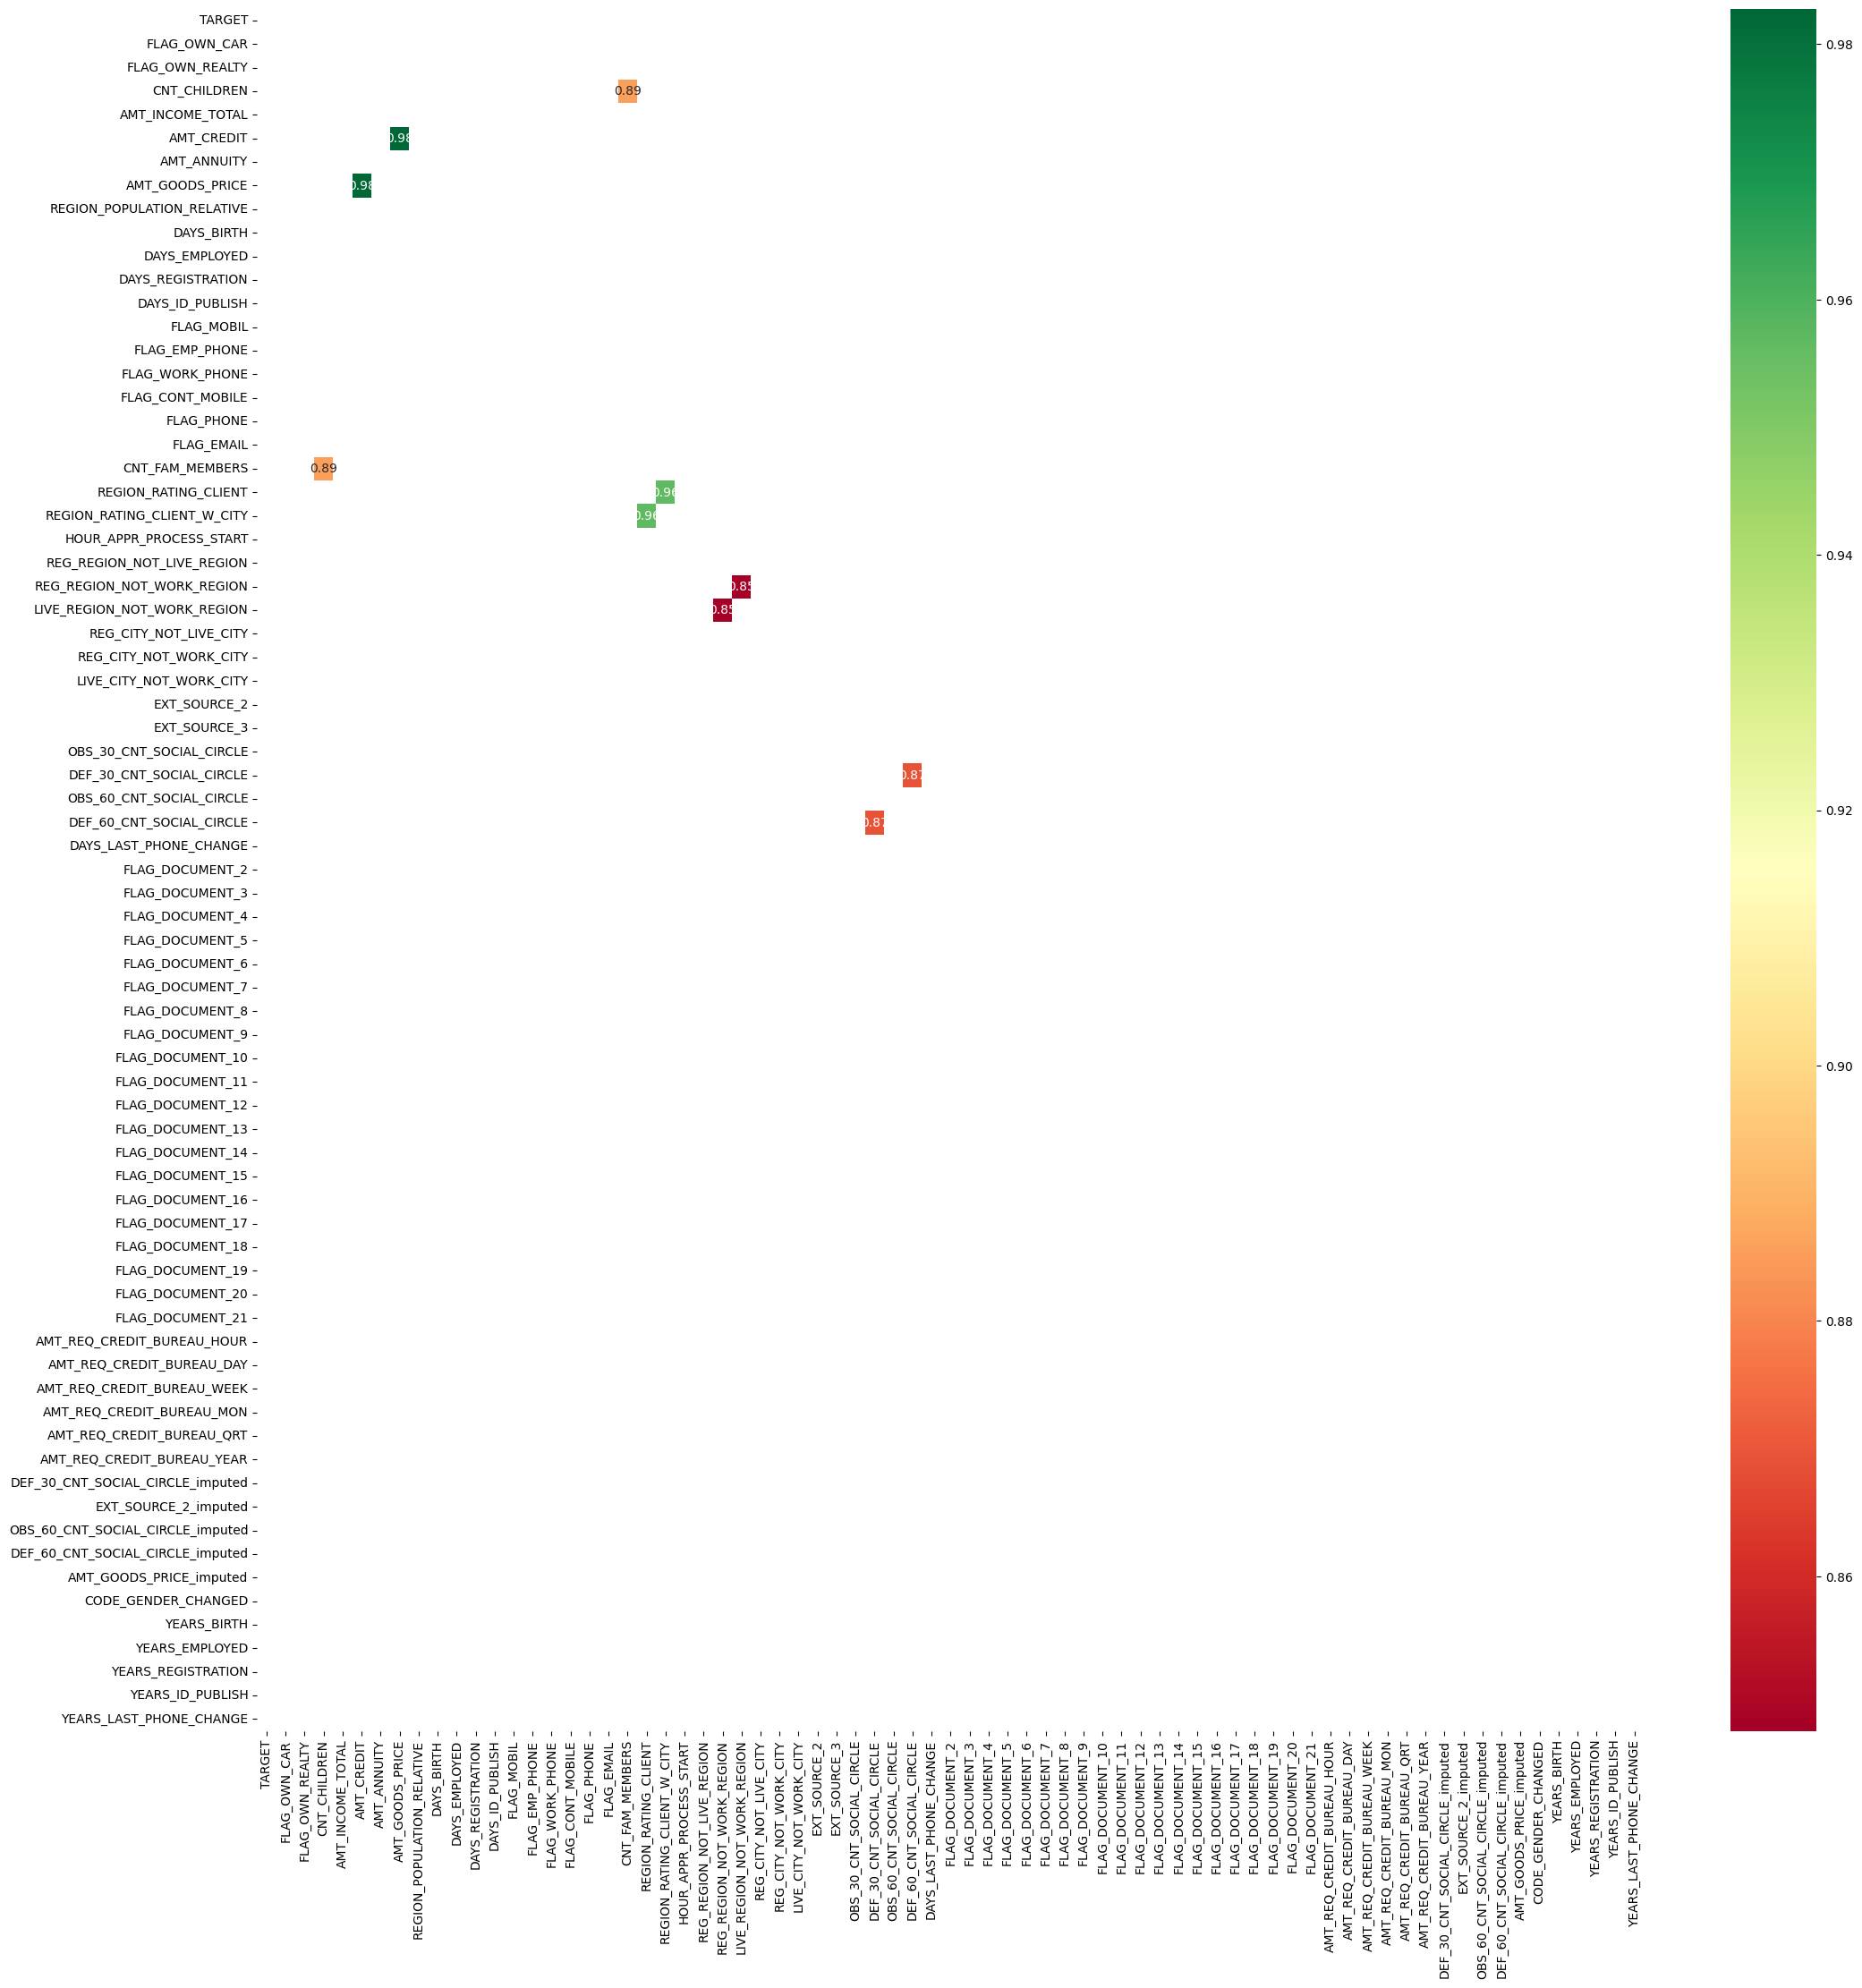

In [ ]:
plt.figure(figsize = (25,25))
sns.heatmap(data = corr_df1[(corr_df1 >= 0.8) & (corr_df1 < 0.99)], annot = True, cmap = "RdYlGn", cbar = True, fmt='.2f')
plt.show()

### Подивимось на 10 найкращих кореляцій для випадків із платіжними труднощами

In [ ]:
corr_df1[corr_df1 <= 0.99].unstack().sort_values(ascending = False).head(22)

AMT_CREDIT                   AMT_GOODS_PRICE               0.98
AMT_GOODS_PRICE              AMT_CREDIT                    0.98
REGION_RATING_CLIENT_W_CITY  REGION_RATING_CLIENT          0.96
REGION_RATING_CLIENT         REGION_RATING_CLIENT_W_CITY   0.96
CNT_CHILDREN                 CNT_FAM_MEMBERS               0.89
CNT_FAM_MEMBERS              CNT_CHILDREN                  0.89
DEF_30_CNT_SOCIAL_CIRCLE     DEF_60_CNT_SOCIAL_CIRCLE      0.87
DEF_60_CNT_SOCIAL_CIRCLE     DEF_30_CNT_SOCIAL_CIRCLE      0.87
REG_REGION_NOT_WORK_REGION   LIVE_REGION_NOT_WORK_REGION   0.85
LIVE_REGION_NOT_WORK_REGION  REG_REGION_NOT_WORK_REGION    0.85
REG_CITY_NOT_WORK_CITY       LIVE_CITY_NOT_WORK_CITY       0.78
LIVE_CITY_NOT_WORK_CITY      REG_CITY_NOT_WORK_CITY        0.78
AMT_ANNUITY                  AMT_GOODS_PRICE               0.75
AMT_GOODS_PRICE              AMT_ANNUITY                   0.75
AMT_CREDIT                   AMT_ANNUITY                   0.75
AMT_ANNUITY                  AMT_CREDIT 

Оскільки у нас є комбінації, що повторюються, дивлячись на наведену вище таблицю і видаляючи дублі, ми отримуємо топ-10 кореляцій, як показано нижче:

- AMT_GOODS_PRICE -              AMT_CREDIT                    0.98
- REGION_RATING_CLIENT -         REGION_RATING_CLIENT_W_CITY   0.96
- CNT_FAM_MEMBERS -              CNT_CHILDREN                  0.89
- DEF_60_CNT_SOCIAL_CIRCLE -     DEF_30_CNT_SOCIAL_CIRCLE      0.87
- REG_REGION_NOT_WORK_REGION -   LIVE_REGION_NOT_WORK_REGION   0.85
- LIVE_CITY_NOT_WORK_CITY -      REG_CITY_NOT_WORK_CITY        0.78
- AMT_ANNUITY -                  AMT_GOODS_PRICE               0.75
- AMT_ANNUITY -                  AMT_CREDIT                    0.75
- DAYS_EMPLOYED -                FLAG_DOCUMENT_6               0.62
- DAYS_BIRTH -                   DAYS_EMPLOYED                 0.58

### Побудова кореляційної матриці для випадків із вчасними платежеми

In [ ]:
df0.select_dtypes(include='number').shape

(282686, 73)

Є 67 числових стовпчиків. Створимо кореляційну матрицю `corr` для кращого перегляду результатів

In [ ]:
corr_df0 = df0.select_dtypes(include='number').corr()

In [ ]:
corr_df0.head()

TARGET  FLAG_OWN_CAR  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE  REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  HOUR_APPR_PROCESS_START  REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  LIVE_REGION_NOT_WORK_REGION  REG_CITY_NOT_LIVE_CITY  REG_CITY_NOT_WORK_CITY  LIVE_CITY_NOT_WORK_CITY  EXT_SOURCE_2  EXT_SOURCE_3  OBS_30_CNT_SOCIAL_CIRCLE  DEF_30_CNT_SOCIAL_CIRCLE  OBS_60_CNT_SOCIAL_CIRCLE  DEF_60_CNT_SOCIAL_CIRCLE  DAYS_LAST_PHONE_CHANGE  FLAG_DOCUMENT_2  FLAG_DOCUMENT_3  FLAG_DOCUMENT_4  FLAG_DOCUMENT_5  FLAG_DOCUMENT_6  FLAG_DOCUMENT_7  FLAG_DOCUMENT_8  FLAG_DOCUMENT_9  FLAG_DOCUMENT_10  FLAG_DOCUMENT_11  FLAG_DOCUMENT_12  FLAG_DOCUMENT_13  FLAG_DOCUMENT_14  FLAG_DOCUMENT_15  FLAG_DOCUMENT_16  FLAG_DOCUMENT_17  FLAG_DOCUMENT_18  FLAG_DOCUMENT_19  FLAG_DOCUMENT_20  FLAG_DOCUMENT_21  AMT_REQ_CREDIT_BUREAU_HOUR  AMT_REQ_CREDIT_BUREAU_DAY  AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  DEF_30_CNT_SOCIAL_CIRCLE_imputed  EXT_SOURCE_2_imputed  OBS_60_CNT_SOCIAL_CIRCLE_imputed  DEF_60_CNT_SOCIAL_CIRCLE_imputed  AMT_GOODS_PRICE_imputed  CODE_GENDER_CHANGED  YEARS_BIRTH  YEARS_EMPLOYED  YEARS_REGISTRATION  YEARS_ID_PUBLISH  YEARS_LAST_PHONE_CHANGE
TARGET               NaN           NaN              NaN           NaN               NaN         NaN          NaN              NaN                         NaN         NaN            NaN                NaN              NaN         NaN             NaN              NaN               NaN         NaN         NaN              NaN                   NaN                          NaN                      NaN                         NaN                         NaN                          NaN                     NaN                     NaN                      NaN           NaN           NaN                       NaN                       NaN                       NaN                       NaN                     NaN              NaN              NaN              NaN              NaN              NaN              NaN              NaN              NaN               NaN               NaN               NaN               NaN               NaN               NaN               NaN               NaN               NaN               NaN               NaN               NaN                         NaN                        NaN                         NaN                        NaN                        NaN                         NaN                               NaN                   NaN                               NaN                               NaN                      NaN                  NaN          NaN             NaN                 NaN               NaN                      NaN
FLAG_OWN_CAR         NaN          1.00            -0.01          0.11              0.18        0.12         0.14             0.12                        0.04       -0.14          -0.16              -0.09            -0.02       -0.00            0.16             0.01             -0.01       -0.01        0.03             0.15                 -0.02                        -0.02                     0.01                       -0.00                        0.04                         0.05                    0.01                    0.08                     0.09          0.05         -0.02                      0.00                     -0.01                      0.00                     -0.01                    0.04            -0.00            -0.07            -0.00            -0.01            -0.11             0.00             0.23            -0.01              0.00              0.00              0.00              0.08              0.00              0.05              0.00             -0.00             -0.00              0.00

Створимо теплову карту для перегляду кореляцій вище 80% і 99,99%

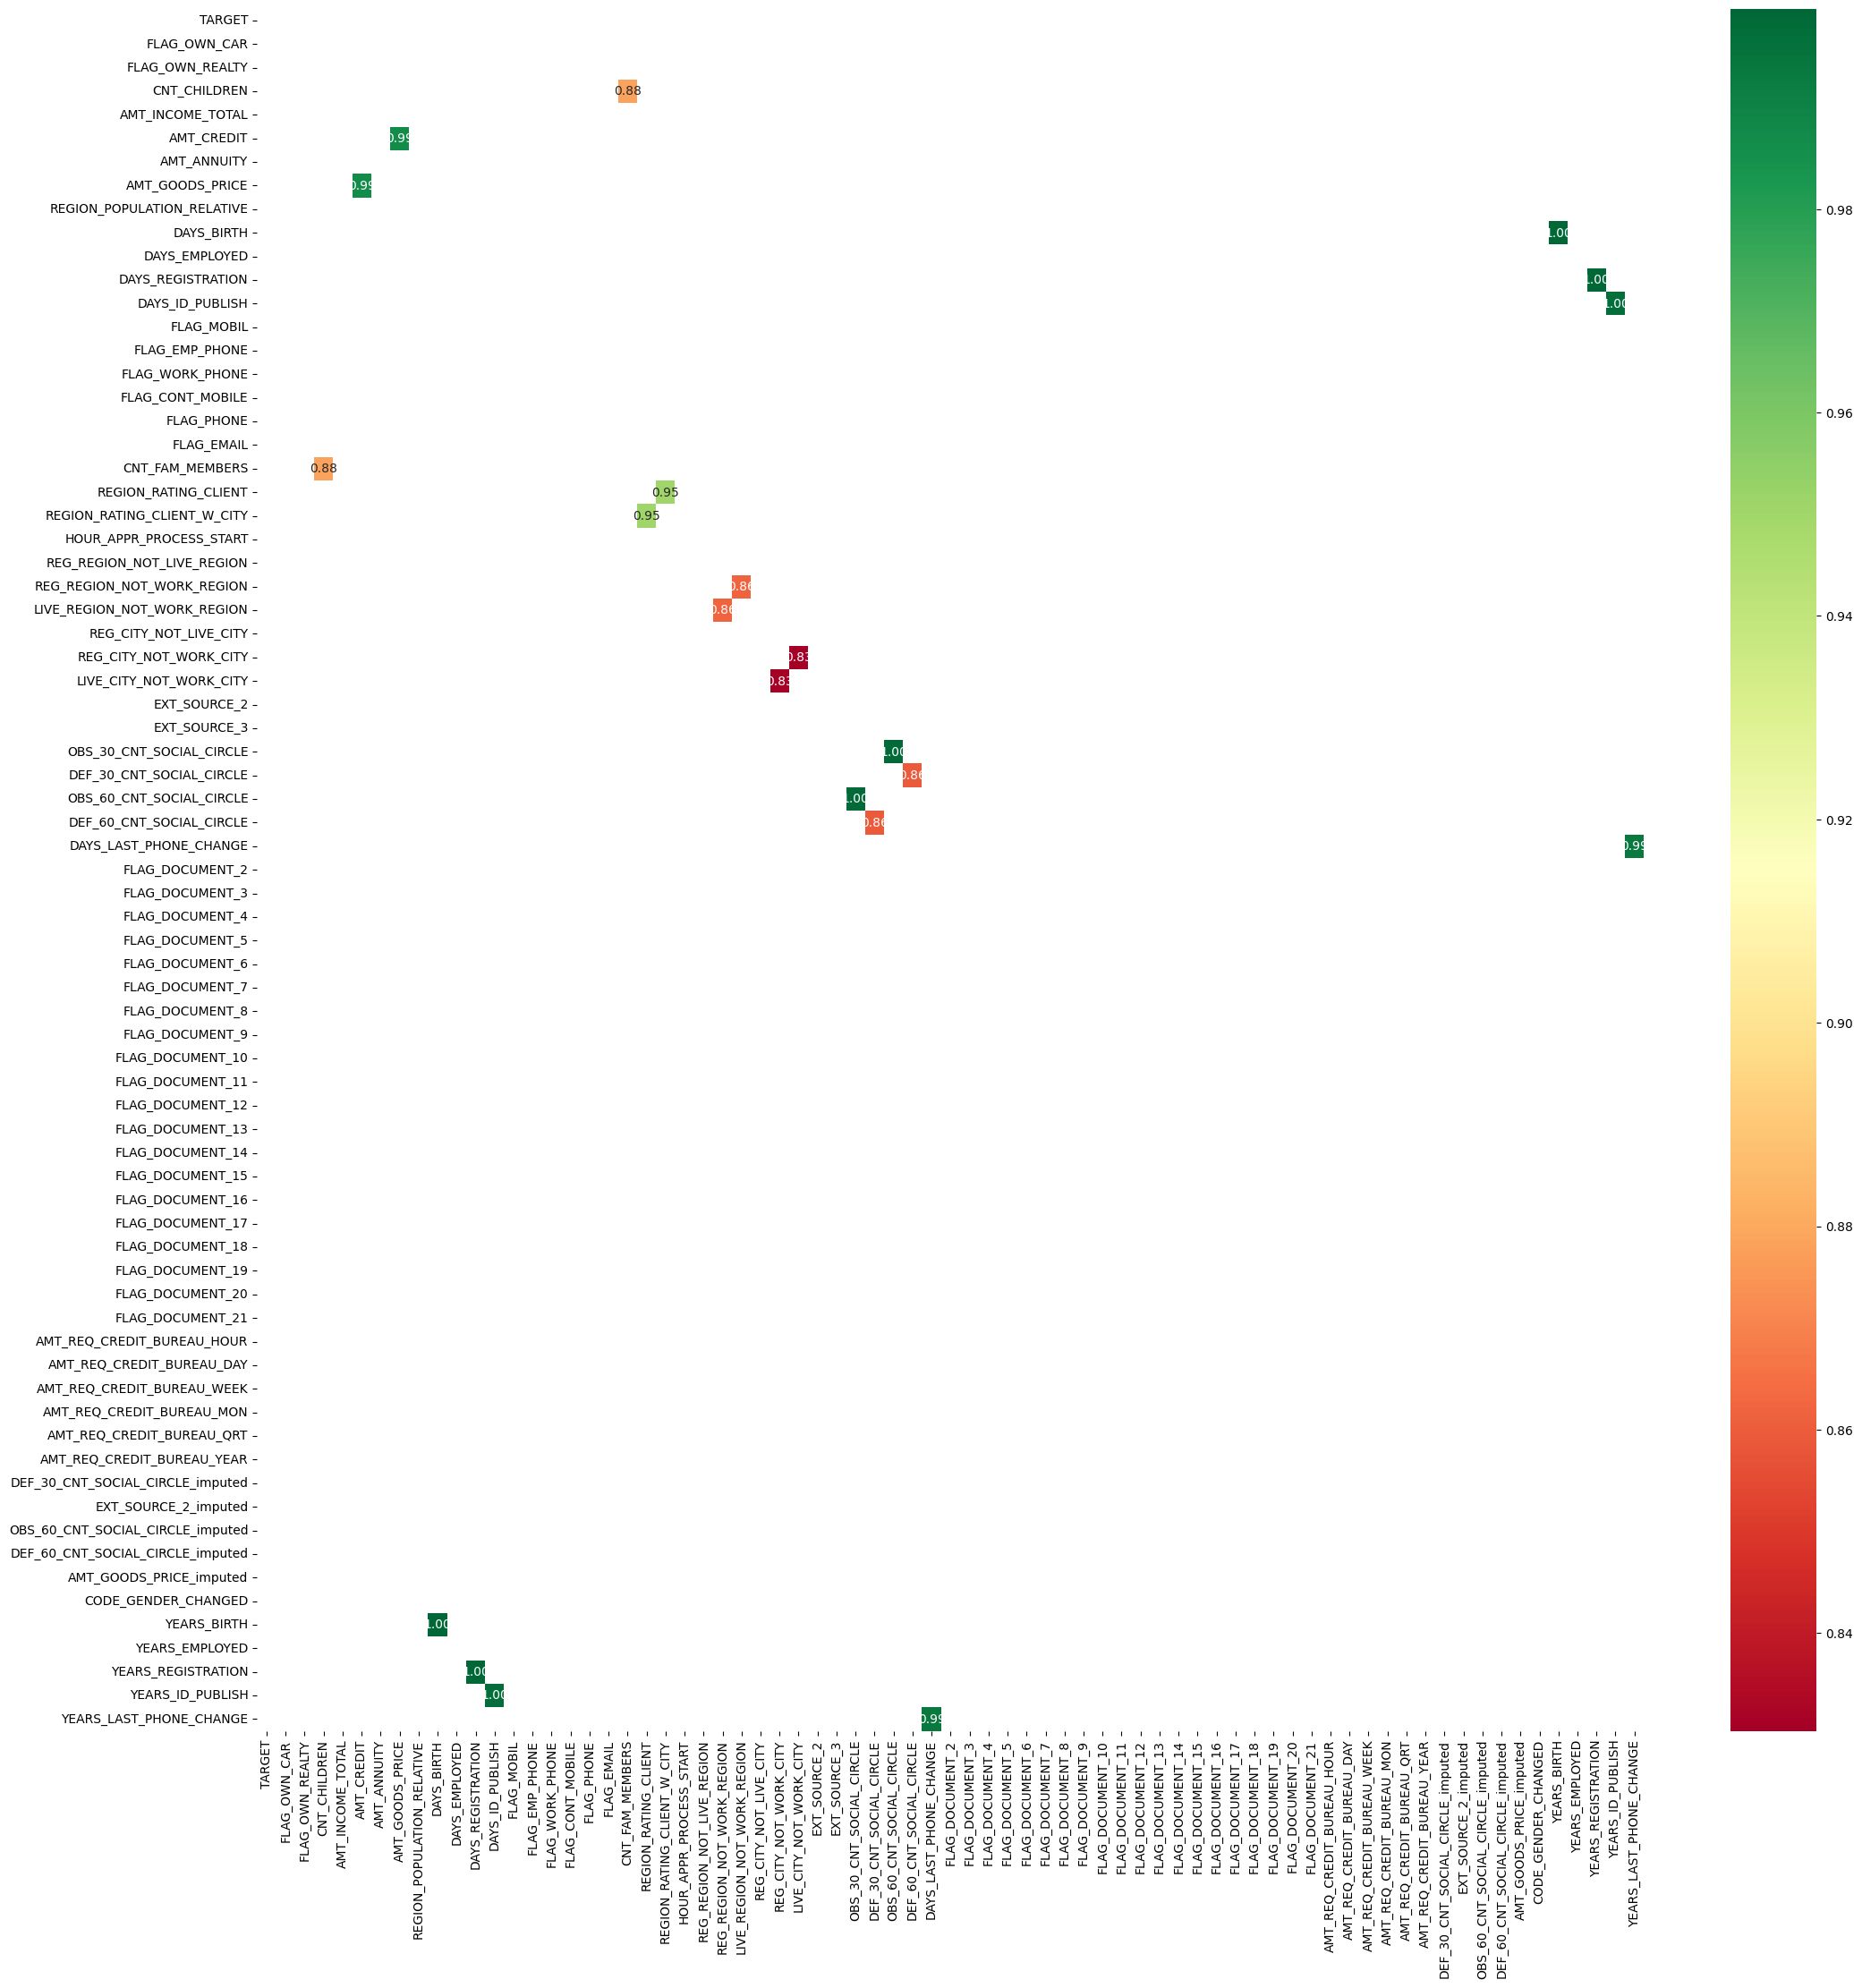

In [ ]:
plt.figure(figsize = (25,25))
sns.heatmap(data = corr_df0[(corr_df0 >= 0.8) & (corr_df0 < 0.9999)], annot = True, cmap = "RdYlGn", cbar = True, fmt='.2f')
plt.show()

### Подивимось на 10 найкращих кореляцій для вчасних платежів

In [ ]:
corr_df0[corr_df0 <= 0.99].unstack().sort_values(ascending = False).head(28)

AMT_CREDIT                   AMT_GOODS_PRICE               0.99
AMT_GOODS_PRICE              AMT_CREDIT                    0.99
REGION_RATING_CLIENT_W_CITY  REGION_RATING_CLIENT          0.95
REGION_RATING_CLIENT         REGION_RATING_CLIENT_W_CITY   0.95
CNT_CHILDREN                 CNT_FAM_MEMBERS               0.88
CNT_FAM_MEMBERS              CNT_CHILDREN                  0.88
REG_REGION_NOT_WORK_REGION   LIVE_REGION_NOT_WORK_REGION   0.86
LIVE_REGION_NOT_WORK_REGION  REG_REGION_NOT_WORK_REGION    0.86
DEF_60_CNT_SOCIAL_CIRCLE     DEF_30_CNT_SOCIAL_CIRCLE      0.86
DEF_30_CNT_SOCIAL_CIRCLE     DEF_60_CNT_SOCIAL_CIRCLE      0.86
LIVE_CITY_NOT_WORK_CITY      REG_CITY_NOT_WORK_CITY        0.83
REG_CITY_NOT_WORK_CITY       LIVE_CITY_NOT_WORK_CITY       0.83
AMT_GOODS_PRICE              AMT_ANNUITY                   0.78
AMT_ANNUITY                  AMT_GOODS_PRICE               0.78
AMT_CREDIT                   AMT_ANNUITY                   0.77
AMT_ANNUITY                  AMT_CREDIT 

Оскільки у нас є комбінації, що повторюються, дивлячись на наведену вище таблицю і видаляючи дублі, ми отримуємо топ-10 кореляцій, як показано нижче:

- AMT_GOODS_PRICE              AMT_CREDIT                    0.99
- REGION_RATING_CLIENT         REGION_RATING_CLIENT_W_CITY   0.95
- CNT_FAM_MEMBERS              CNT_CHILDREN                  0.88
- REG_REGION_NOT_WORK_REGION   LIVE_REGION_NOT_WORK_REGION   0.86
- DEF_30_CNT_SOCIAL_CIRCLE     DEF_60_CNT_SOCIAL_CIRCLE      0.86
- LIVE_CITY_NOT_WORK_CITY      REG_CITY_NOT_WORK_CITY        0.83
- AMT_ANNUITY                  AMT_GOODS_PRICE               0.78
- AMT_ANNUITY                  AMT_CREDIT                    0.77
- DAYS_BIRTH                   DAYS_EMPLOYED                 0.63
- DAYS_EMPLOYED                FLAG_DOCUMENT_6               0.60

### Порівняємо 10 найкращих кореляцій між випадками із платіжними труднощами та вчасними платежами

**Спостереження**

- Топ-10 кореляцій для Труднощів з оплатою та Вчасних платежів однакові, за винятком незначних відмінностей у відсотках кореляції
- Найвища кореляція для комбінації `AMT_GOODS_PRICE` та `AMT_CREDIT`.
- Для набору даних "Труднощі з оплатою" кореляція між `AMT_GOODS_PRICE` та `AMT_CREDIT` становить 0,98
- Для набору даних "Вчасні платежі" кореляція між `AMT_GOODS_PRICE` та `AMT_CREDIT` становить 0,99

# Одновимірний аналіз числових змінних

### Аналіз стовпця `AMT_CREDIT`

#### Пошук викидів в `AMT_CREDIT` при випадках із платіжними труднощами

Розрахунок IQR (Inter Quartile range)

In [ ]:
Q1 = df1['AMT_CREDIT'].quantile(0.25)
Q3 = df1['AMT_CREDIT'].quantile(0.75)
IQR = Q3 - Q1
print(IQR)

448915.5


Значення *до* (Q1 - 1.5 * IQR) та *після* (Q3 + 1.5 * IQR) є викидами.

In [ ]:
Min_value1 = (Q1 - 1.5 * IQR)
Max_value1 = (Q3 + 1.5 * IQR)
print("Мінімальне значення, до якого існують викиди: {}".format(Min_value1))
print("Максимальне значення, після якого існують викиди: {}".format(Max_value1))

Мінімальне значення, до якого існують викиди: -388973.25
Максимальне значення, після якого існують викиди: 1406688.75


#### Пошук викидів в `AMT_CREDIT` при випадках із вчасними оплатами

Розрахунок IQR (Inter Quartile range)

In [ ]:
Q1 = df0['AMT_CREDIT'].quantile(0.25)
Q3 = df0['AMT_CREDIT'].quantile(0.75)
IQR = Q3 - Q1
print(IQR)

540000.0


Значення *до* (Q1 - 1.5 * IQR) та *після* (Q3 + 1.5 * IQR) є викидами.

In [ ]:
Min_value0 = (Q1 - 1.5 * IQR)
Max_value0 = (Q3 + 1.5 * IQR)
print("Мінімальне значення, до якого існують викиди: {}".format(Min_value0))
print("Максимальне значення, після якого існують викиди: {}".format(Max_value0))

Мінімальне значення, до якого існують викиди: -540000.0
Максимальне значення, після якого існують викиди: 1620000.0


Видалення викидів і побудова діаграми розподілу

In [ ]:
def kde_no_outliers(df0, df1, Max_value0, Max_value1, column):
  plt.figure(figsize = (14,6))
  sns.kdeplot(df1[df1[column] <= Max_value1][column],label = 'Payment difficulties')
  sns.kdeplot(df0[df0[column] <= Max_value0][column],label = 'On-Time Payments')
  plt.ticklabel_format(style='plain', axis='x')
  plt.xticks(rotation = 45)
  plt.legend()
  plt.show()

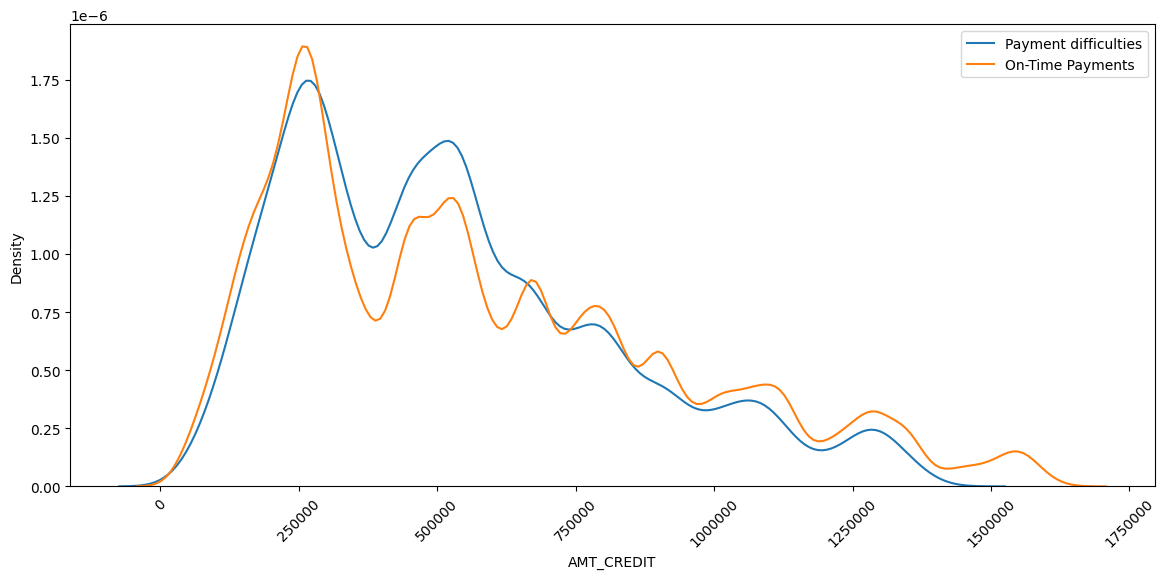

In [ ]:
kde_no_outliers(df0, df1, Max_value0, Max_value1, 'AMT_CREDIT')

**Спостереження**

- Для `AMT_CREDIT` від 250000 до приблизно 650000 більше клієнтів мають труднощі з оплатою
- Для `AMT_CREDIT` > 750000 більше клієнтів, які вчасно здійснюють платежі

# ДЗ 5. Одновимірний аналіз числової колонки

 Проведіть подібний до прикладу одновимірний аналіз (виявлення викидів, їх усунення та побудова KDE  графіку) для числових змінних
- `YEARS_BIRTH`
- `AMT_GOODS_PRICE`
- `DAYS_EMPLOYED`

Опціонально
- `CNT_CHILDREN`
- `AMT_INCOME_TOTAL`

Для цього винесіть функціонал для аналізу у функцію та викличіть функцію для кожної двійки змінних.

Зробіть висновки з аналізу.

Аналіз `YEARS_BIRTH`

In [ ]:
Q1 = df0['YEARS_BIRTH'].quantile(0.25)
Q3 = df0['YEARS_BIRTH'].quantile(0.75)
IQR = Q3 - Q1
print(IQR)

20.0


In [ ]:
Min_value0 = (Q1 - 1.5 * IQR)
Max_value0 = (Q3 + 1.5 * IQR)
print("Мінімальне значення, до якого існують викиди: {}".format(Min_value0))
print("Максимальне значення, після якого існують викиди: {}".format(Max_value0))

Мінімальне значення, до якого існують викиди: 4.0
Максимальне значення, після якого існують викиди: 84.0


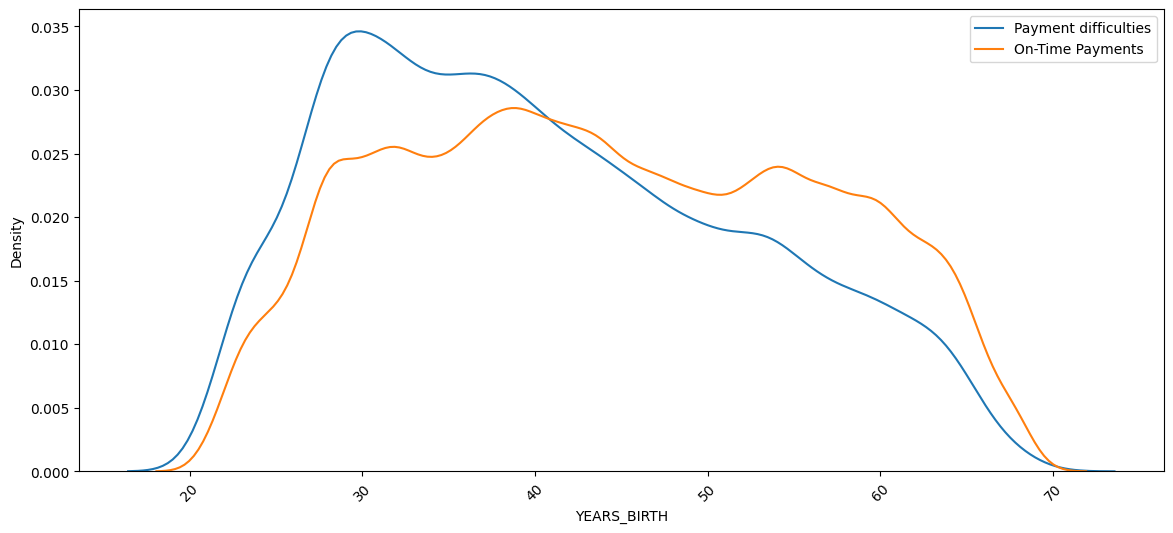

In [ ]:
kde_no_outliers(df0, df1, Max_value0, Max_value1, 'YEARS_BIRTH')

Висновки
-  молодші клієнти, особливо в віковій категорії від 20 до 30 років, частіше стикаються з проблемами щодо своєчасних платежів. Це може бути пов'язано з менш стабільним фінансовим становищем, вищим рівнем безробіття або меншим досвідом управління фінансами в цій віковій групі.
- клієнти у віковій категорії 50+ показують вищу стабільність у платежах, що може відображати більший досвід у фінансовому плануванні та керуванні особистими фінансами. Це також може свідчити про зниження кількості фінансових зобов'язань, наприклад, через виплату іпотек або дітей, які стають фінансово незалежними.
- найбільша активність у кредитуванні спостерігається в вікі від 30 до 50 років, що може бути пов'язано з піковим періодом купівлі нерухомості, автомобілів та інших великих покупок.

Аналіз `AMT_GOODS_PRICE`

In [ ]:
Q1 = df0['AMT_GOODS_PRICE'].quantile(0.25)
Q3 = df0['AMT_GOODS_PRICE'].quantile(0.75)
IQR = Q3 - Q1
print(IQR)

446502.375


In [ ]:
Min_value0 = (Q1 - 1.5 * IQR)
Max_value0 = (Q3 + 1.5 * IQR)
print("Мінімальне значення, до якого існують викиди: {}".format(Min_value0))
print("Максимальне значення, після якого існують викиди: {}".format(Max_value0))

Мінімальне значення, до якого існують викиди: -431253.5625
Максимальне значення, після якого існують викиди: 1354755.9375


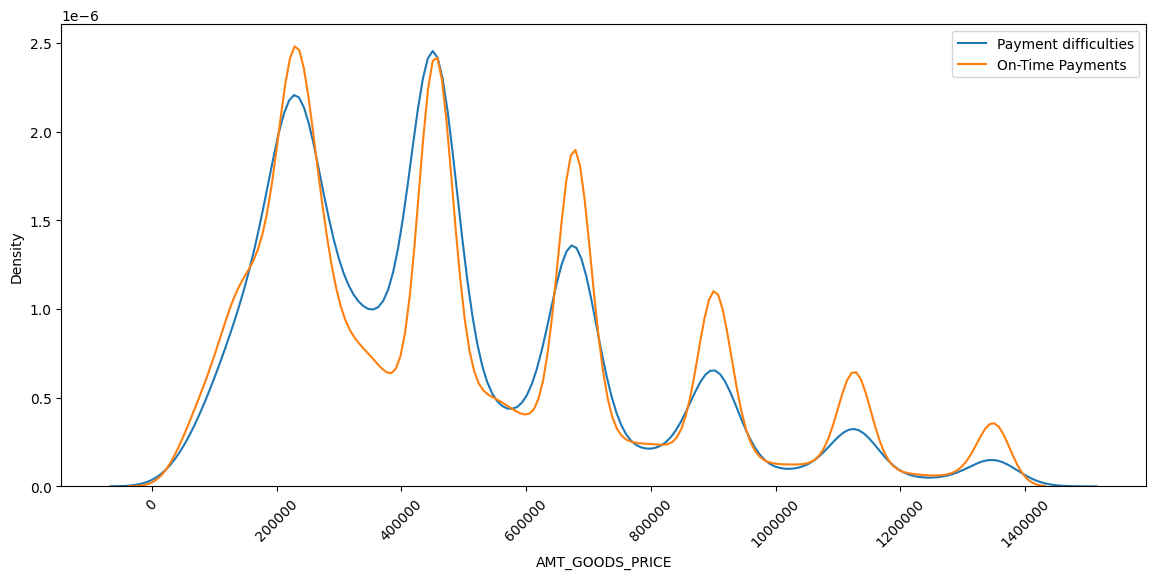

In [ ]:
kde_no_outliers(df0, df1, Max_value0, Max_value1, 'AMT_GOODS_PRICE')

Висновки:
- клієнти, які купують товари у ціновому діапазоні від 400,000 до 600,000 здаються більш схильними до проблем з платежами порівняно з іншими. Це може бути пов'язано з фінансовим натягом, який виникає при покупках в цьому ціновому сегменті.
- навпаки, клієнти, які купують товари за вищою ціною (понад 1,000,000), зазвичай мають менше проблем із своєчасними платежами. Це може вказувати на більшу фінансову стабільність цієї групи покупців
- порівняння розподілів показує, що клієнти, що купують товари за нижчими цінами (менше 200,000), також частіше стикаються з платіжними труднощами. Це може вказувати на доступність таких товарів для ширшого кола покупців, включаючи тих, хто має меншу кредитну спроможність.
- є декілька пікових точок щільності, які відображають популярні цінові категорії для кредитування.

Аналіз `DAYS_EMPLOYED`

In [ ]:
Q1 = df0['DAYS_EMPLOYED'].quantile(0.25)
Q3 = df0['DAYS_EMPLOYED'].quantile(0.75)
IQR = Q3 - Q1
print(IQR)

5107.0


In [ ]:
Min_value0 = (Q1 - 1.5 * IQR)
Max_value0 = (Q3 + 1.5 * IQR)
print("Мінімальне значення, до якого існують викиди: {}".format(Min_value0))
print("Максимальне значення, після якого існують викиди: {}".format(Max_value0))

Мінімальне значення, до якого існують викиди: -6693.5
Максимальне значення, після якого існують викиди: 13734.5


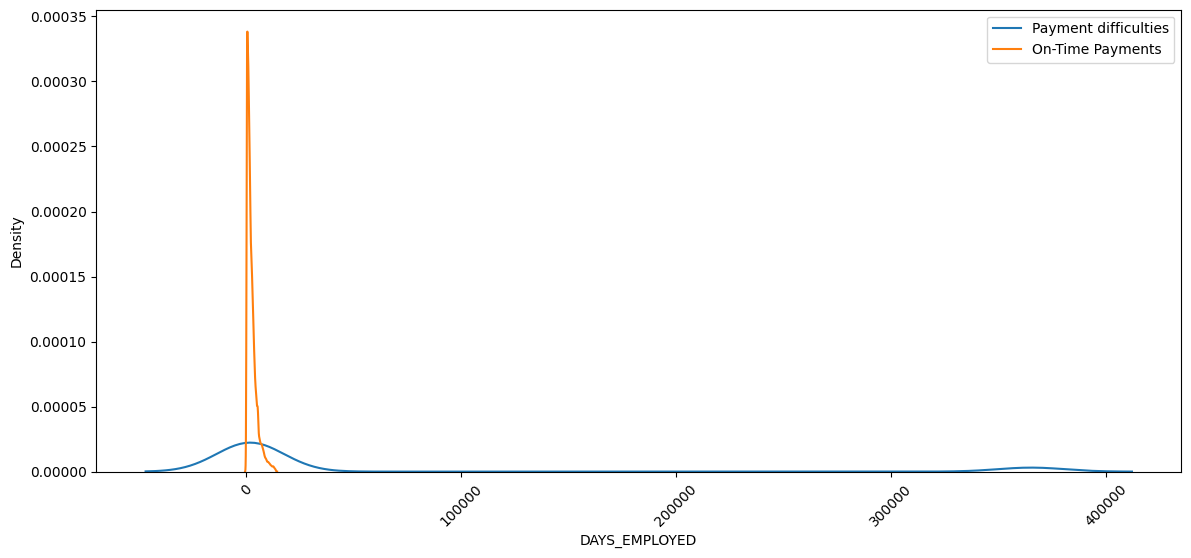

In [ ]:
kde_no_outliers(df0, df1, Max_value0, Max_value1, 'DAYS_EMPLOYED')

Висновок:
- виділяється особливо велика кількість значень, що зосереджені близько однієї точки, яка є дуже низькою порівняно з іншими. Це може вказувати на наявність помилкових даних або аномалій, що вимагають подальшого розслідування.
- графік показує, що для більшості клієнтів значення DAYS_EMPLOYED містяться відносно низькі і стабільні (близько 0 днів зайнятості), що може свідчити про велику кількість клієнтів, які або тільки почали працювати, або вказали неправдиву інформацію.
-  на графіку мало відрізняються розподіли для клієнтів із труднощами платежів і тих, хто платить вчасно, особливо в діапазоні низьких значень. Це може означати, що тривалість зайнятості не має суттєвого впливу на платіжну дисципліну клієнтів в даному наборі даних.
- потрібно перевірити, чи справді великі значення DAYS_EMPLOYED є валідними, або є помилкою в даних.
- якщо дані виявляться валідними, можна розглянути поділ клієнтів за категоріями зайнятості для точнішого прогнозування платіжної поведінки (що ми ї побачили на етапі аналізу цієї колонки)

Аналіз `CNT_CHILDREN`

In [ ]:
Q1 = df0['CNT_CHILDREN'].quantile(0.25)
Q3 = df0['CNT_CHILDREN'].quantile(0.75)
IQR = Q3 - Q1
print(IQR)

1.0


In [ ]:
Min_value0 = (Q1 - 1.5 * IQR)
Max_value0 = (Q3 + 1.5 * IQR)
print("Мінімальне значення, до якого існують викиди: {}".format(Min_value0))
print("Максимальне значення, після якого існують викиди: {}".format(Max_value0))

Мінімальне значення, до якого існують викиди: -1.5
Максимальне значення, після якого існують викиди: 2.5


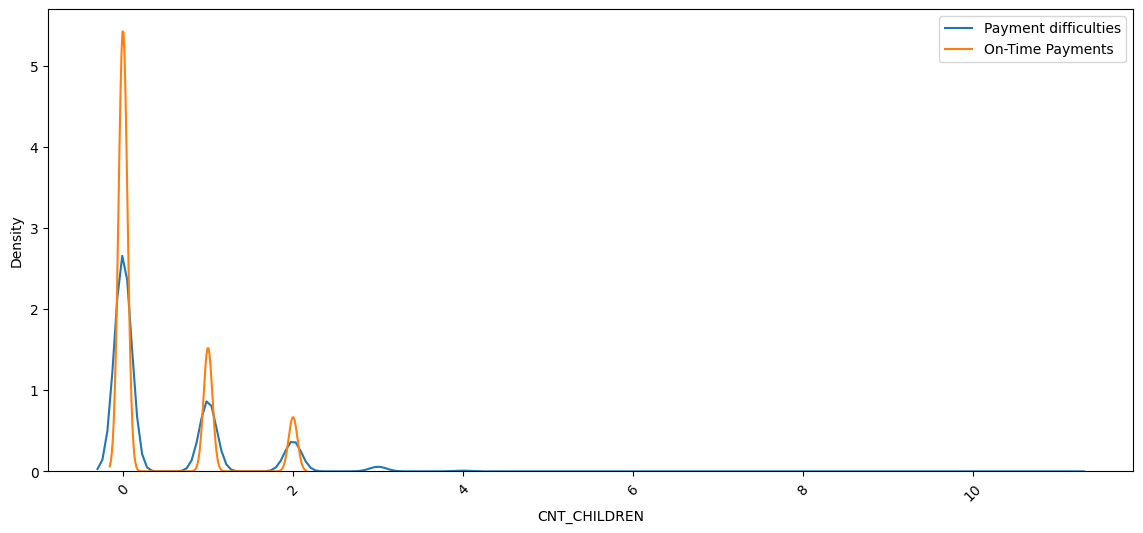

In [ ]:
kde_no_outliers(df0, df1, Max_value0, Max_value1, 'CNT_CHILDREN')

Висновки:
-  більшість клієнтів, незалежно від того, чи мають вони труднощі з платежами чи ні, не мають дітей. Це підтверджується високим піком щільності біля значення 0.
- наявність однієї дитини має помітний пік у розподілі для обох груп, але особливо для клієнтів з труднощами у платежах. Це може вказувати на те, що наявність однієї дитини збільшує фінансовий тиск на бюджет сім'ї.
- хоча клієнти з двома та трьома дітьми зустрічаються рідше, існує вищий пік щільності серед клієнтів з труднощами у платежах порівняно з тими, хто робить платежі вчасно. Це може свідчити про збільшення фінансових труднощів у сімей з більшою кількістю дітей.
- для клієнтів з чотирма та більше дітьми розподіл щільності є дуже низьким, що може вказувати на відносну рідкість таких сімей у датасеті або на більшу обачність у фінансових рішеннях у таких великих сім'я (сами так і є в даних, як ми аналізували вище)

Аналіз `AMT_INCOME_TOTAL`

In [ ]:
Q1 = df0['AMT_INCOME_TOTAL'].quantile(0.25)
Q3 = df0['AMT_INCOME_TOTAL'].quantile(0.75)
IQR = Q3 - Q1
print(IQR)

90000.0


In [ ]:
Min_value0 = (Q1 - 1.5 * IQR)
Max_value0 = (Q3 + 1.5 * IQR)
print("Мінімальне значення, до якого існують викиди: {}".format(Min_value0))
print("Максимальне значення, після якого існують викиди: {}".format(Max_value0))

Мінімальне значення, до якого існують викиди: -22500.0
Максимальне значення, після якого існують викиди: 337500.0


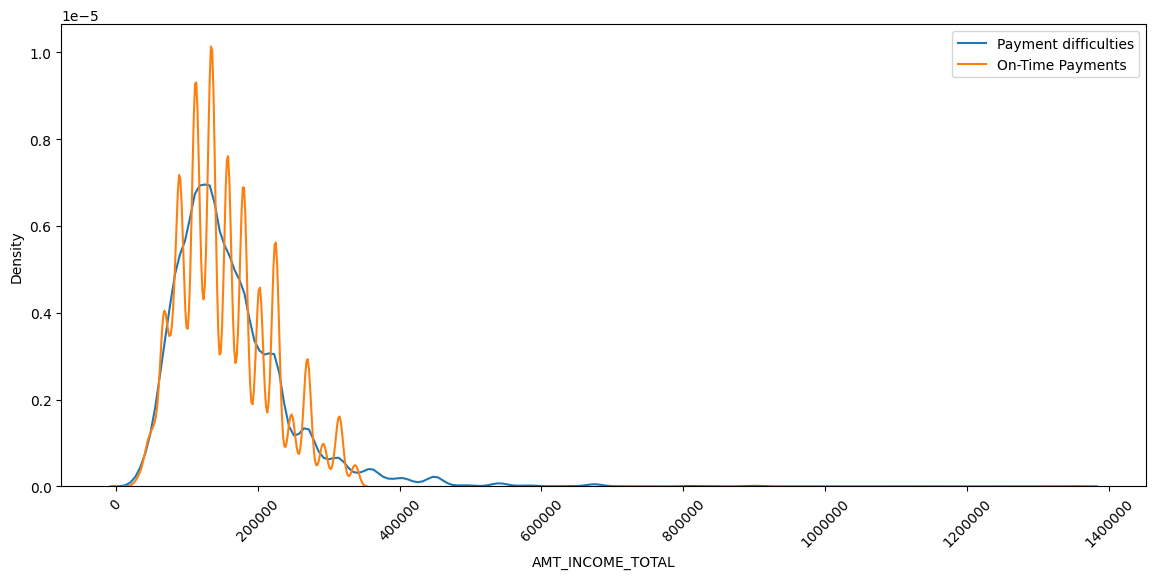

In [ ]:
kde_no_outliers(df0, df1, Max_value0, Max_value1, 'AMT_INCOME_TOTAL')

Висновки:
- найбільша щільність обох груп зосереджена в діапазоні нижчих доходів, що вказує на велику кількість клієнтів з порівняно низькими доходами.
- є декілька піків щільності, які можуть відповідати стандартним рівням доходу в регіоні, де проводиться аналіз. Ці піки більш виражені у групі з труднощами у платежах, особливо в діапазоні до 200,000.
- зі збільшенням доходу, щільність клієнтів з платіжними труднощами знижується, що свідчить про меншу ймовірність виникнення платіжних труднощів серед клієнтів із високим доходом.
- клієнти із нижчими доходами частіше стикаються з труднощами у платежах. Це може бути пов'язано з більшою фінансовою вразливістю цієї категорії клієнтів.

# Двовимірний/Багатовимірний аналіз

## Неперервні vs неперервні змінні

### Аналіз стовпця `AMT_GOODS_PRICE` vs `AMT_CREDIT`

Пошук викидів для ствопця `AMT_GOODS_PRICE ` для групи із платіжними труднощами**

In [ ]:
max_value1_AMT_GOODS_PRICE = outlier_range(df1,'AMT_GOODS_PRICE')
max_value1_AMT_GOODS_PRICE

1329750.0

**Пошук викидів для ствопця `AMT_CREDIT` для групи із платіжними труднощами**

In [ ]:
max_value1_AMT_CREDIT = outlier_range(df1,'AMT_CREDIT')
max_value1_AMT_CREDIT

1406688.75

**Пошук викидів для `AMT_GOODS_PRICE `для групи із вчасними оплатами**

In [ ]:
max_value0_AMT_GOODS_PRICE = outlier_range(df0,'AMT_GOODS_PRICE')
max_value0_AMT_GOODS_PRICE

1354755.9375

**Пошук викидів для `AMT_CREDIT `для групи із вчасними оплатами**

In [ ]:
max_value0_AMT_CREDIT = outlier_range(df0,'AMT_CREDIT')
max_value0_AMT_CREDIT

1620000.0

Побудова діаграми розсіювання для порівняння з видаленими викидами

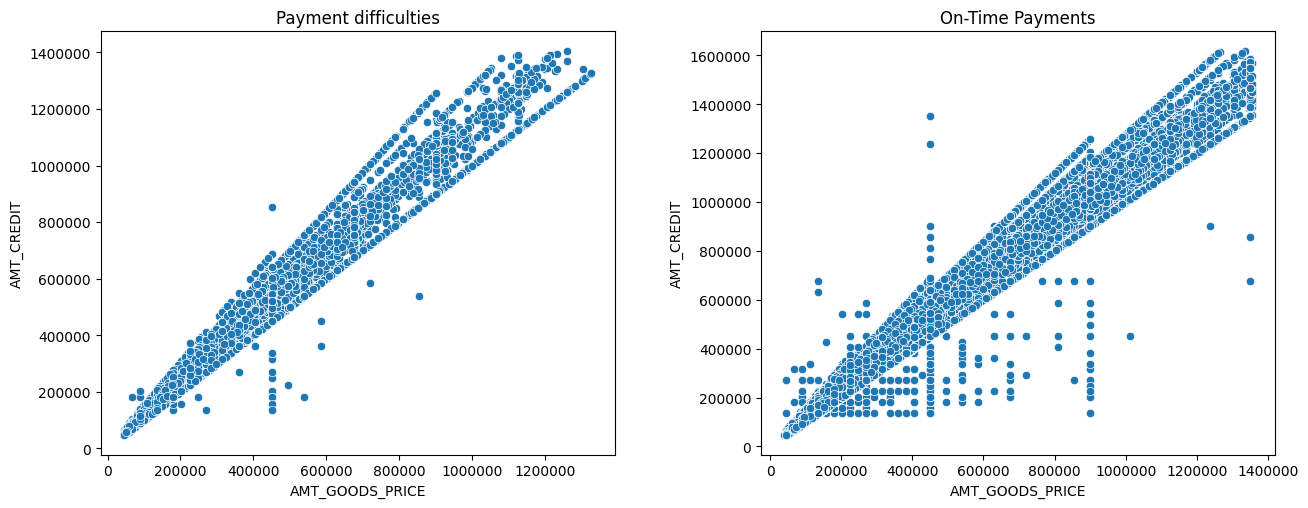

In [ ]:
plt.figure(figsize = (14, 6))

plt.subplot(1,2,1)
plt.title('Payment difficulties')
sns.scatterplot(x = df1[df1['AMT_GOODS_PRICE'] < max_value1_AMT_GOODS_PRICE].AMT_GOODS_PRICE,
                y = df1[df1['AMT_CREDIT'] < max_value1_AMT_CREDIT].AMT_CREDIT, data = df1)
plt.ticklabel_format(style='plain', axis='x')
plt.ticklabel_format(style='plain', axis='y')

plt.subplot(1,2,2)
plt.title('On-Time Payments')
sns.scatterplot(x = df0[df0['AMT_GOODS_PRICE'] < max_value0_AMT_GOODS_PRICE].AMT_GOODS_PRICE,
                y = df0[df0['AMT_CREDIT'] < max_value0_AMT_CREDIT].AMT_CREDIT, data = df0)
plt.ticklabel_format(style='plain', axis='x')
plt.ticklabel_format(style='plain', axis='y')

plt.tight_layout(pad = 4)
plt.show()

**Спостереження**
- AMT_GOODS_PRICE та AMT_CREDIT мають сильну позитивну кореляцію. Це означає, що зі збільшенням ціни товару зростає і сума кредиту

# ДЗ 6. Кореляційний аналіз для пари числових змінних

Проведіть подібний до прикладу кореляційний аналіз для пар змінних
- AMT_ANNUITY і AMT_CREDIT
- DAYS_EMPLOYED і AMT_INCOME_TOTAL
- AMT_CREDIT і DAYS_BIRTH

Для цього винесіть функціонал для аналізу у функцію та викличіть функцію для кожної двійки змінних.
Зробіть висновок про наявність кореляції між змінними.

Аналіз AMT_ANNUITY і AMT_CREDIT

In [ ]:
# Пошук викидів для групи із платіжними труднощами
max_value1_AMT_ANNUITY = outlier_range(df1,'AMT_ANNUITY')
max_value1_AMT_ANNUITY

56398.5

In [ ]:
# Пошук викидів для групи із вчасними оплатами
max_value0_AMT_ANNUITY = outlier_range(df0,'AMT_ANNUITY')
max_value0_AMT_ANNUITY

62187.75

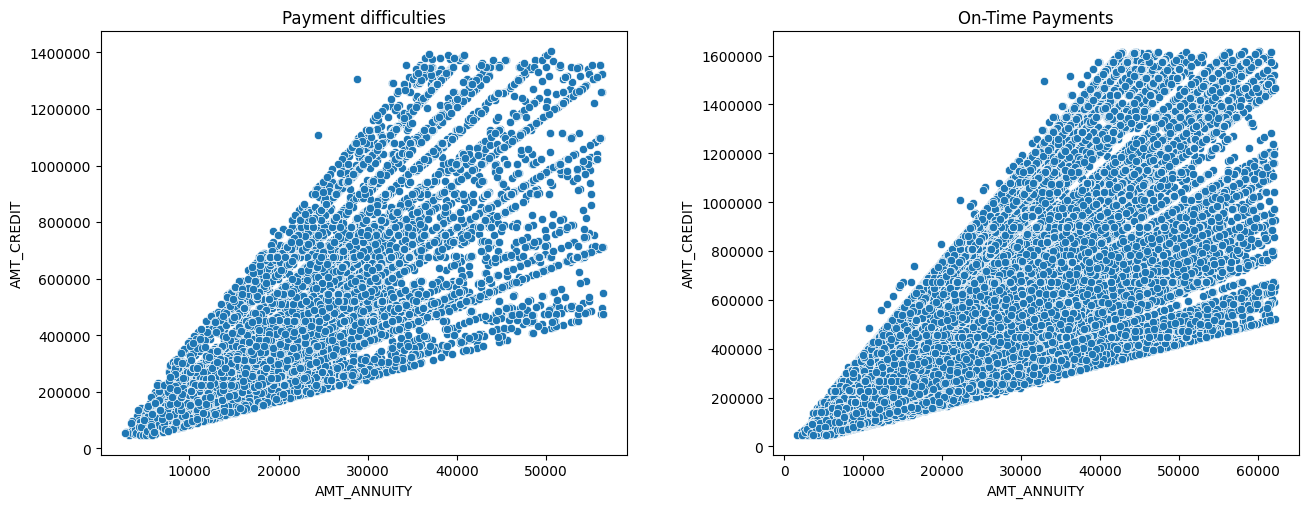

In [ ]:
plt.figure(figsize = (14, 6))

plt.subplot(1,2,1)
plt.title('Payment difficulties')
sns.scatterplot(x = df1[df1['AMT_ANNUITY'] < max_value1_AMT_ANNUITY].AMT_ANNUITY,
                y = df1[df1['AMT_CREDIT'] < max_value1_AMT_CREDIT].AMT_CREDIT, data = df1)
plt.ticklabel_format(style='plain', axis='x')
plt.ticklabel_format(style='plain', axis='y')

plt.subplot(1,2,2)
plt.title('On-Time Payments')
sns.scatterplot(x = df0[df0['AMT_ANNUITY'] < max_value0_AMT_ANNUITY].AMT_ANNUITY,
                y = df0[df0['AMT_CREDIT'] < max_value0_AMT_CREDIT].AMT_CREDIT, data = df0)
plt.ticklabel_format(style='plain', axis='x')
plt.ticklabel_format(style='plain', axis='y')

plt.tight_layout(pad = 4)
plt.show()

Висновки:
- у обох групах спостерігається чітка позитивна кореляція між AMT_ANNUITY і AMT_CREDIT. Це означає, що зі збільшенням розміру кредиту зростає і річна сума ануїтету. Така залежність логічна, оскільки більші кредити вимагають вищих регулярних платежів.
- діаграма для групи з платіжними труднощами показує більш варіабельне розсіювання, особливо при високих значеннях ануїтету і кредиту, що може вказувати на більш ризиковану поведінку у позик в цій групі. Для групи з вчасними платежами дані видаються більш упорядкованими і скупченими, що свідчить про стабільніше кредитне навантаження.
- густина точок у групі з вчасними платежами вища на нижньому кінці діапазону для обох змінних, що може свідчити про більшу кількість малих і середніх кредитів, які сплачуються вчасно.

Аналіз DAYS_EMPLOYED і AMT_INCOME_TOTAL

In [ ]:
# Пошук викидів для групи із платіжними труднощами
max_value1_DAYS_EMPLOYED = outlier_range(df1,'DAYS_EMPLOYED')
max_value1_DAYS_EMPLOYED

7184.5

In [ ]:
# Пошук викидів для групи із вчасними оплатами
max_value0_DAYS_EMPLOYED = outlier_range(df0,'DAYS_EMPLOYED')
max_value0_DAYS_EMPLOYED

13734.5

In [ ]:
# Пошук викидів для групи із платіжними труднощами
max_value1_AMT_INCOME_TOTAL = outlier_range(df1,'AMT_INCOME_TOTAL')
max_value1_AMT_INCOME_TOTAL

337500.0

In [ ]:
# Пошук викидів для групи із вчасними оплатами
max_value0_AMT_INCOME_TOTAL = outlier_range(df0,'AMT_INCOME_TOTAL')
max_value0_AMT_INCOME_TOTAL

337500.0

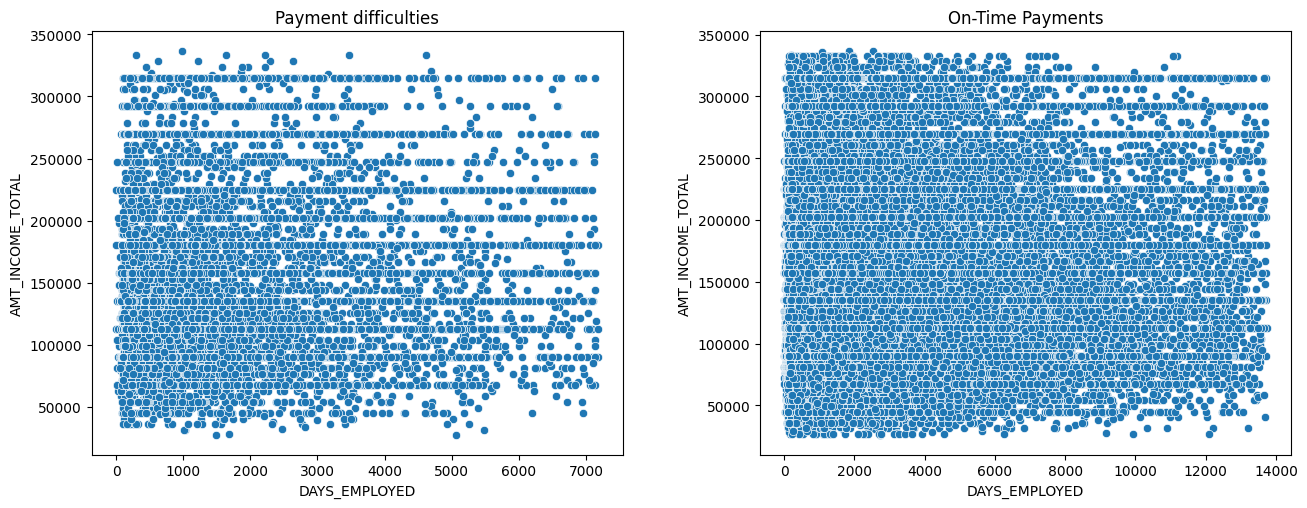

In [ ]:
plt.figure(figsize = (14, 6))

plt.subplot(1,2,1)
plt.title('Payment difficulties')
sns.scatterplot(x = df1[df1['DAYS_EMPLOYED'] < max_value1_DAYS_EMPLOYED].DAYS_EMPLOYED,
                y = df1[df1['AMT_INCOME_TOTAL'] < max_value1_AMT_INCOME_TOTAL].AMT_INCOME_TOTAL, data = df1)
plt.ticklabel_format(style='plain', axis='x')
plt.ticklabel_format(style='plain', axis='y')

plt.subplot(1,2,2)
plt.title('On-Time Payments')
sns.scatterplot(x = df0[df0['DAYS_EMPLOYED'] < max_value0_DAYS_EMPLOYED].DAYS_EMPLOYED,
                y = df0[df0['AMT_INCOME_TOTAL'] < max_value0_AMT_INCOME_TOTAL].AMT_INCOME_TOTAL, data = df0)
plt.ticklabel_format(style='plain', axis='x')
plt.ticklabel_format(style='plain', axis='y')

plt.tight_layout(pad = 4)
plt.show()

Висновки:
- на обох графіках спостерігається широкий діапазон доходів, який не залежить від тривалості зайнятості, оскільки точки з різними значеннями доходів розташовані на всіх рівнях днів зайнятості.
- відсутня явна кореляція між днями зайнятості та загальним доходом, оскільки розсіювання точок не відображає чітких тенденцій зростання або зменшення однієї змінної зі зміною іншої.
- на правій діаграмі видно, що серед клієнтів, які сплачують кредити вчасно, є багато осіб з великою кількістю днів зайнятості (близько 4000 до 12000 днів). Це може вказувати на більшу стабільність у доходах і зайнятості серед цих осіб.
- на графіку з труднощами платежів спостерігається більша кількість осіб з меншою кількістю днів зайнятості, що може вказувати на більшу непостійність у зайнятості серед цієї групи.

Аналіз AMT_CREDIT і DAYS_BIRTH

In [ ]:
# Пошук викидів для групи із платіжними труднощами
max_value1_DAYS_BIRTH = outlier_range(df1,'DAYS_BIRTH')
max_value1_DAYS_BIRTH

27998.5

In [ ]:
# Пошук викидів для групи із вчасними оплатами
max_value0_DAYS_BIRTH = outlier_range(df0,'DAYS_BIRTH')
max_value0_DAYS_BIRTH

30680.375

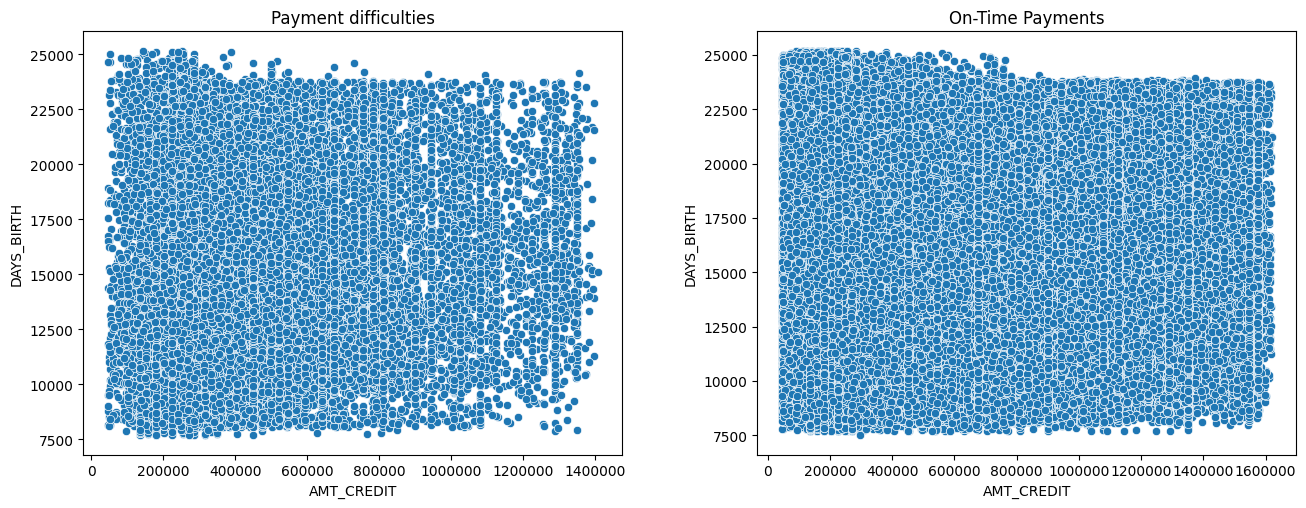

In [ ]:
plt.figure(figsize = (14, 6))

plt.subplot(1,2,1)
plt.title('Payment difficulties')
sns.scatterplot(x = df1[df1['AMT_CREDIT'] < max_value1_AMT_CREDIT].AMT_CREDIT,
                y = df1[df1['DAYS_BIRTH'] < max_value1_DAYS_BIRTH].DAYS_BIRTH, data = df1)
plt.ticklabel_format(style='plain', axis='x')
plt.ticklabel_format(style='plain', axis='y')

plt.subplot(1,2,2)
plt.title('On-Time Payments')
sns.scatterplot(x = df0[df0['AMT_CREDIT'] < max_value0_AMT_CREDIT].AMT_CREDIT,
                y = df0[df0['DAYS_BIRTH'] < max_value0_DAYS_BIRTH].DAYS_BIRTH, data = df0)
plt.ticklabel_format(style='plain', axis='x')
plt.ticklabel_format(style='plain', axis='y')

plt.tight_layout(pad = 4)
plt.show()

Висновок:
- на обох діаграмах видно, що немає явної кореляції між віком особи (представлений кількістю днів від народження) та розміром кредиту. Точки розподілені рівномірно по вертикалі на всіх рівнях AMT_CREDIT, що вказує на те, що вік не є визначальним фактором у величині кредиту, який люди беруть.
- більшість кредитів у обох групах зосереджена в діапазоні від приблизно 0 до 800000, з деякими викидами до 1600000. Це вказує на те, що переважна кількість осіб обирає кредити відносно стандартних сум, незалежно від їхнього віку.
- обидві групи мають широкий діапазон віку від молодших до старших осіб (від приблизно 7500 до 25000 днів від народження), що вказує на те, що кредити є популярними серед усіх вікових груп.
- права діаграма показує більшу рівномірність розподілу точок, що може свідчити про більш стабільне фінансове становище серед осіб, які роблять платежі вчасно.

## Неперервні та категоріальні змінні

In [ ]:
def draw_boxplot(df, categorical, continuous, max_continuous, title, hue_column, subplot_position):
    """
    Малює блок-діаграму для заданого DataFrame, категоріальної та неперервної змінної.
    """
    plt.subplot(1, 2, subplot_position)
    plt.title(title)
    red_diamond = dict(markerfacecolor='r', marker='D')
    sns.boxplot(x=categorical,
                y=df[df[continuous] < max_continuous][continuous],
                data=df,
                flierprops=red_diamond,
                order=sorted(df[categorical].unique(), reverse=True),
                hue=hue_column, hue_order=sorted(df[hue_column].unique(), reverse=True))
    plt.ticklabel_format(style='plain', axis='y')
    plt.xticks(rotation=90)

def bi_boxplot(categorical, continuous, max_continuous1, max_continuous0, hue_column):
    """
    Створює паралельні блок-діаграми для двох груп, визначених у наборі даних, на основі
    категоріальної та неперервної змінної, виділяючи відмінності за допомогою відтінків.
    """
    plt.figure(figsize=(16, 10))

    # Графік для першо групи "Труднощі з платежами" (Payment Difficulties)
    draw_boxplot(df1, categorical, continuous, max_continuous1, 'Payment Difficulties', hue_column, 1)

    # Графік для другої групи "Вчасні оплати" (On-Time Payments)
    draw_boxplot(df0, categorical, continuous, max_continuous0, 'On-Time Payments', hue_column, 2)

    plt.tight_layout(pad=4)
    plt.show()

### Аналіз стовпців `AMT_CREDIT` vs `NAME_EDUCATION_TYPE` vs `CODE_GENDER`

**Пошук викидів для `AMT_CREDIT `для групи із платіжними труднощами**

In [ ]:
max_value1_AMT_CREDIT = outlier_range(df1,'AMT_CREDIT')
max_value1_AMT_CREDIT

1406688.75

**Пошук викидів для `AMT_CREDIT ` для групи із вчасними платежами**

In [ ]:
max_value0_AMT_CREDIT = outlier_range(df0,'AMT_CREDIT')
max_value0_AMT_CREDIT

1620000.0

**Клієнт з платіжними труднощами**

In [ ]:
df1.groupby(by = ['NAME_EDUCATION_TYPE','CODE_GENDER']).AMT_CREDIT.describe().head()

count      mean       std       min       25%       50%        75%        max
NAME_EDUCATION_TYPE CODE_GENDER                                                                                
Academic degree     F              3.00 950245.50 504711.38 544491.00 667660.50 790830.00 1153122.75 1515415.50
Higher education    F           2438.00 648500.58 410415.70  47970.00 323595.00 545040.00  877500.00 2687355.00
                    M           1571.00 642070.94 409695.93  45000.00 329202.00 545040.00  832797.00 2695500.00
Incomplete higher   F            504.00 520150.35 352227.49  91692.00 269550.00 450000.00  675000.00 2695500.00
                    M            368.00 554723.82 347843.71  74628.00 284400.00 497520.00  699976.12 2013840.00

**Клієнт зі вчасними платежами**

In [ ]:
df0.groupby(by = ['NAME_EDUCATION_TYPE','CODE_GENDER']).AMT_CREDIT.describe().head()

count      mean       std       min       25%       50%        75%        max
NAME_EDUCATION_TYPE CODE_GENDER                                                                                 
Academic degree     F              97.00 708770.74 463052.42 130824.00 354469.50 607500.00 1006920.00 2463840.00
                    M              64.00 735235.38 497739.97  74182.50 309519.00 610056.00 1036890.00 1984500.00
Higher education    F           47852.00 682485.00 456642.78  45000.00 302206.50 568057.50  916470.00 4050000.00
                    M           23002.00 713144.54 486073.66  45000.00 315000.00 592560.00  973503.00 4050000.00
Incomplete higher   F            5780.00 555340.53 385980.60  45000.00 253737.00 454500.00  760225.50 2517300.00

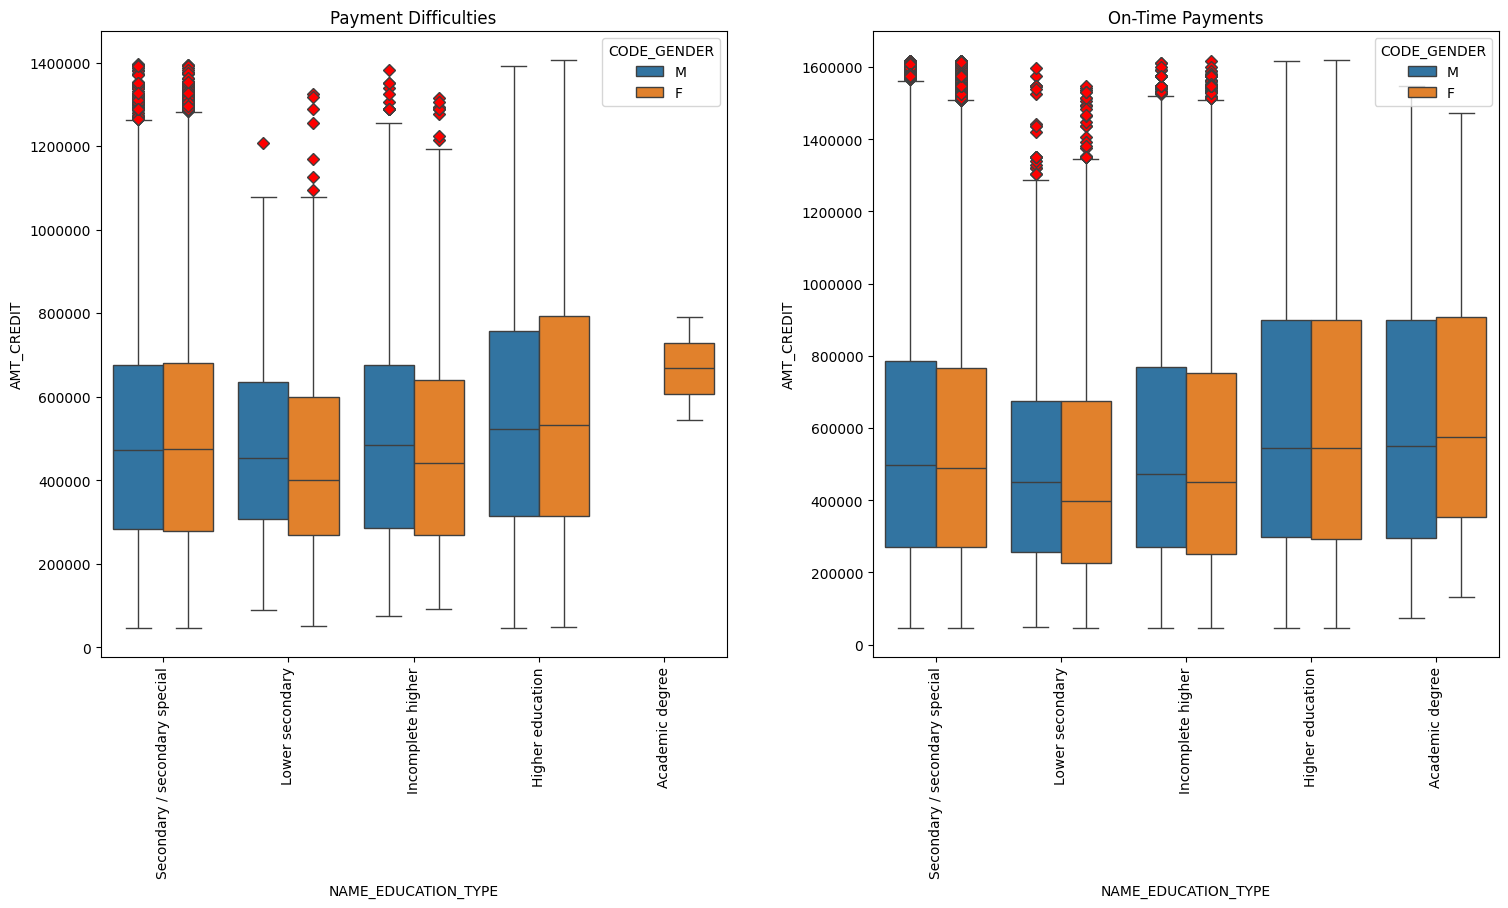

In [ ]:
bi_boxplot('NAME_EDUCATION_TYPE','AMT_CREDIT',max_value1_AMT_CREDIT, max_value0_AMT_CREDIT, 'CODE_GENDER')


**Спостереження**
- Клієнти з "академічним ступенем" мають широкий діапазон кредитів для своєчасних платежів, тоді як для клієнтів з проблемами з оплатою цей діапазон значно нижчий
- Якщо поглянути на зведену статистику, то клієнти з "академічним ступенем" та проблемами з оплатою беруть середній та медіанний кредит у значно більшому діапазоні, ніж клієнти з вчасною оплатою.
- Клієнти-чоловіки з "академічним ступенем" завжди сплачують кредит вчасно

 # ДЗ 7. Кореляційний аналіз між двома категоріальними змінними і числовою

Проведіть аналогічний кореляційний аналіз для трійок змінних

- AMT_INCOME_TOTAL vs NAME_FAMILY_STATUS vs CODE_GENDER
- AMT_INCOME_TOTAL vs YEARS_BIRTH_CATEGORY vs NAME_HOUSING_TYPE
- AMT_GOODS_PRICE vs NAME_INCOME_TYPE vs CODE_GENDER
- AMT_INCOME_TOTAL vs OCCUPATION_TYPE vs CODE_GENDER

Можете також проаналізувати додатково свою трійку :)

Для цього винесіть функціонал для аналізу у функцію та викличіть функцію для кожної трійки змінних.

Зробіть висновок про наявність кореляції між змінними.


In [ ]:
def complete_analysis(df1, df0, categorical, continuous, hue_column):
    """
    Conducts a full analysis including outlier detection, descriptive statistics,
    and visualization for two groups in a dataset.
    """
    # Outlier detection for both groups
    max_continuous1 = outlier_range(df1, continuous)
    max_continuous0 = outlier_range(df0, continuous)

    # Print descriptive statistics for the group with payment difficulties
    print("Descriptive Statistics for Payment Difficulties:")
    print(df1.groupby([categorical, hue_column])[continuous].describe())

    # Print descriptive statistics for the group with on-time payments
    print("\nDescriptive Statistics for On-Time Payments:")
    print(df0.groupby([categorical, hue_column])[continuous].describe())

    # Visualization of both groups
    plt.figure(figsize=(16, 10))
    draw_boxplot(df1, categorical, continuous, max_continuous1, 'Payment Difficulties', hue_column, 1)
    draw_boxplot(df0, categorical, continuous, max_continuous0, 'On-Time Payments', hue_column, 2)
    plt.tight_layout(pad=4)
    plt.show()


# complete_analysis(df1, df0, 'NAME_EDUCATION_TYPE', 'AMT_CREDIT', 'CODE_GENDER')


Descriptive Statistics for Payment Difficulties:
                                   count      mean        std      min       25%       50%       75%          max
NAME_FAMILY_STATUS   CODE_GENDER                                                                                 
Civil marriage       F           1753.00 153620.72  101045.86 25650.00 108000.00 135000.00 180000.00   3150000.00
                     M           1208.00 173949.99   92449.17 36000.00 117000.00 157500.00 202500.00   1350000.00
Married              F           8324.00 159907.85 1283283.40 27000.00  90000.00 135000.00 180000.00 117000000.00
                     M           6526.00 182233.06   94787.77 31500.00 126000.00 157500.00 225000.00   1890000.00
Separated            F           1045.00 161159.55   82633.33 36000.00 112500.00 135000.00 202500.00    832500.00
                     M            575.00 178888.28   85034.85 45000.00 126000.00 157500.00 225000.00    675000.00
Single / not married F           2220.0

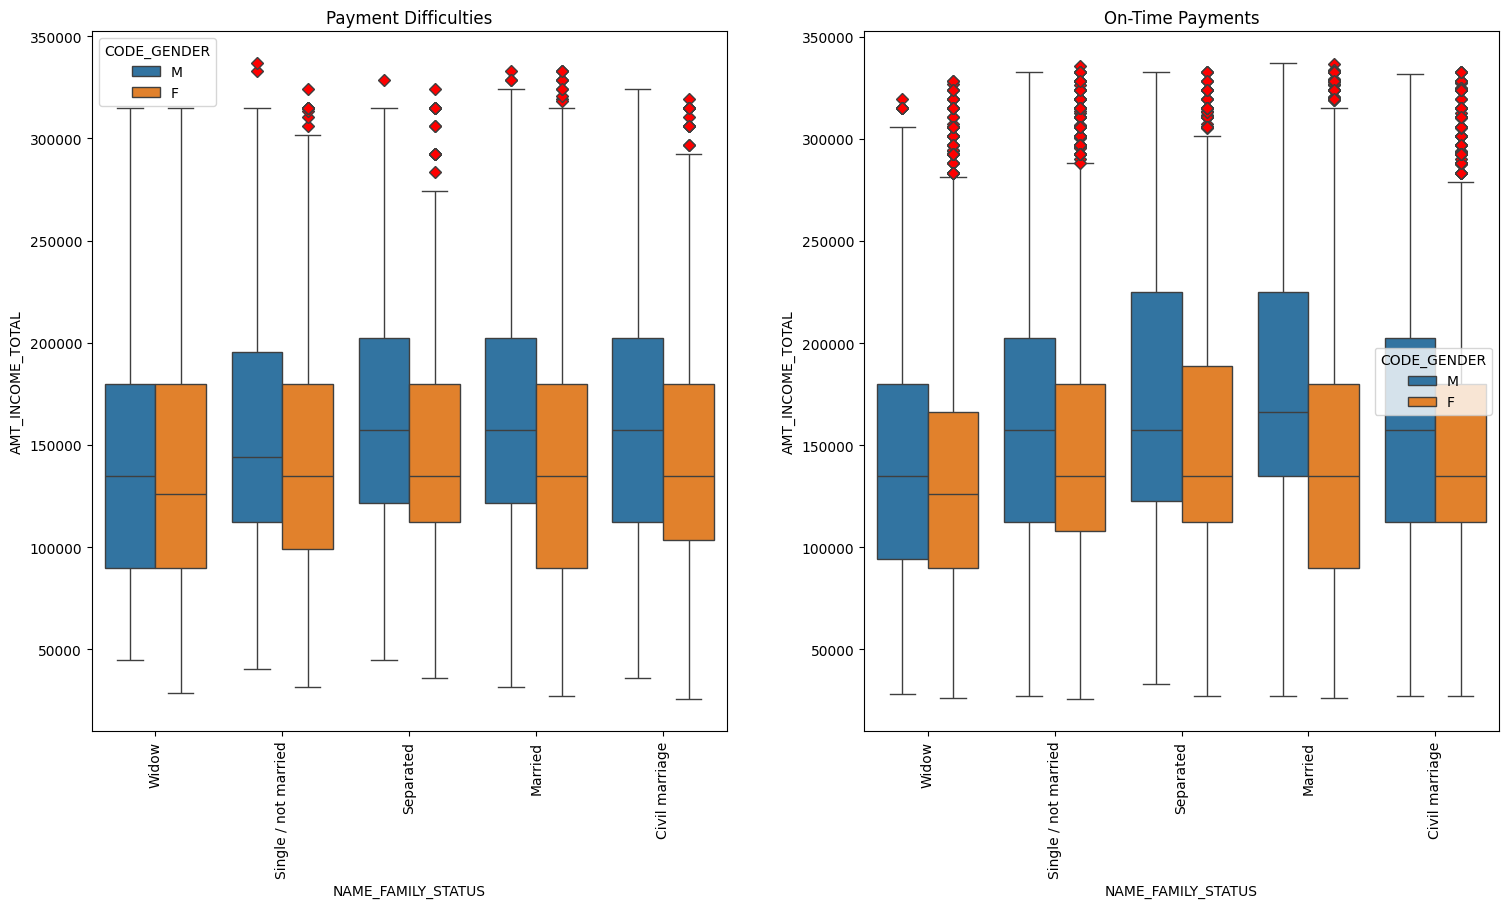

In [ ]:
complete_analysis(df1, df0, 'NAME_FAMILY_STATUS', 'AMT_INCOME_TOTAL', 'CODE_GENDER')

Висновки:
- чоловіки та жінки у всіх категоріях сімейного стану  мають різні середні показники доходів. Чоловіки зазвичай мають вищі середні доходи в усіх категоріях.
- загалом, жінки мають вищі середні значення труднощів із платежами в порівнянні з чоловіками, що може вказувати на вищий рівень фінансового навантаження або менший дохід у порівнянні з чоловіками.
- у категоріях одружених та розлучених, середні значення труднощів із платежами вищі, порівняно з іншими категоріями.
- жінки та чоловіки показують подібні показники своєчасних платежів, з незначними відмінностями між статтю в межах кожної категорії сімейного станую Особи в цивільних шлюбах мають найвищі середні значення своєчасних платежів, що може вказувати на стабільнішу фінансову поведінку цієї групи.
- велика варіабельність доходів спостерігається серед різних сімейних станів і статей, особливо в категорії одружених, де розмах значень дуже великий.
Видно, що окремі випадки (червоні ромби) виходять за рамки загальних показників, що свідчить про наявність значних відхилень в доходах і платіжній поведінці.

Descriptive Statistics for Payment Difficulties:
                                           count      mean        std      min       25%       50%       75%          max
NAME_HOUSING_TYPE   YEARS_BIRTH_CATEGORY                                                                                 
Co-op apartment     20-30                  40.00 148628.70   59516.24 67500.00 110250.00 135000.00 185625.00    360000.00
                    30-40                  27.00 199515.00   96443.31 81000.00 135000.00 157500.00 234000.00    540000.00
                    40-50                  11.00 199636.36   99046.48 58500.00 135000.00 180000.00 247500.00    382500.00
                    50-60                   8.00 172125.00   93615.76 54000.00 124875.00 146250.00 211500.00    315000.00
                    60-70                   3.00 180000.00   98075.23 67500.00 146250.00 225000.00 236250.00    247500.00
House / apartment   20-30                4201.00 151897.22   70874.65 31500.00 112500.00 135000.0

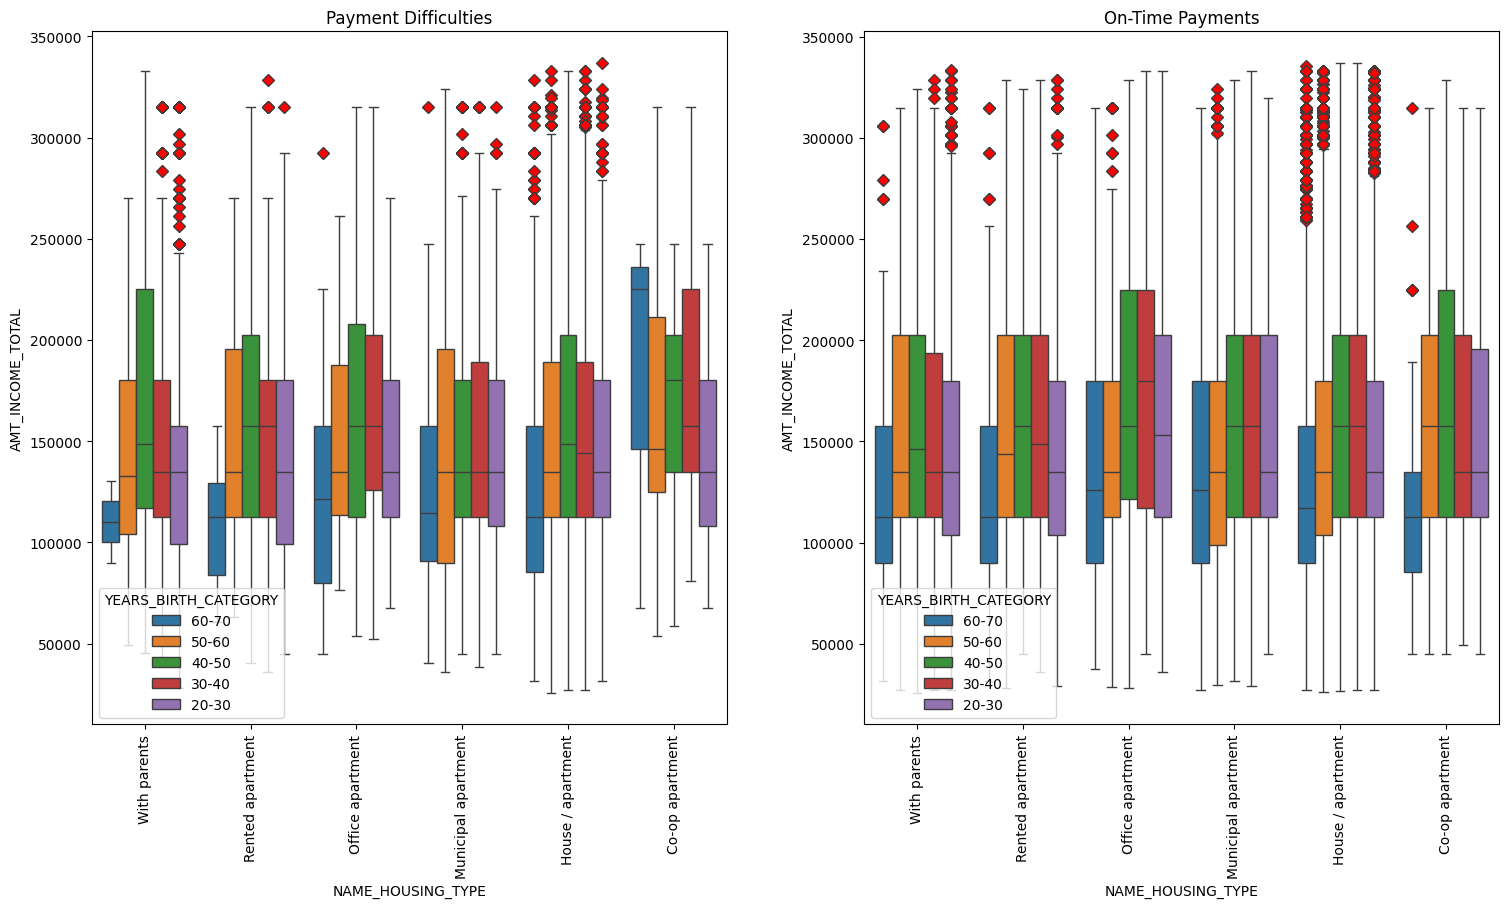

In [ ]:
complete_analysis(df1, df0, 'NAME_HOUSING_TYPE', 'AMT_INCOME_TOTAL', 'YEARS_BIRTH_CATEGORY')

Висновки:
-в усіх типах житла вікова категорія від 30 до 40 років має вищі середні доходи, порівняно з іншими категоріями. Це може вказувати на пік заробітної спроможності в цьому віковому діапазоні.
- для квартир, що належать кооперативам (Co-op apartment), вікова категорія 40-50 років виявляє найвищі середні доходи для обох своєчасних платежів і фінансових труднощів. Це може свідчити про фінансову стабільність цієї групи.
Значення викидів (outliers)
- існує значна кількість викидів у данних, особливо серед власників будинків та квартир, що може вказувати на наявність осіб з значно вищими доходами, що впливає на загальні показники.
- міські квартири (Municipal apartment) показують стабільно вищий середній дохід у категорії вік 30-40 років для своєчасних платежів, порівняно з іншими віковими категоріями.
- загальні тенденції вказують на те, що старші вікові категорії (50-60 і 60-70) мають нижчі середні доходи у порівнянні з молодшими групами. Це може бути пов'язано з переходом на пенсію або зменшенням активності на робочому місці.

Descriptive Statistics for Payment Difficulties:
                                   count      mean       std       min       25%       50%        75%        max
NAME_INCOME_TYPE     CODE_GENDER                                                                                
Commercial associate F           2968.00 536304.02 353598.52  45000.00 270000.00 450000.00  675000.00 3600000.00
                     M           2392.00 526355.38 335793.33  45000.00 270000.00 450000.00  675000.00 2961000.00
Maternity leave      F              2.00 929250.00 715945.62 423000.00 676125.00 929250.00 1182375.00 1435500.00
Pensioner            F           2243.00 494976.12 316903.86  45000.00 229500.00 450000.00  675000.00 2173500.00
                     M            739.00 486543.08 321104.43  45000.00 229500.00 450000.00  675000.00 1800000.00
State servant        F            847.00 544120.88 336074.93  45000.00 270000.00 450000.00  675000.00 1800000.00
                     M            402.00 536955

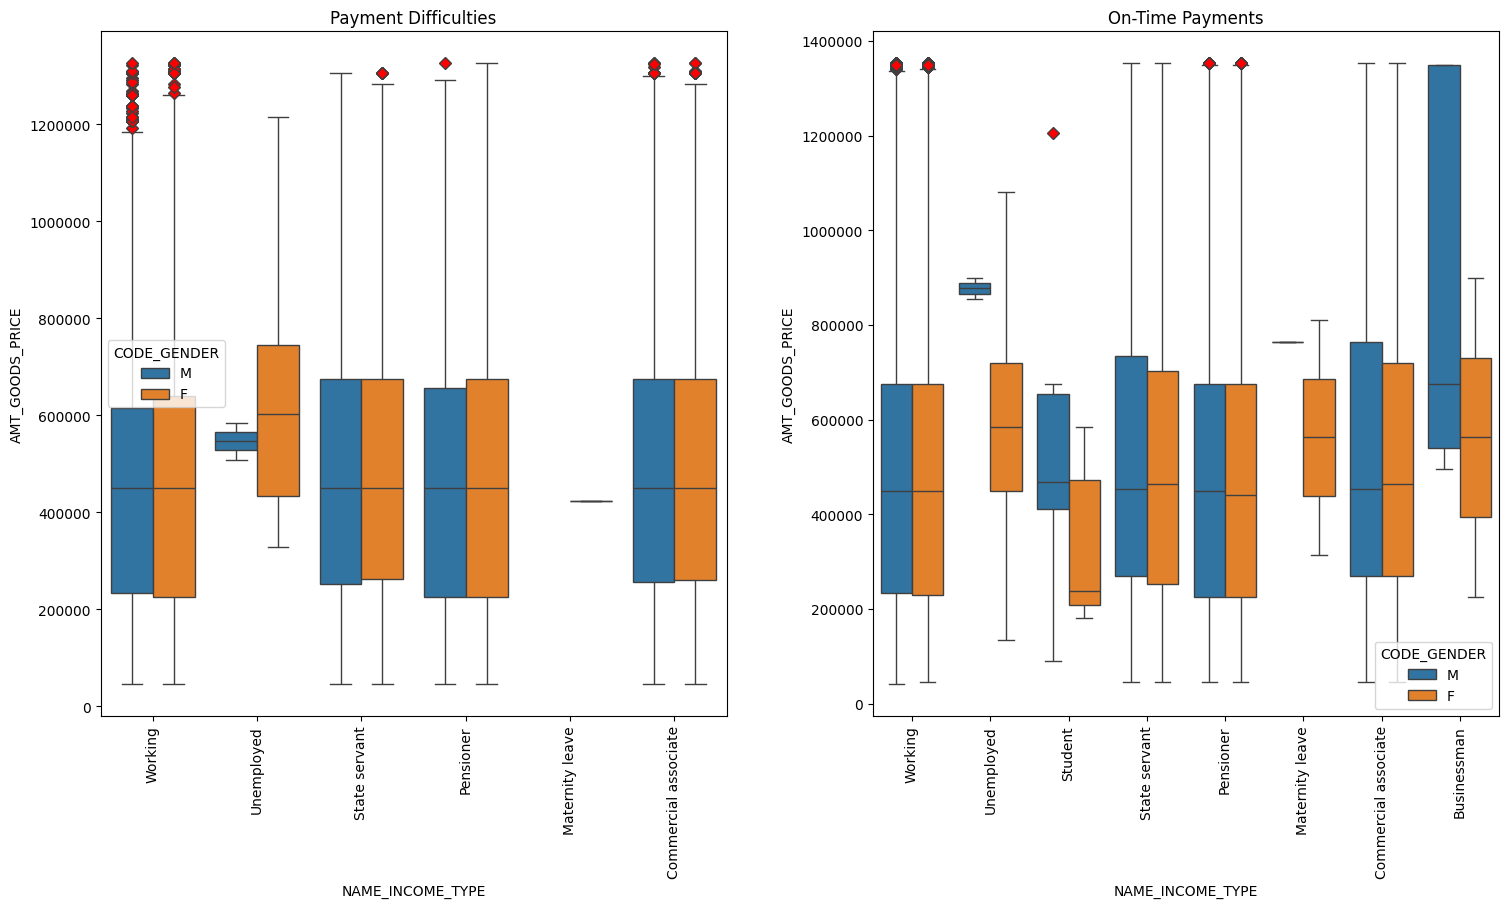

In [ ]:
complete_analysis(df1, df0, 'NAME_INCOME_TYPE', 'AMT_GOODS_PRICE', 'CODE_GENDER')

Висновки:
- середні доходи варіюються в залежності від типу зайнятості. Наприклад, у комерційних асоційованих (Commercial associate) середній дохід чоловіків значно вищий, ніж у жінок, що може вказувати на гендерний розрив у заробітній платі в цій сфері.
- у більшості категорій доходів середні та максимальні показники вищі у чоловіків. Це стосується таких категорій як державні службовці та комерційні асоційовані. Проте, серед безробітних жінок спостерігається вищий середній дохід, що може свідчити про вищі соціальні виплати або інші джерела доходу.
- вікові категорії значно впливають на доходи в різних типах житла. Наприклад, молодші вікові групи мають нижчі доходи в муніципальних квартирах, а старші — вищі в особистих будинках.
- загалом, фінансові труднощі та своєчасні платежі показують, що люди з вищими доходами мають менше проблем з оплатою своїх рахунків. Викиди в даних для вищих доходів вказують на значну кількість осіб з особливо високими доходами.

Descriptive Statistics for Payment Difficulties:
                                    count      mean        std       min       25%       50%       75%          max
OCCUPATION_TYPE       CODE_GENDER                                                                                  
Accountants           F            457.00 174840.64   79021.04  54000.00 112500.00 157500.00 202500.00    540000.00
                      M             17.00 202367.65   98623.66  81000.00 121500.00 180000.00 252000.00    438750.00
Cleaning staff        F            410.00 128907.99   70328.23  31500.00  90000.00 112500.00 157500.00    720000.00
                      M             37.00 119493.24   45786.21  45000.00  90000.00 112500.00 135000.00    247500.00
Cooking staff         F            555.00 129298.38   55531.88  32400.00  90000.00 112500.00 157500.00    405000.00
                      M             66.00 177136.36   70219.69  54000.00 135000.00 157500.00 202500.00    405000.00
Core staff            F

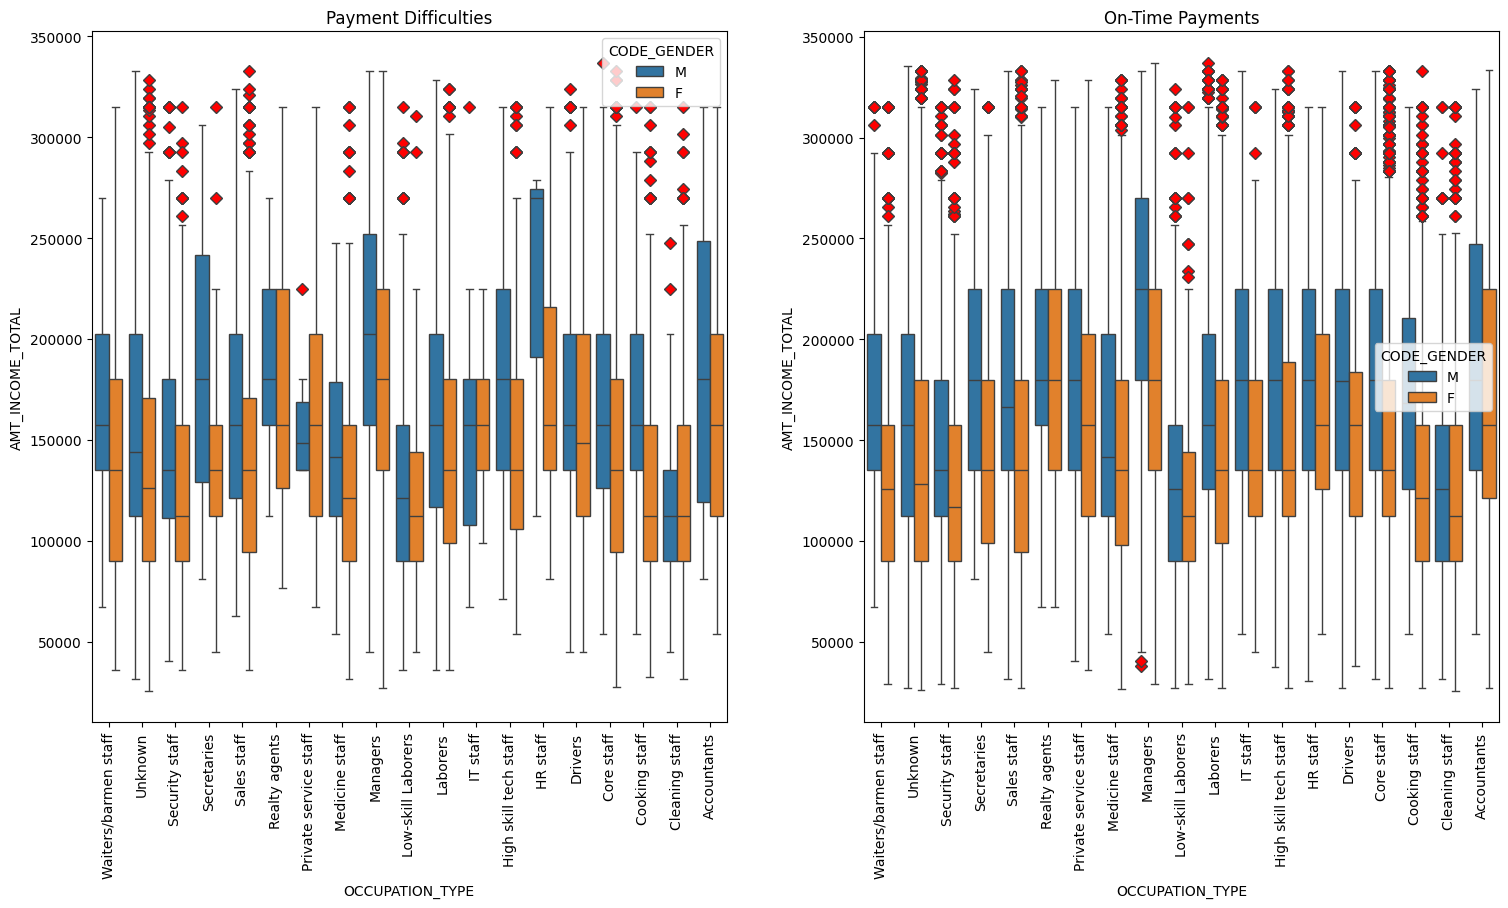

In [ ]:
complete_analysis(df1, df0, 'OCCUPATION_TYPE', 'AMT_INCOME_TOTAL', 'CODE_GENDER')

Висновки:
- в більшості професійних категорій середні доходи чоловіків вищі, ніж у жінок. Це особливо помітно у таких професіях, як менеджери та IT-працівники, де чоловіки мають значно вищі доходи, що може свідчити про стійкі гендерні нерівності на робочих місцях.
- на графіках видно, що в професіях з нижчими доходами, як наприклад, серед прибирального персоналу або кухарів, медіанні значення доходів менші і менш стабільні з великою кількістю викидів. Це може вказувати на нестабільність доходів або на велику різницю в доходах працівників у межах однієї категорії.
- професії, які традиційно вважаються високооплачуваними (наприклад, менеджери, IT-працівники, медичний персонал) показують високі середні доходи та більшу стабільність у своєчасних платежах. Це відображається в меншому розкиді доходів і меншій кількості викидів порівняно з нижчеоплачуваними професіями.
- вищі доходи не завжди корелюють зі своєчасними платежами. Деякі професії з високими доходами, як у менеджерів, все одно виявляють значні труднощі з платежами, що може свідчити про високий рівень зобов'язань або нераціональне управління фінансами.
- низькооплачувані професії також демонструють значні фінансові труднощі, що може бути пов'язано з обмеженими можливостями для накопичення заощаджень.
Значні відмінності в мінімальних та максимальних доходах:
-  боксплоти виявляють значні викиди, особливо в доходах чоловіків, що може вказувати на наявність високооплачуваних посад або значні бонуси, які не є характерними для більшості працівників.
Гендерний аспект:
- к більшості професій чоловіки мають вищі доходи, але є професії, де жінки мають порівняно високі доходи, наприклад, в медичній сфері.

## Залежності між категоріальними змінними

### Аналіз стовпців `NAME_INCOME_TYPE` vs `CODE_GENDER`

In [ ]:
def bi_countplot_target(df0, df1, column, hue_column):
  group_name = f'Нормалізований розподіл значень за категорією: {column}'
  print(group_name.upper())

  pltname = 'Клієнт зі складнощами щодо платності'
  unique_hue_values = df1[hue_column].unique()
  fig, axes = plt.subplots(nrows=1, ncols=2)
  fig.set_size_inches(14,4)

  proportions = df1.groupby(hue_column)[column].value_counts(normalize=True)
  proportions = (proportions*100).round(2)
  ax = proportions.unstack(hue_column).sort_values(
      by=unique_hue_values[0], ascending=False
      ).plot.bar(ax=axes[0], title=pltname)

  # анотація значень в барплоті
  for container in ax.containers:
      ax.bar_label(container, fmt='{:,.1f}%')

  pltname = 'Клієнти зі своєчасними платежами'
  unique_hue_values = df0[hue_column].unique()

  proportions = df0.groupby(hue_column)[column].value_counts(normalize=True)
  proportions = (proportions*100).round(2)
  ax = proportions.unstack(hue_column).sort_values(
      by=unique_hue_values[0], ascending=False
      ).plot.bar(ax=axes[1], title=pltname)

  for container in ax.containers:
      ax.bar_label(container, fmt='{:,.1f}%')

  plt.show()

  # ---------------
  group_name = f'Кількість значень за категорією: {column}'
  print(group_name.upper())

  pltname = 'Клієнт зі складнощами щодо платності'
  unique_hue_values = df1[hue_column].unique()
  fig, axes = plt.subplots(nrows=1, ncols=2)
  fig.set_size_inches(14,4)

  counts = df1.groupby(hue_column)[column].value_counts()
  ax = counts.unstack(hue_column).sort_values(
      by=unique_hue_values[0], ascending=False
      ).plot.bar(ax=axes[0], title=pltname)

  for container in ax.containers:
    ax.bar_label(container)

  pltname = 'Клієнти зі своєчасними платежами'
  unique_hue_values = df0[hue_column].unique()

  counts = df0.groupby(hue_column)[column].value_counts()
  ax = counts.unstack(hue_column).sort_values(
      by=unique_hue_values[0], ascending=False
      ).plot.bar(ax=axes[1], title=pltname)

  for container in ax.containers:
    ax.bar_label(container)

  plt.show()

НОРМАЛІЗОВАНИЙ РОЗПОДІЛ ЗНАЧЕНЬ ЗА КАТЕГОРІЄЮ: NAME_INCOME_TYPE


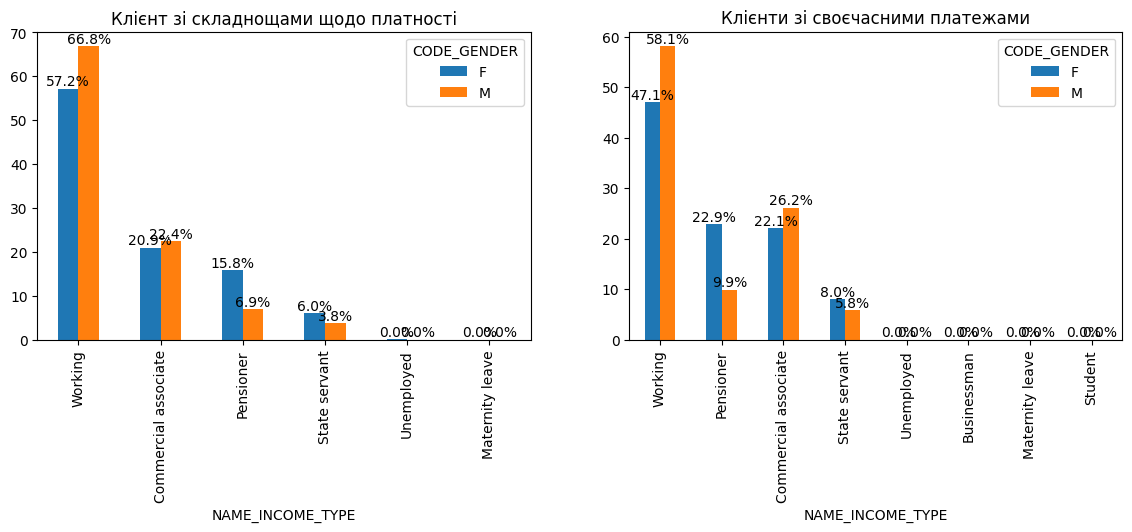

КІЛЬКІСТЬ ЗНАЧЕНЬ ЗА КАТЕГОРІЄЮ: NAME_INCOME_TYPE


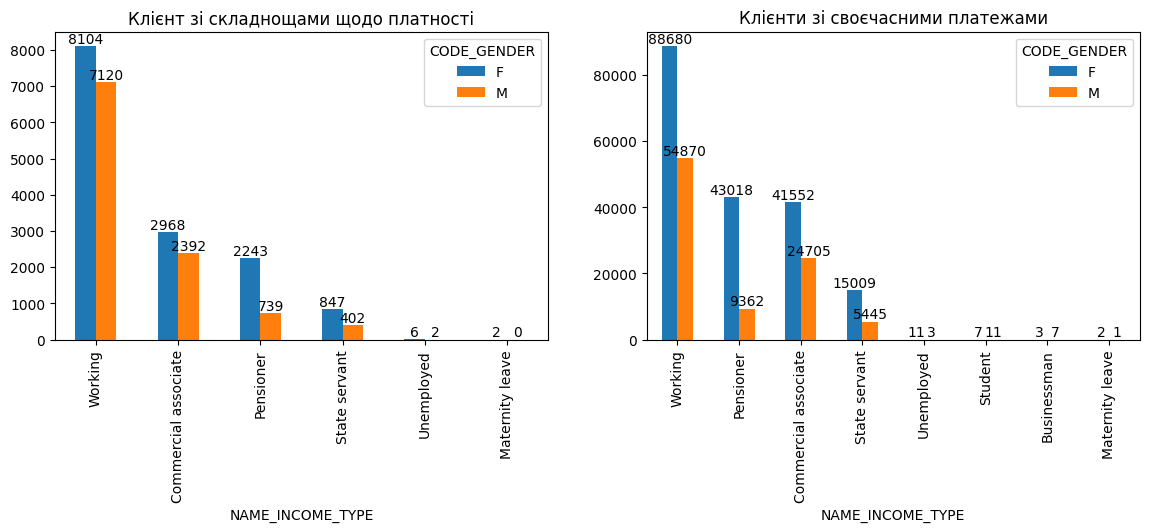

In [ ]:
bi_countplot_target(df0, df1, 'NAME_INCOME_TYPE','CODE_GENDER');

**Спостереження**
- Серед клієнтів, які мають складнощі з платністю людей категорії "Працюючі" та "Чоловіки" відсотково значно більше, ніж серед клієнтів, які складнощів з платністю не мають.
- Серед клієнтів, які мають складнощі з платністю людей категорії "Працюючі" та "Жінки" відсотково значно більше, ніж серед клієнтів, які складнощів з платністю не мають.
- Оскільки за обома CODE_GENDER бачимо, що найбільший відсоток клієнтів мають NAME_INCOME_TYPE Working - важливо проаналізувати ще додаткові змінні, які можуть впливати на те, чи буде клієнт мати складнощі з платежами, адже група клієнтів NAME_INCOME_TYPE Working - є в цілому найбільшою в наших даних.
- Клієнти категорії "Бізнесмени" та "Студенти" здійснюють платежі вчасно, хоча їхня історія невелика

# ДЗ 8. Аналіз взаємозалежностей між двома категоріальними змінними

Проведіть подібний до прикладу аналіз залежностей між категоріальними змінними для пар змінних

- NAME_EDUCATION_TYPE vs CODE_GENDER
- NAME_FAMILY_STATUS vs OCCUPATION_TYPE
- OCCUPATION_TYPE vs NAME_CONTRACT_TYPE

Опишіть спостереження щодо того, чи є цікаві знахідки стосовно цільової змінної з цього аналізу.

НОРМАЛІЗОВАНИЙ РОЗПОДІЛ ЗНАЧЕНЬ ЗА КАТЕГОРІЄЮ: NAME_EDUCATION_TYPE


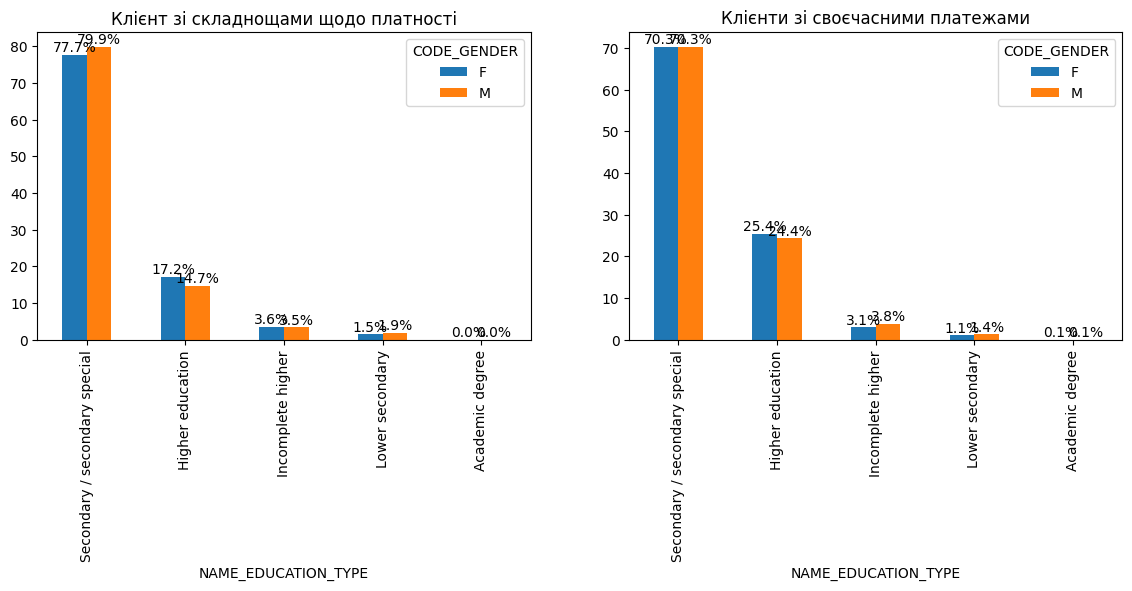

КІЛЬКІСТЬ ЗНАЧЕНЬ ЗА КАТЕГОРІЄЮ: NAME_EDUCATION_TYPE


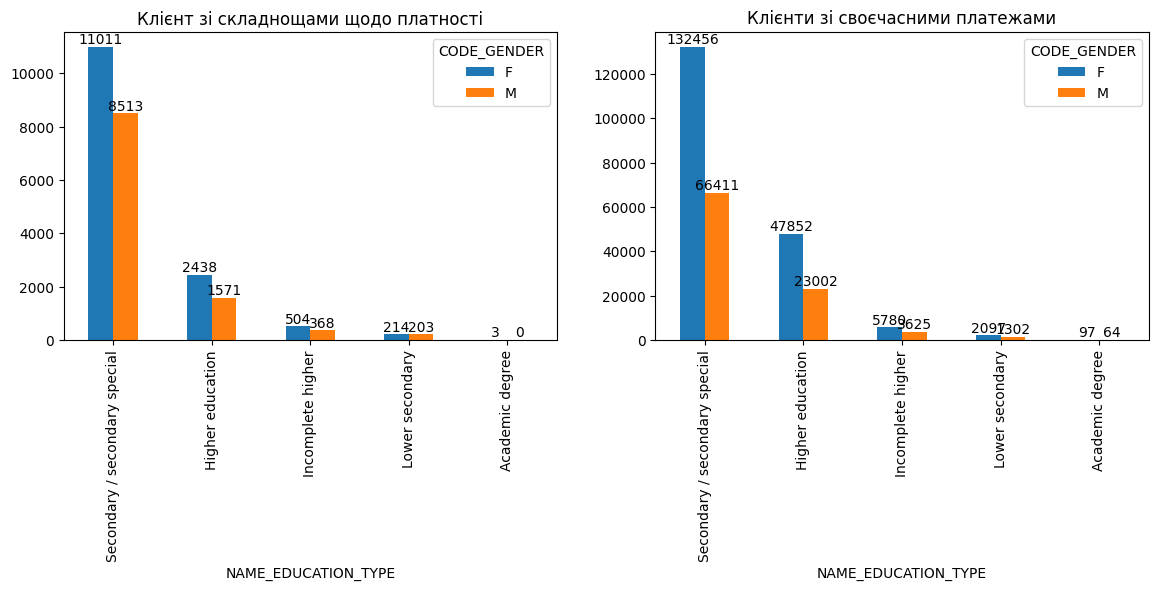

In [ ]:
bi_countplot_target(df0, df1, 'NAME_EDUCATION_TYPE','CODE_GENDER');

Висновки:
- більшість клієнтів із фінансовими труднощами та своєчасними платежами мають освіту середнього спеціального рівня. Це може вказувати на те, що люди з цим рівнем освіти становлять велику частину економічно активного населення.
Клієнти з вищою освітою також часто мають фінансові труднощі, але водночас вони є серед тих, хто частіше робить своєчасні платежі.
- на обох графіках спостерігається вищий відсоток чоловіків у категорії з фінансовими складнощами та серед тих, хто робить своєчасні платежі, особливо серед осіб з середньою спеціальною та вищою освітою.
- в обох категоріях чоловіки домінують у групі з нижчою середньою та середньою спеціальною освітою, але в категорії з вищою освітою різниця стає менш помітною.
- в абсолютних числах значно більше клієнтів із фінансовими складнощами та своєчасними платежами мають середню спеціальну освіту. Це свідчить про високу представленість цієї категорії населення в фінансових базах даних.

НОРМАЛІЗОВАНИЙ РОЗПОДІЛ ЗНАЧЕНЬ ЗА КАТЕГОРІЄЮ: NAME_FAMILY_STATUS


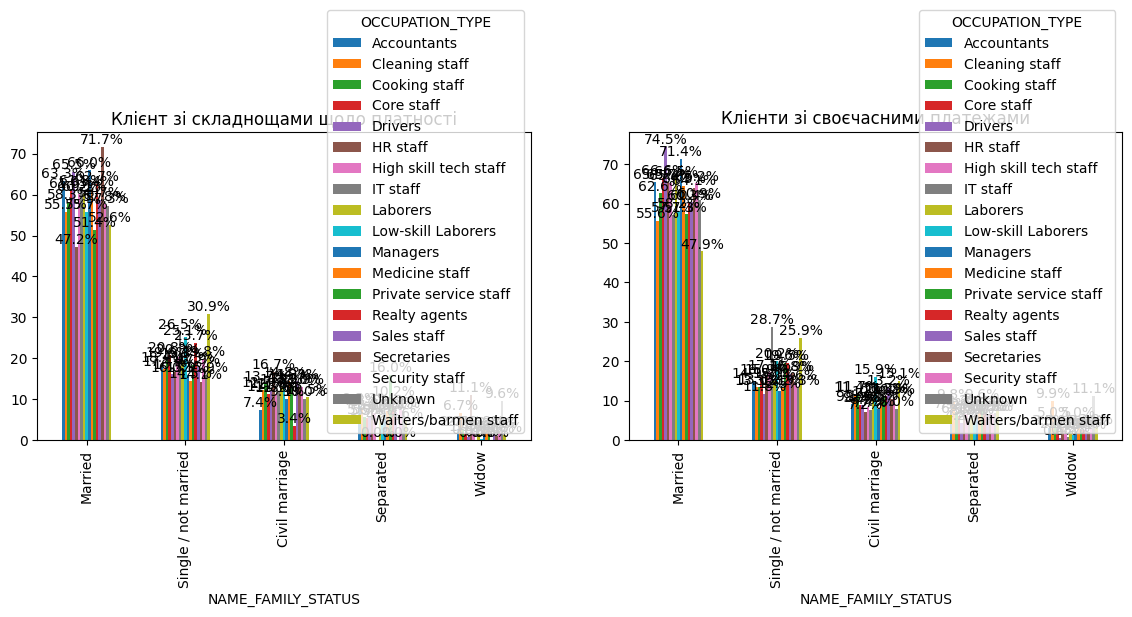

КІЛЬКІСТЬ ЗНАЧЕНЬ ЗА КАТЕГОРІЄЮ: NAME_FAMILY_STATUS


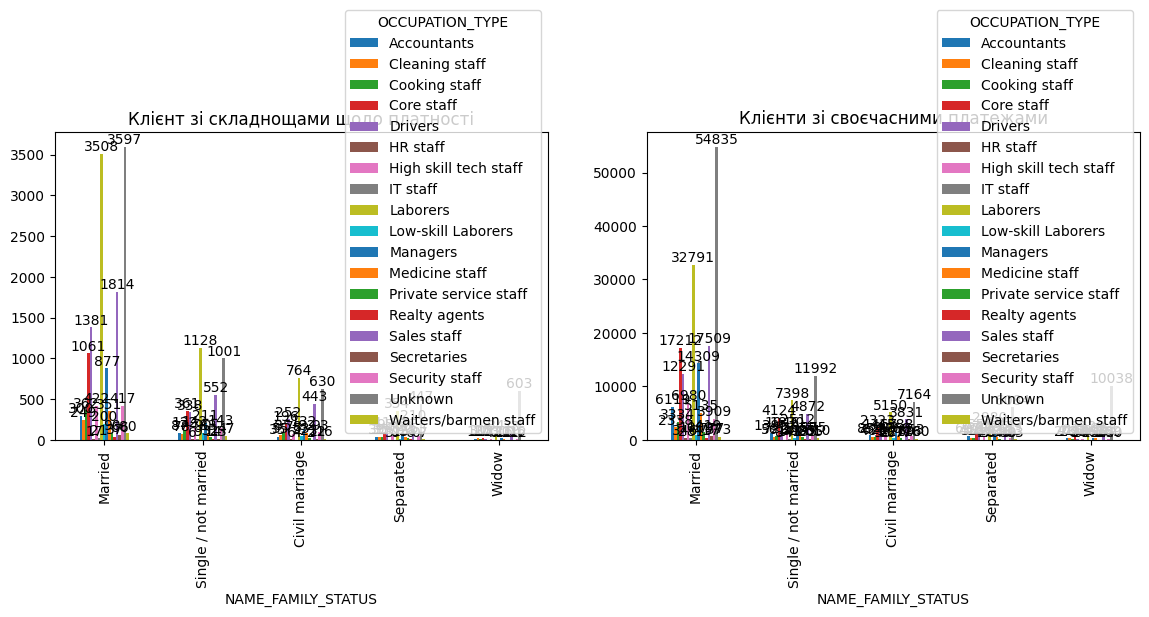

In [ ]:
bi_countplot_target(df0, df1, 'NAME_FAMILY_STATUS','OCCUPATION_TYPE');

Висновки:
- більшість клієнтів, які мають фінансові складнощі або роблять своєчасні платежі, є одруженими. Це може вказувати на велику частку цієї демографічної групи серед банківських клієнтів.
- серед одружених осіб високий відсоток тих, хто має фінансові складнощі, що може відображати вищі фінансові зобов'язання, пов'язані з сімейним життям.
- представники професій з високим рівнем кваліфікації, такі як менеджери, медичні та висококваліфіковані технічні працівники, мають менші фінансові складнощі порівняно з низькокваліфікованими робітниками і обслуговуючим персоналом. Це може вказувати на більш стабільні та вищі доходи в цих професійних групах.
- низькокваліфіковані робітники та обслуговуючий персонал (наприклад, офіціанти та бармени) мають відносно високий рівень фінансових складнощів, що може відображати нижчі та менш стабільні доходи в цих секторах.
Візуалізація даних:
- графіки з великою кількістю категорій і даних можуть бути важкими для сприйняття, але вони чітко показують, що більша частина клієнтів зі складнощами чи своєчасними платежами припадає на одружених осіб.
С- сімейний статус "одружений" домінує серед клієнтів як з фінансовими складнощами, так і зі своєчасними платежами, що може бути зумовлено соціальними та економічними факторами, такими як вищі фінансові обов'язки.

НОРМАЛІЗОВАНИЙ РОЗПОДІЛ ЗНАЧЕНЬ ЗА КАТЕГОРІЄЮ: OCCUPATION_TYPE


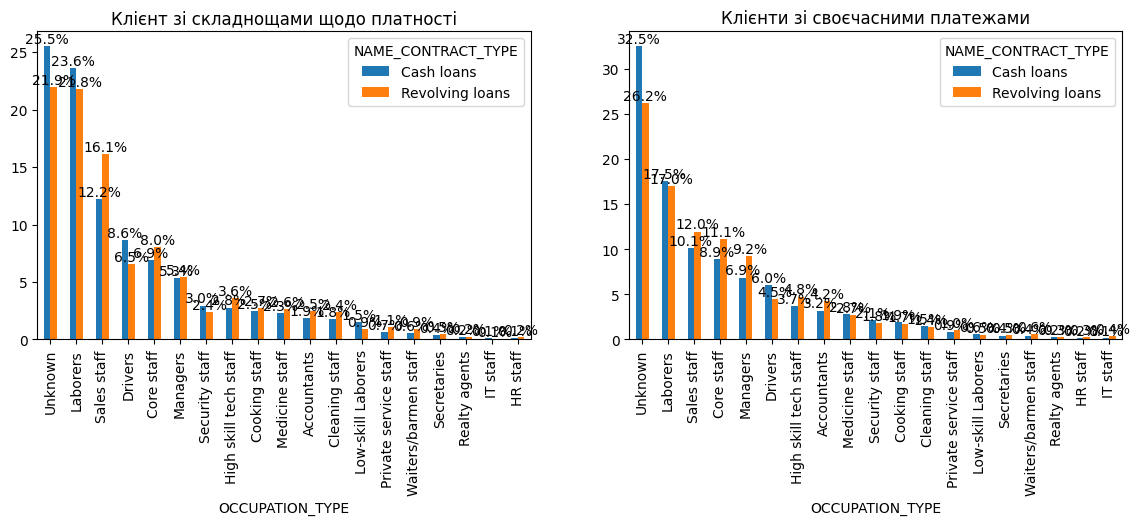

КІЛЬКІСТЬ ЗНАЧЕНЬ ЗА КАТЕГОРІЄЮ: OCCUPATION_TYPE


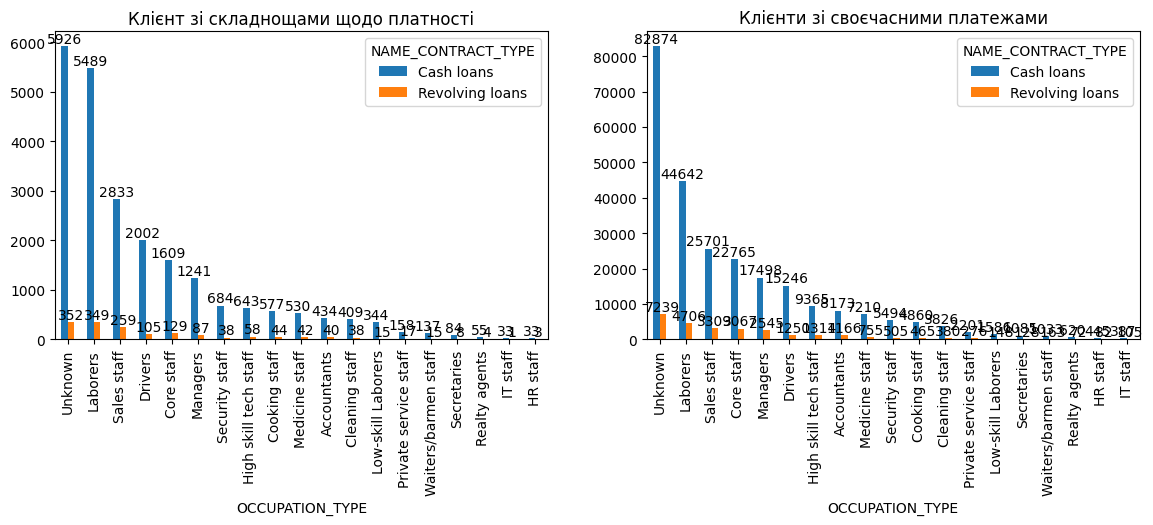

In [ ]:
bi_countplot_target(df0, df1, 'OCCUPATION_TYPE','NAME_CONTRACT_TYPE');

Висновки:
- серед професій, в яких більше клієнтів мають фінансові складнощі та роблять своєчасні платежі, виділяються робочі професії, такі як робітники та водії, а також управлінський персонал. Водії та некваліфіковані працівники мають значну кількість готівкових кредитів з фінансовими складнощами.
- револьверні кредити зазвичай менш поширені у всіх професіях у порівнянні з готівковими кредитами, але їх частка відносно вища серед професій, що вимагають вищої кваліфікації, таких як менеджери та IT-спеціалісти.
- найвищі відсотки клієнтів з фінансовими складнощами виявлено серед робітників і водіїв. Це може свідчити про високі фінансові зобов’язання або низькі доходи в цих професійних групах.
- клієнти з професій з вищою кваліфікацією, таких як IT-спеціалісти та менеджери, показують вищі рівні своєчасних платежів, що може відображати їхню фінансову стабільність і здатність керувати кредитними зобов’язаннями.
- абсолютна кількість клієнтів із фінансовими складнощами та своєчасними платежами найвища серед категорій "Невідомий" (Unknown), що може вказувати на недостатні дані або проблеми з класифікацією даних в цих випадках.
Чисельність готівкових кредитів значно перевищує револьверні кредити, що може свідчити про популярність або доступність такого типу кредитування.

***
# ДЗ 9. Висновок з проведеного аналізу
Напишіть Ваш висновок з проведеного ананлізу, яким категоріям осіб Ви б видали кредит? Категорія може бути, наприклад, люди з такою-то освітою, з таким-то доходом, з таким-то досвідом роботи.

In [ ]:
import nbformat
from google.colab import drive

notebook_path = 'drive/MyDrive/Colab Notebooks/1. Credit EDA'

# Відкриття та читання ноутбука
with open(notebook_path, 'r', encoding='utf-8') as nb_file:
    nb_contents = nbformat.read(nb_file, as_version=4)

# Функція для виводу висновків і спостережень
def display_conclusions_observations(notebook):
    for cell in notebook['cells']:
        if cell['cell_type'] == 'markdown':
            if 'Висновки' in cell['source'] or 'Спостереження' in cell['source']:
                print(cell['source'])
                print('\n---\n')  # Роздільник між різними комірками


display_conclusions_observations(nb_contents)



**Спостереження**
- Якщо поглянути на графік, то найбільшу кількість заявників на кредит мають `Laborers`
- Для імпутації краще залишити дані як є (пропущені значення становлять 31,35%) і не проводити імпутацію за якоюсь константою, як-от мода або мін/макс медіана, якщо це числовий стовпчик, оскільки це може викривити дані в подальших розрахунках.

Існує також можливість імпутації за допомогою більш "розумних" методів, але ми вивчимо їх пізніше, а зараз ми робимо те, що можемо, за допомогою деяких найпростіших перетворень.

---

**Спостереження**
-  Дивлячись на діагараму розмаху, медіана становить 0,535276
-  Найчастіше повторюване значення - 0,74630
-  Середнє значення - 0,51085
-  Хоча середнє та медіана є ближчими і можуть бути використані для імплікації, оскільки відсутнє відсоткове значення є більшим (19,83%), краще залишити дані як є і не проводити імплікації. Якщо метод вимагає імплікації, ми можемо імплікувати дані за допомогою медіани і створити ще один стовпчик, в якому буде

На основі проведеного аналізу, кредити можуть бути надані наступним категоріям клієнтів:

1. Клієнти з вищою освітою: Особи, які мають ступінь магістра або кандидата наук, зазвичай демонструють вищий дохід і фінансову стабільність. Вища освіта часто корелює з кращими навичками управління фінансами, здатністю до планування бюджету, що в свою чергу знижує потенційні ризики для банку.
2. Клієнти з вищим від середнього доходом: Такі клієнти можуть бути професіоналами високооплачуваних сфер або мати інші стабільні джерела доходів. Високий і стабільний дохід підвищує спроможність клієнтів своєчасно обслуговувати зобов'язання, мінімізуючи ймовірність дефолту.
3. Клієнти з тривалим робочим стажем: Довгий і неперервний стаж роботи, особливо в одній компанії або сфері, свідчить про професійну стабільність. Такі клієнти рідше стикаються з періодами безробіття, що забезпечує регулярний дохід і зменшує ризики для кредиторів.
4. Клієнти без дітей або з однією дитиною: Особи без дітей або з однією дитиною часто мають менші життєві витрати порівняно з багатодітними сім'ями. Це може сприяти вищій фінансовій свободі та більшій спроможності виконувати кредитні зобов'язання.

Для підвищення ефективності кредитної політики, рекомендується:
1. Розробка деталізованої кредитної політики, що включає специфічні критерії вибору позичальників на основі вищезазначених категорій для мінімізації ризиків та підвищення прибутковості кредитного портфеля.
2. Регулярний моніторинг і аналіз даних клієнтів для виявлення змін в їх фінансовому становищі, реагування на економічні зміни та коригування кредитних стратегій відповідно до поточної економічної ситуації і тенденцій на ринку праці.

# Висновок: Категорії клієнтів, на яких слід орієнтуватися при наданні кредиту


На основі данного аналізу даних та врахування ключових фінансових індикаторів, можно визначити категорії клієнтів для кредитування,на яких слід орієнтуватися при наданні кредиту, та в які знижений ризик невиконання кредитних зобов'язань:

1. Клієнти з вищою освітою, зокрема ті, хто здобув ступінь магістра або доктора наук, виявляються більш дисциплінованими у фінансовому плануванні. Вища освіта часто корелює з вищими доходами та стабільністю на робочому місці.
2. Клієнти з високим та стабільним доходом, особливо ті, що працюють у стабільних секторах економіки або мають тривалу історію зайнятості, мають кращі перспективи для своєчасного виконання кредитних зобов'язань.
3. Довготривалий досвід роботи в одній галузі або компанії свідчить про низьку ймовірність втрати роботи та високу кредитоспроможність.
4. Особи без дітей або з однією дитиною часто мають менші фінансові зобов'язання, що збільшує їхню спроможність обслуговувати кредити. Також важливо звернути увагу на одружених клієнтів, які можуть розраховувати на додаткову підтримку від партнера у разі фінансових складнощів.

Загалом, банки мають розглядати комбінацію вищезазначених чинників для оцінки кредитоспроможності клієнтів, враховуючи специфіку регіону та індивідуальні обставини кожного клієнта. Ретельний підхід до аналізу даних допоможе мінімізувати ризики і підвищити ефективність кредитного портфеля.